# DATA ANALYSIS. SURVEYS RESULTS

In this notebook we analyze in more detail the statistics of the surveys. We also study the histograms of each thermal question (thermal sensation, thermal comfort and thermal comfort while walking). Histograms and bar-plots are also obtained to study the results of the surveys in terms of the socio-demographic data.

We use the **all_votes_processed.csv** dataset, which contains the data for each TSV/TCV (ticket, vote) and wTCV. The dataset contains also the socio-demographic data of each "vote" (note that participants are repetead as they voted more than one time in different places). 

We also use the **stops.csv** dataset, which contains the information about each "stop" (number of votes of each possible answer, category of the public space, code of the space, etc...)

### INDEX

1. Thermal comfort (TCV), thermal comfort walking (wTCV) and thermal sensation (TSV) statistics

        1.1. Statistics
        
        1.2. Histograms

<br>

2. Socio-demographic statistics for TCV, wTCV and TSV

        2.1. Gender
            2.1.1. Statistics
            2.1.2. Histograms
            2.1.3. Horizontal bar-plots
                        
        2.2. Age
            2.2.1. Statistics
            2.2.2. Histograms
            2.2.3. Line-plots
            2.2.4. Horizontal bar-plots   
            
        2.3. Time spent in public space
            2.3.1. Statistics
            2.3.2. Histograms
            2.3.3. Horizontal bar-plots        
        
        2.4. Neighborhood knowledge
            2.4.1. Statistics
            2.4.2. Histograms
            2.4.3. Horizontal bar-plots        
        
<br>       
        
3. TCV/TSV and wTCV for different space categories
        
        3.1. Statistics

        3.2. Histograms
         
        3.3. Taking into account the space category 2
            3.3.1. Statistics
            3.3.2. Histogram
             
        3.4. Votes for each space category
            3.4.1. Statistics
            3.4.2. Horizontal bar-plots

        3.5. Merging into two large groups
            3.5.1. Statistics votes for each big group
            3.5.2. Histograms for each big group
            3.5.3. Horizontal bar-plots votes for each big group
            
<br>

4. TCV/TSV and wTCV for ages of <12 and 13-15

        4.1. Statistics
        
        4.2. Histograms
            4.2.1. Separated
            4.2.2. Together
            
            
<br>


5. Correlation Heat-Maps votes.

        5.1. TCV vs wTCV
        
        5.2. TCV vs TSV
        
        5.3. TSV vs wTCV
        
        

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Read csv data (please, write the correct directory adress where the data is located in your computer)
stops = pd.read_csv('processed_surveys\\all_processed_stops.csv')  # stops
all_votes_processed = pd.read_csv('processed_surveys\\all_votes_18Janunary2025.csv')  # votes
votes_ID = pd.read_csv('processed_surveys\\votes_ID.csv')  # participants ID


plt.style.use('tableau-colorblind10')  # Color blind friendly palette  (https://gist.github.com/thriveth/8560036)
plt.style.library['tableau-colorblind10']  

RcParams({'axes.prop_cycle': cycler('color', ['#006BA4', '#FF800E', '#ABABAB', '#595959', '#5F9ED1', '#C85200', '#898989', '#A2C8EC', '#FFBC79', '#CFCFCF']),
          'patch.facecolor': '#006BA4'})

## 1. Thermal comfort (TCV), thermal comfort walking (wTCV) and thermal sensation (TSV) statistics

In this section we analyze how the ~2000 votes are distributed across all possible answers to each question in the survey (thermal comfort, walking thermal comfort and thermal sensation). We also plot the histograms. 

### 1.1. Statistics

In [2]:
columns = ['thermal_confort', 'thermal_confort_walking', 'thermal_sensation']
all_votes_processed2 = all_votes_processed.copy()

for column in columns:
    
    print(column)
    print('---------')
    print('')
    
    print(all_votes_processed2[column].value_counts())   # Use this print for the number of votes
    #print(all_votes_processed2[column].value_counts(normalize=True).mul(100).round(1))  # Use this print for % of votes (1 dec) 
    
    
    print('')
    print('####################')
    print('')

thermal_confort
---------

thermal_confort
Neutre                   520
Còmode                   320
Lleugerament incòmode    303
Lleugerament còmode      296
Incòmode                 209
Molt còmode              112
Molt incòmode            107
Name: count, dtype: int64

####################

thermal_confort_walking
---------

thermal_confort_walking
Neutre                   428
Lleugerament incòmode    304
Incòmode                 184
Còmode                   169
Lleugerament còmode      145
Molt incòmode            138
Molt còmode               67
Name: count, dtype: int64

####################

thermal_sensation
---------

thermal_sensation
Neutre                397
Calorós               342
Càlid                 317
Lleugerament fresc    283
Lleugerament càlid    265
Molt calorós          160
Fresc                 103
Name: count, dtype: int64

####################



### 1.2. Histograms

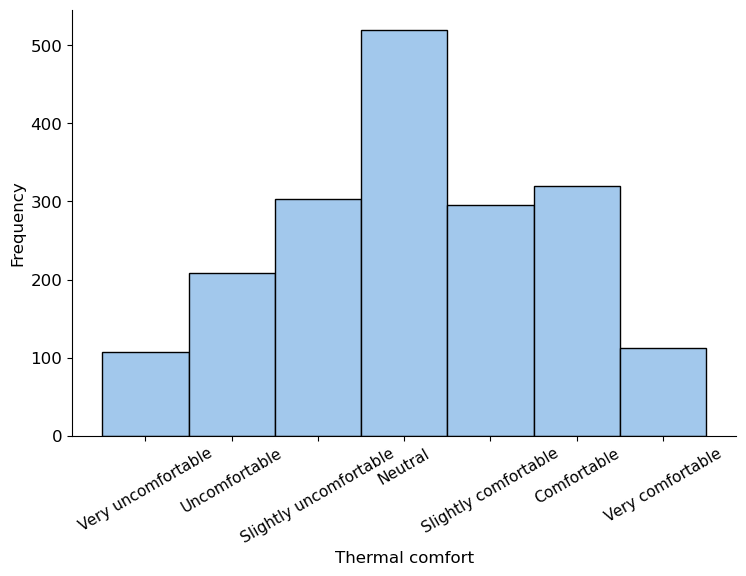

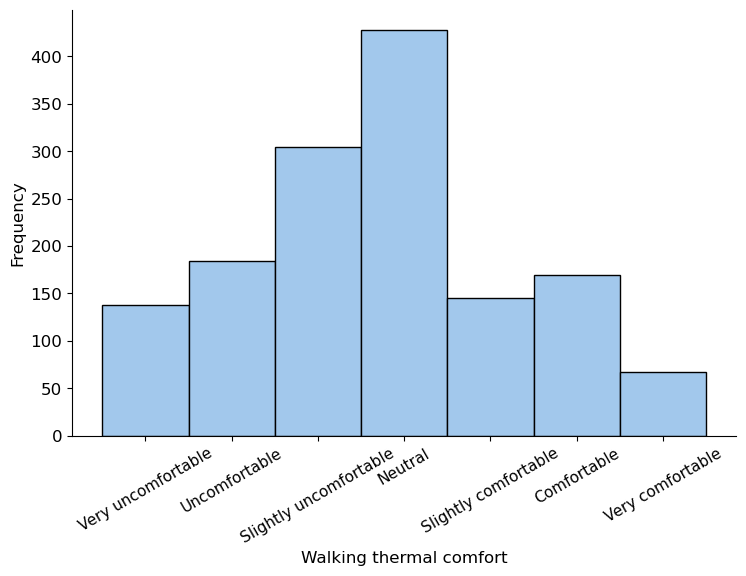

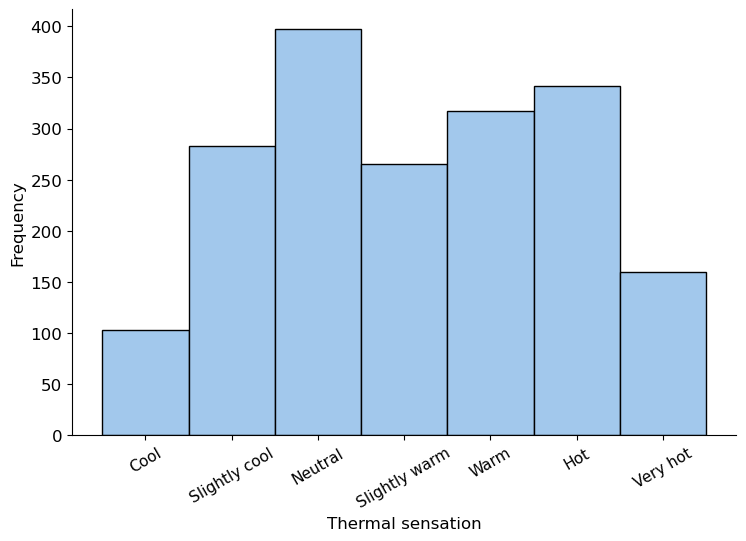

In [3]:
all_votes_processed2 = all_votes_processed.copy()


#########################################
#             THERMAL COMFORT    
#########################################

all_votes_processed2.thermal_confort = pd.Categorical(values=all_votes_processed2.thermal_confort, categories=['Molt incòmode', 'Incòmode', 'Lleugerament incòmode', 'Neutre','Lleugerament còmode','Còmode','Molt còmode']) ## Set the order for the column as you want
all_votes_processed2.sort_values(['thermal_confort'], inplace=True) # Sort the column
ax = sns.displot(data = all_votes_processed2, x = 'thermal_confort', facecolor='#A2C8EC', edgecolor='black',
            height=5, aspect=1.5).set(xlabel='Thermal comfort', ylabel='Frequency')  ## and plot

plt.xticks(rotation=30, fontsize=11)  # x-ticks size and rotation
plt.yticks(rotation=0, fontsize=12)  # y-ticks size

ax.set_xticklabels(['Very uncomfortable', 'Uncomfortable', 'Slightly uncomfortable', 'Neutral', 'Slightly comfortable', 
                   'Comfortable', 'Very comfortable'])  # Change x-tick labels to English


# Fontsize of the axis
ax.set_axis_labels('Thermal comfort', 'Frequency', fontsize=12)

plt.show()
print('')
print('')



#########################################
#        WALKING  THERMAL COMFORT    
#########################################

all_votes_processed2.thermal_confort_walking = pd.Categorical(values=all_votes_processed2.thermal_confort_walking, categories=['Molt incòmode', 'Incòmode', 'Lleugerament incòmode', 'Neutre','Lleugerament còmode','Còmode','Molt còmode']) ## Set the order for the column as you want
all_votes_processed2.sort_values(['thermal_confort_walking'], inplace=True) # Sort the column
ax = sns.displot(data = all_votes_processed2, x = 'thermal_confort_walking', facecolor='#A2C8EC', edgecolor='black',
            height=5, aspect=1.5).set(xlabel='Walking thermal comfort', ylabel='Frequency')  ## and plot

plt.xticks(rotation=30, fontsize=11)  # x-ticks size and rotation
plt.yticks(rotation=0, fontsize=12)  # y-ticks size

ax.set_xticklabels(['Very uncomfortable', 'Uncomfortable', 'Slightly uncomfortable', 'Neutral', 'Slightly comfortable', 
                   'Comfortable', 'Very comfortable'])  # Change x-tick labels to English

# Fontsize of the axis
ax.set_axis_labels('Walking thermal comfort', 'Frequency', fontsize=12)

plt.show()
print('')
print('')





#########################################
#             THERMAL SENSATION    
#########################################

all_votes_processed2.thermal_sensation = pd.Categorical(values=all_votes_processed2.thermal_sensation, categories=['Fresc', 'Lleugerament fresc', 'Neutre', 'Lleugerament càlid','Càlid','Calorós','Molt calorós']) ## Set the order for the column as you want
all_votes_processed2.sort_values(['thermal_sensation'], inplace=True) # Sort the column
ax = sns.displot(data = all_votes_processed2, x = 'thermal_sensation', facecolor='#A2C8EC', edgecolor='black',
            height=5, aspect=1.5).set(xlabel='Thermal sensation', ylabel='Frequency')  ## and plot

plt.xticks(rotation=30, fontsize=11)  # x-ticks size and rotation
plt.yticks(rotation=0, fontsize=12)  # y-ticks size

ax.set_xticklabels(['Cool', 'Slightly cool', 'Neutral', 'Slightly warm', 'Warm', 'Hot', 'Very hot'])  # Change x-tick labels to English

# Fontsize of the axis
ax.set_axis_labels('Thermal sensation', 'Frequency', fontsize=12)

plt.show()

<br>

## 2. Socio-demographic statistics for TCV, wTCV and TSV

### 2.1. Gender

For simplicity, we only use data corresponding to women or men (we discard non-binary data and didn't wan't to answer). Therefore, the dataset of all votes is reduced from 1867 to 1795 (72 votes less) 

In [4]:
all_vots_processed_gender = all_votes_processed2.copy()
all_vots_processed_gender = all_vots_processed_gender[(all_vots_processed_gender['gender'] == 'Home') | (all_vots_processed_gender['gender']=='Dona')].reset_index(drop=True)

print(len(all_vots_processed_gender))


1795


#### 2.1.1. Statistics

In [5]:
columns = ['thermal_confort', 'thermal_confort_walking', 'thermal_sensation']

for column in columns:
    print('################')
    print(column)
    print('################')
    print('')
    for i,j in all_vots_processed_gender.groupby(['gender']):
        
        if i[0]=='Dona':
            print('Women')
        else:
            print('Men')
            
        print('-------')
        
        
        print(j[column].value_counts()) # Use this print for total number of votes
        #print(j[column].value_counts(normalize=True).mul(100).round(1))   # Use this print for % (with 1 decimal)
        print('')
        
    print('')
    print('')
    

################
thermal_confort
################

Women
-------
thermal_confort
Neutre                   246
Lleugerament incòmode    173
Còmode                   155
Lleugerament còmode      140
Incòmode                 117
Molt incòmode             75
Molt còmode               52
Name: count, dtype: int64

Men
-------
thermal_confort
Neutre                   255
Còmode                   154
Lleugerament còmode      141
Lleugerament incòmode    118
Incòmode                  81
Molt còmode               59
Molt incòmode             29
Name: count, dtype: int64



################
thermal_confort_walking
################

Women
-------
thermal_confort_walking
Neutre                   186
Lleugerament incòmode    159
Incòmode                 110
Molt incòmode             90
Còmode                    87
Lleugerament còmode       72
Molt còmode               34
Name: count, dtype: int64

Men
-------
thermal_confort_walking
Neutre                   224
Lleugerament incòmode    134
Còmode  

####  2.1.2. Histograms

The histograms are normalized such as the votes for each "answer" sum 1. In this way, this histogram is useful to compare a given socio-dem category (for example, men and women) in a given (individual) answer of the survey. 

For example: if we analyze the answer "Very uncomfortable" from the "Thermal comfort" histogram, we'll see how many votes correspond to men and how many to women. In other words, "If I vote this answer of thermal comfort, what is the probability that I'm a man or a woman?"

Note that this normalization does not allow us to compare the whole distribution (tendency) of votes, we use the horitzontal bar-plots for this purpose).



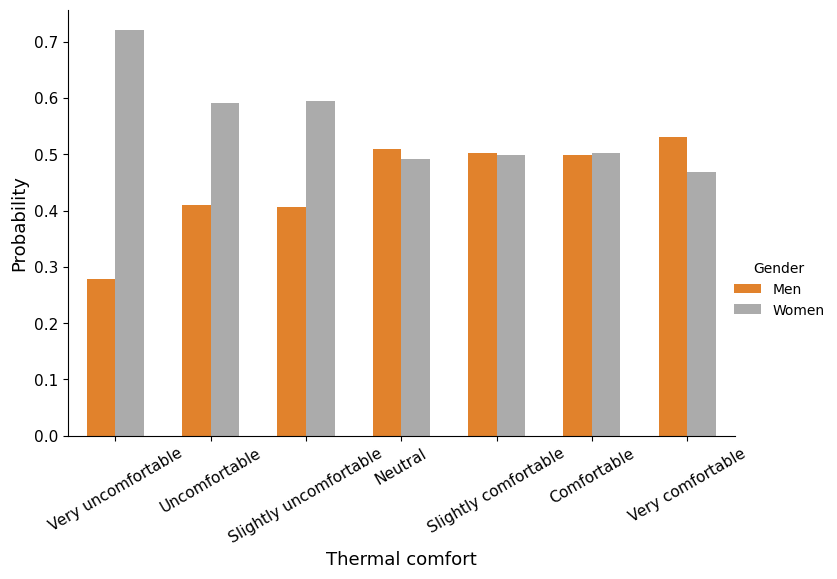

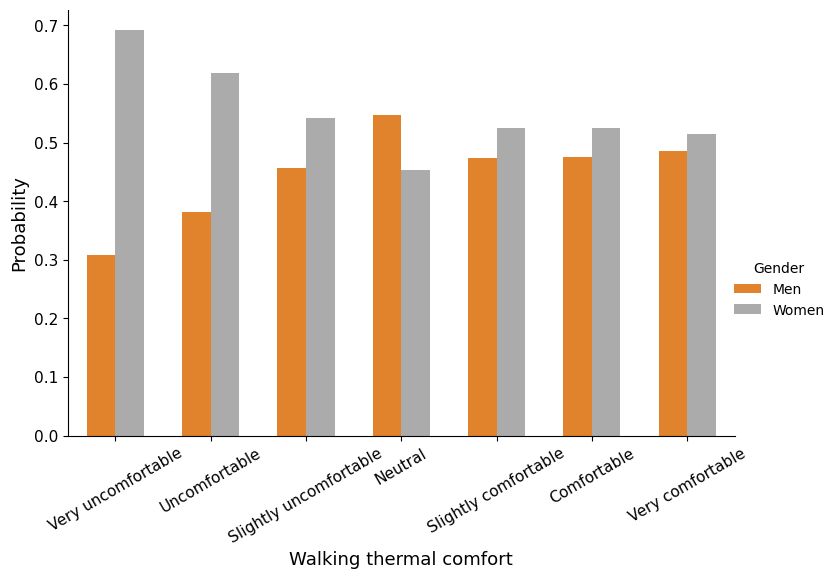

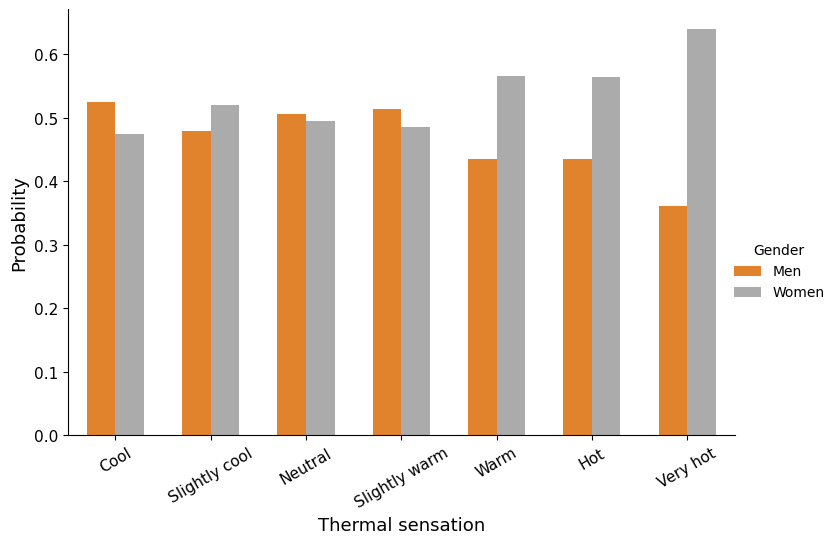

In [6]:
################################################
#     THERMAL COMFORT VS GENDER
################################################


x,y = 'thermal_confort', 'gender'

# Normalization (each answer = 1)
vots_gender_norm = all_vots_processed_gender.groupby(x)[y].value_counts(normalize=True).reset_index() 

vots_gender_norm.thermal_confort = pd.Categorical(values=vots_gender_norm.thermal_confort, categories=['Molt incòmode', 'Incòmode', 'Lleugerament incòmode', 'Neutre','Lleugerament còmode','Còmode','Molt còmode']) # Set the order for the column as you want
vots_gender_norm.sort_values(['thermal_confort'], inplace=True) # Sort the column

# Plot the histogram. Probability of each answer
g = sns.catplot(x=x,y='proportion',hue=y,kind='bar',data=vots_gender_norm, palette=["#FF800E", "#ABABAB"],alpha=1.,
                hue_order=['Home','Dona'],width=0.6, height=5, aspect=1.5).set(xlabel='Thermal comfort', ylabel='Probability')  ## and plot

# Size and rotation of x-y ticks
plt.xticks(rotation=30, fontsize=11)
plt.yticks(rotation=0, fontsize=11)

# Change xtick-labels in Enligsh
g.set_xticklabels(['Very uncomfortable', 'Uncomfortable', 'Slightly uncomfortable', 'Neutral', 'Slightly comfortable', 
                   'Comfortable', 'Very comfortable'])

# Now change the hue (legend) title
g._legend.set_title('Gender')

# Size of the labels
g.set_axis_labels('Thermal comfort', 'Probability', fontsize=13)

# Replace labels
new_labels = ['Men', 'Women']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)
    
plt.show()
print('')
print('')




################################################
#     WALKING THERMAL COMFORT VS GENDER
################################################

x,y = 'thermal_confort_walking', 'gender'

vots_gender_norm = all_vots_processed_gender.groupby(x)[y].value_counts(normalize=True).reset_index()


vots_gender_norm.thermal_confort_walking = pd.Categorical(values=vots_gender_norm.thermal_confort_walking, categories=['Molt incòmode', 'Incòmode', 'Lleugerament incòmode', 'Neutre','Lleugerament còmode','Còmode','Molt còmode']) ## Set the order for the column as you want
vots_gender_norm.sort_values(['thermal_confort_walking'], inplace=True) # Sort the column

g = sns.catplot(x=x,y='proportion',hue=y,kind='bar',data=vots_gender_norm, palette=["#FF800E", "#ABABAB"],alpha=1.,
                hue_order=['Home','Dona'],width=0.6, height=5, aspect=1.5).set(xlabel='Walking thermal comfort', ylabel='Probability')  ## and plot

# Size and rotation of x-y ticks
plt.xticks(rotation=30, fontsize=11)
plt.yticks(rotation=0, fontsize=11)

g.set_xticklabels(['Very uncomfortable', 'Uncomfortable', 'Slightly uncomfortable', 'Neutral', 'Slightly comfortable', 
                   'Comfortable', 'Very comfortable'])

# Now change the hue (legend) title
g._legend.set_title('Gender')

# Size of the labels
g.set_axis_labels('Walking thermal comfort', 'Probability', fontsize=13)


# replace labels
new_labels = ['Men', 'Women']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)
    
plt.show()
print('')
print('')




################################################
#     THERMAL SENSATION VS GENDER
################################################

x,y = 'thermal_sensation', 'gender'

vots_gender_norm = all_vots_processed_gender.groupby(x)[y].value_counts(normalize=True).reset_index()

vots_gender_norm.thermal_sensation = pd.Categorical(values=vots_gender_norm.thermal_sensation, categories=['Fresc', 'Lleugerament fresc', 'Neutre', 'Lleugerament càlid','Càlid','Calorós','Molt calorós']) ## Set the order for the column as you want
vots_gender_norm.sort_values(['thermal_sensation'], inplace=True) # Sort the column


g = sns.catplot(x=x,y='proportion',hue=y,kind='bar',data=vots_gender_norm, palette=["#FF800E", "#ABABAB"],alpha=1.,
                hue_order=['Home','Dona'],width=0.6, height=5, aspect=1.5).set(xlabel='Thermal sensation', ylabel='Probability')  ## and plot

# Size and rotation of x-y ticks
plt.xticks(rotation=30, fontsize=11)
plt.yticks(rotation=0, fontsize=11)

g.set_xticklabels(['Cool', 'Slightly cool', 'Neutral', 'Slightly warm', 'Warm', 'Hot', 'Very hot'])

# Now change the hue (legend) title
g._legend.set_title('Gender')

# Size of the labels
g.set_axis_labels('Thermal sensation', 'Probability', fontsize=13)


# replace labels
new_labels = ['Men', 'Women']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)
    
plt.show()



#### 2.1.3. Horitzontal bar-plots
We use horitzontal bar-plots with each socio-dem category normalized to 1 (100%). The quartiles (25-50-75%) are also representend as vertical dotted lines. 

**Thermal comfort**

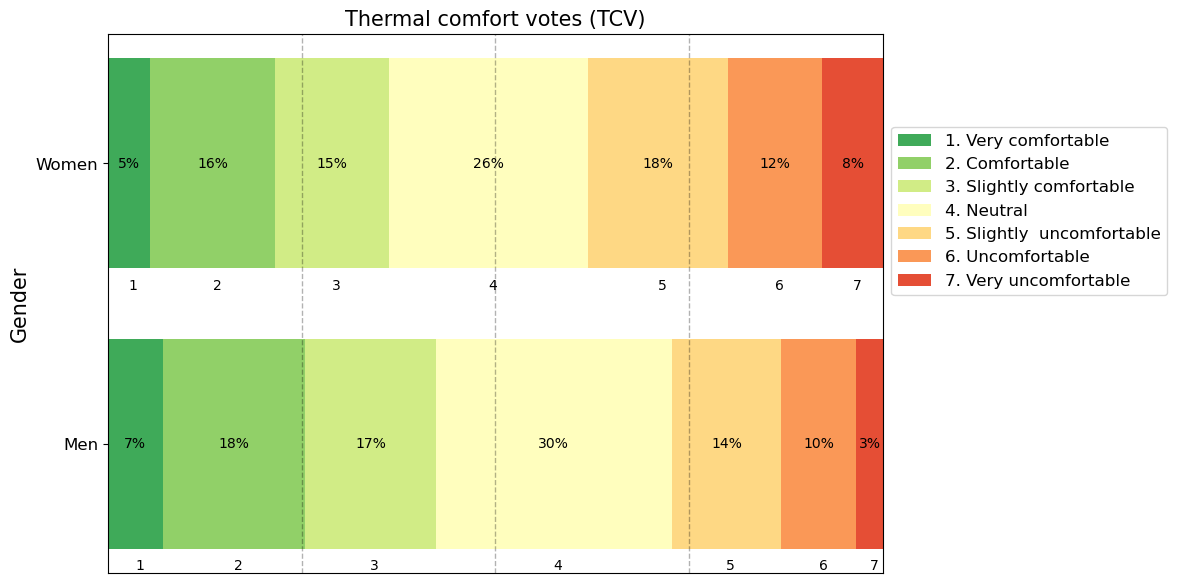

In [7]:
import matplotlib.pyplot as plt
import numpy as np

category_names = ['7. Very uncomfortable', '6. Uncomfortable', '5. Slightly  uncomfortable', '4. Neutral', 
                  '3. Slightly comfortable', '2. Comfortable', '1. Very comfortable']
category_names_r = list(reversed(category_names))

results = {
    'Women': [75, 117, 173, 246, 140, 155, 52],
    'Men': [29, 81, 118, 255, 141, 154, 59],}

list_keys=[]
list_values_r=[]
for key in results:
    list_keys.append(key)
    list_values_r.append(list(reversed(results[key])))
    
results_r = dict(zip(list_keys, list_values_r))


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    
    total_votes_per_age = np.sum(data,axis=1)
    new_data = ((data.transpose()/total_votes_per_age)*100).transpose()   # To plot with % from 0 to 100
    #new_data = np.matrix.round(new_data, 2)    # To plot just the num of votes
    
    data_cum = new_data.cumsum(axis=1)  # Cumulative
    category_colors = plt.colormaps['RdYlGn_r'](np.linspace(0.15, 0.85, data.shape[1]))  # Palette of colors

    
    # Figure
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(new_data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        data_text = data[:, i]
        widths = new_data[:, i]
        starts = data_cum[:, i] - widths

        rects = ax.barh(labels, widths, left=starts, height=0.75,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'black' if r * g * b < 0.5 else 'black'
        ax.bar_label(rects, label_type='center', fmt = '%.0f%%', color=text_color)
        
        
        # Plot the numbers (as strings) for the legend (1, 2, 3,...7) below each answer (in the middle)
        if i==0:
            plt.text(x = (data_cum[0][i])/2, y = 0.45, s=str(i+1))
            plt.text(x = (data_cum[1][i])/2, y = 1.45, s=str(i+1))
        else:
            plt.text(x = data_cum[0][i-1]+((data_cum[0][i]-data_cum[0][i-1])/2), y = 0.45, s=str(i+1))
            plt.text(x = data_cum[1][i-1]+((data_cum[1][i]-data_cum[1][i-1])/2), y = 1.45, s=str(i+1))
        

    # Plot quartile dotted lines
    ax.axvline(x=25, ymin=0, ymax=1, alpha = 0.3, ls = '--', lw=1, c='black')
    ax.axvline(x=50, ymin=0, ymax=1, alpha = 0.3, ls = '--', lw=1, c='black')
    ax.axvline(x=75, ymin=0, ymax=1, alpha = 0.3, ls = '--', lw=1, c='black')
    

    ax.legend(ncols=1, bbox_to_anchor=(1, 0.5),
              loc='lower left', fontsize='large')
    
    ax.set_ylabel('Gender',fontsize=15)
    ax.tick_params(labelsize=12)
    ax.set_title('Thermal comfort votes (TCV)',fontsize=15)
    
    return fig, ax


fig, ax = survey(results_r, category_names_r)


plt.show()


**Walking thermal comfort**

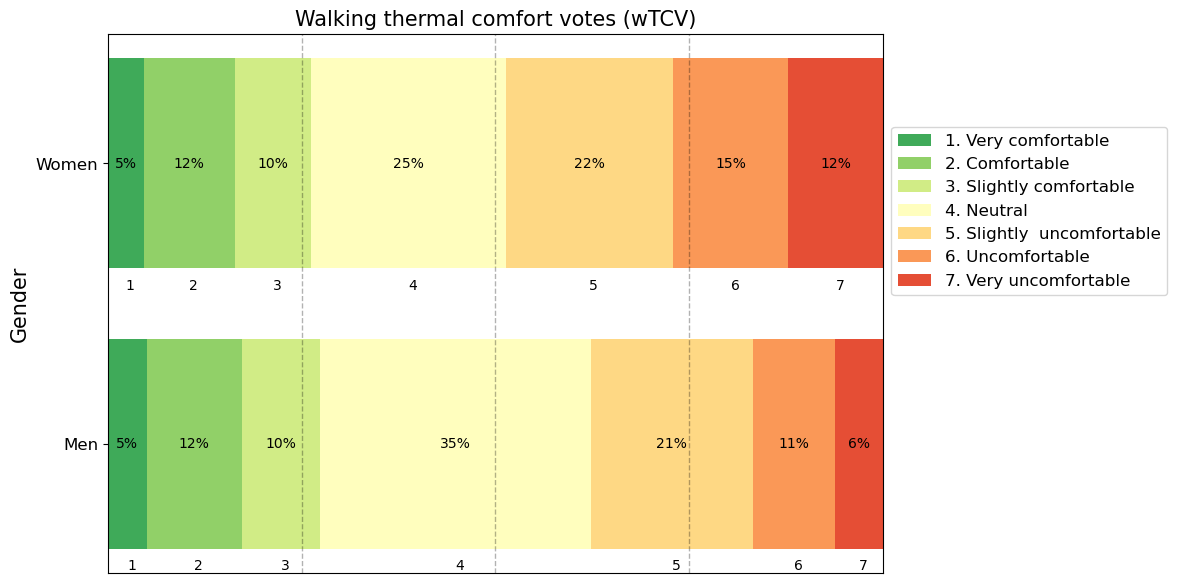

In [8]:
category_names = ['7. Very uncomfortable', '6. Uncomfortable', '5. Slightly  uncomfortable', '4. Neutral', 
                  '3. Slightly comfortable', '2. Comfortable', '1. Very comfortable']
category_names_r = list(reversed(category_names))

results = {
    'Women': [90, 110, 159, 186, 72, 87, 34],
    'Men': [40, 68, 134, 224, 65, 79, 32],}

list_keys=[]
list_values_r=[]
for key in results:
    list_keys.append(key)
    list_values_r.append(list(reversed(results[key])))
    
results_r = dict(zip(list_keys, list_values_r))


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    
    total_votes_per_age = np.sum(data,axis=1)
    new_data = ((data.transpose()/total_votes_per_age)*100).transpose()
    #new_data = np.matrix.round(new_data, 2)
    
    data_cum = new_data.cumsum(axis=1)
    category_colors = plt.colormaps['RdYlGn_r'](np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(10, 7))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(new_data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        data_text = data[:, i]
        widths = new_data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.75,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'black' if r * g * b < 0.5 else 'black'
        ax.bar_label(rects, label_type='center', fmt = '%.0f%%', color=text_color)
        
        if i==0:
            plt.text(x = (data_cum[0][i])/2, y = 0.45, s=str(i+1))
            plt.text(x = (data_cum[1][i])/2, y = 1.45, s=str(i+1))
        else:
            plt.text(x = data_cum[0][i-1]+((data_cum[0][i]-data_cum[0][i-1])/2), y = 0.45, s=str(i+1))
            plt.text(x = data_cum[1][i-1]+((data_cum[1][i]-data_cum[1][i-1])/2), y = 1.45, s=str(i+1))

    # Plot quartile dotted lines
    ax.axvline(x=25, ymin=0, ymax=1, alpha = 0.3, ls = '--', lw=1, c='black')
    ax.axvline(x=50, ymin=0, ymax=1, alpha = 0.3, ls = '--', lw=1, c='black')
    ax.axvline(x=75, ymin=0, ymax=1, alpha = 0.3, ls = '--', lw=1, c='black')
    
    ax.legend(ncols=1, bbox_to_anchor=(1, 0.5),
              loc='lower left', fontsize='large')
    
    ax.set_ylabel('Gender',fontsize=15)
    ax.tick_params(labelsize=12)
    ax.set_title('Walking thermal comfort votes (wTCV)',fontsize=15)
    
    return fig, ax


survey(results_r, category_names_r)
plt.show()


**Thermal sensation**

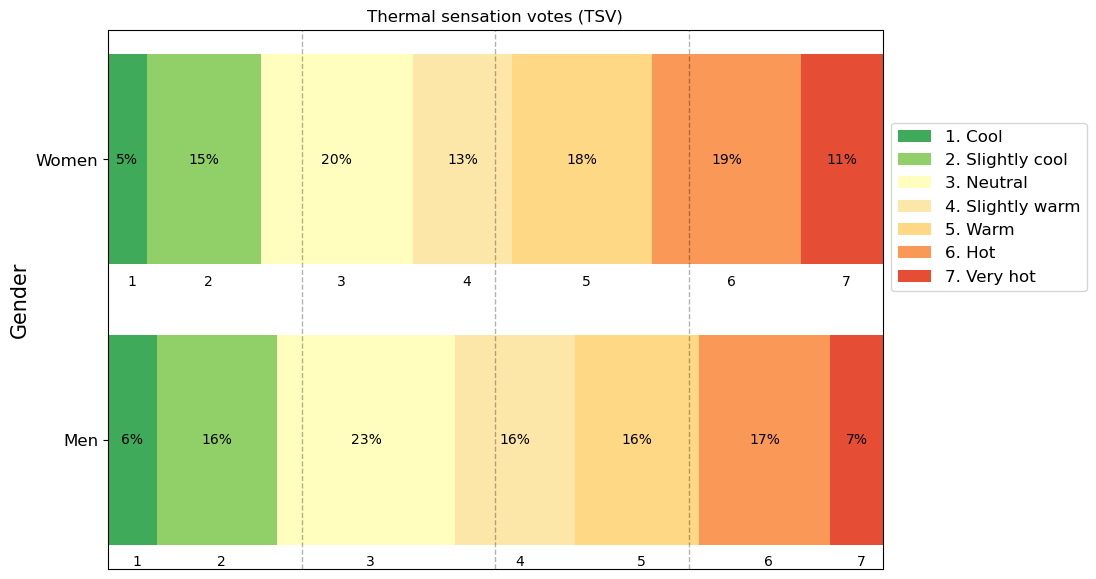

In [9]:
import matplotlib.pyplot as plt
import numpy as np

category_names = ['1. Cool', '2. Slightly cool', '3. Neutral', '4. Slightly warm', '5. Warm', '6. Hot', '7. Very hot']

results = {
    'Women': [48, 141, 188, 123, 173, 184, 101],
    'Men': [53, 130, 192, 130, 133, 142, 57],}


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    
    total_votes_per_age = np.sum(data,axis=1)
    new_data = ((data.transpose()/total_votes_per_age)*100).transpose()
    #new_data = np.matrix.round(new_data, 2)
    
    data_cum = new_data.cumsum(axis=1)
    category_colors = plt.colormaps['RdYlGn_r'](np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(10, 7))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(new_data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        if i==2:
            new_color = category_colors[3]
        elif i==3:
            new_color =  np.array([0.98746328, 0.9067397, 0.65926182, 1.])
        else:
            new_color=color
        
        data_text = data[:, i]
        widths = new_data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.75,
                        label=colname, color=new_color)

        r, g, b, _ = color
        text_color = 'black' if r * g * b < 0.5 else 'black'
        ax.bar_label(rects, label_type='center', fmt = '%.0f%%', color=text_color)

        if i==0:
            plt.text(x = (data_cum[0][i])/2, y = 0.45, s=str(i+1))
            plt.text(x = (data_cum[1][i])/2, y = 1.45, s=str(i+1))
        else:
            plt.text(x = data_cum[0][i-1]+((data_cum[0][i]-data_cum[0][i-1])/2), y = 0.45, s=str(i+1))
            plt.text(x = data_cum[1][i-1]+((data_cum[1][i]-data_cum[1][i-1])/2), y = 1.45, s=str(i+1))
            
    # Plot quartile dotted lines
    ax.axvline(x=25, ymin=0, ymax=1, alpha = 0.3, ls = '--', lw=1, c='black')
    ax.axvline(x=50, ymin=0, ymax=1, alpha = 0.3, ls = '--', lw=1, c='black')
    ax.axvline(x=75, ymin=0, ymax=1, alpha = 0.3, ls = '--', lw=1, c='black')
    
    ax.legend(ncols=1, bbox_to_anchor=(1, 0.5),
              loc='lower left', fontsize='large')
    
    ax.set_ylabel('Gender',fontsize=15)
    ax.tick_params(labelsize=12)
    ax.set_title('Thermal sensation votes (TSV)')
    
    return fig, ax


survey(results, category_names)
plt.show()


### 2.2. Age

#### 2.2.1. Statistics

In [10]:
columns = ['thermal_confort', 'thermal_confort_walking', 'thermal_sensation']

for column in columns:
    print('################')
    print(column)
    print('################')
    print('')
    for i,j in all_vots_processed_gender.groupby(['age2']):

        print(i[0])
        print('-------')
        print(j[column].value_counts())
        #print(j[column].value_counts(normalize=True).mul(100).round(1))
        print('')
        
    print('')
    print('')
    

################
thermal_confort
################

13-15
-------
thermal_confort
Neutre                   206
Lleugerament còmode      133
Lleugerament incòmode    118
Còmode                   118
Incòmode                  59
Molt còmode               39
Molt incòmode             19
Name: count, dtype: int64

16-24
-------
thermal_confort
Neutre                   44
Còmode                   32
Lleugerament incòmode    31
Lleugerament còmode      29
Incòmode                 23
Molt incòmode            21
Molt còmode               6
Name: count, dtype: int64

25-54
-------
thermal_confort
Lleugerament incòmode    40
Lleugerament còmode      28
Neutre                   23
Incòmode                 22
Còmode                   22
Molt còmode               6
Molt incòmode             2
Name: count, dtype: int64

55-84
-------
thermal_confort
Lleugerament incòmode    24
Neutre                   19
Lleugerament còmode      19
Còmode                   17
Incòmode                 12
Molt incòmode

#### 2.2.2. Histograms

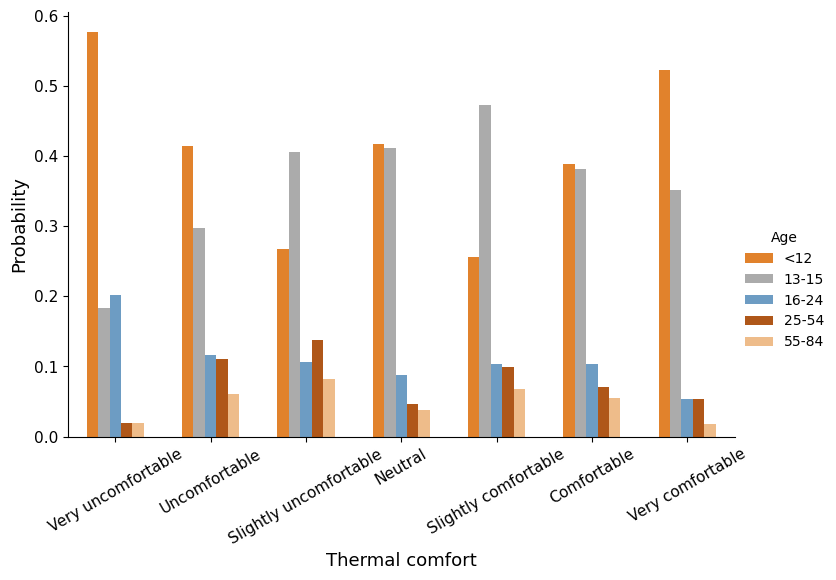

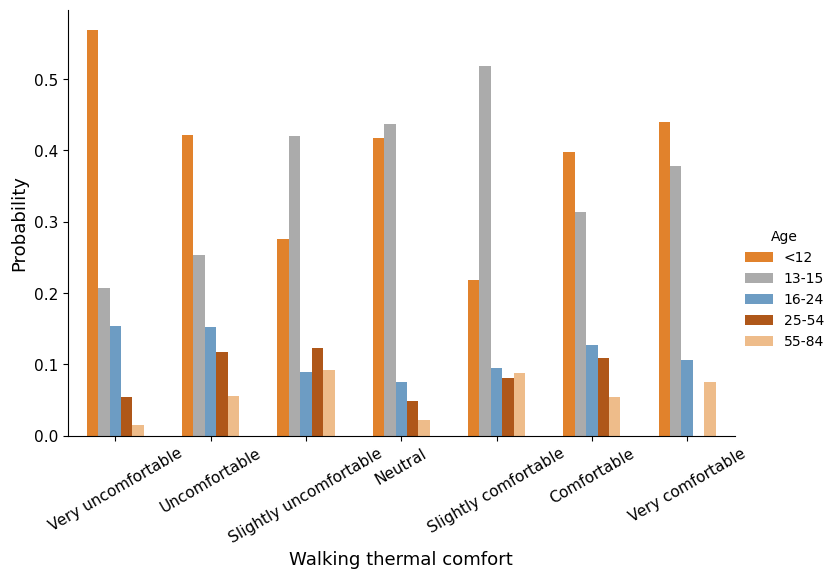

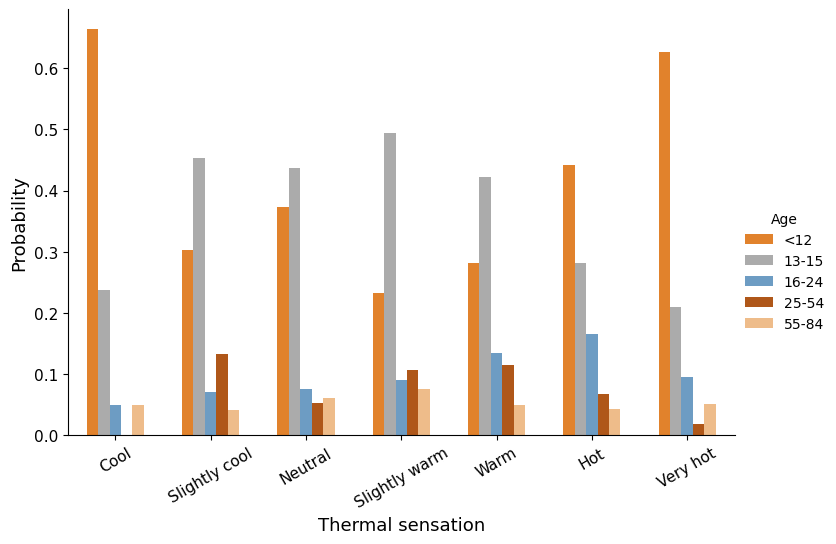

In [11]:
# Thermal confort vs age
x,y = 'thermal_confort', 'age2'

vots_age_norm = all_vots_processed_gender.groupby(x)[y].value_counts(normalize=True).reset_index()


vots_age_norm.thermal_confort = pd.Categorical(values=vots_age_norm.thermal_confort, categories=['Molt incòmode', 'Incòmode', 'Lleugerament incòmode', 'Neutre','Lleugerament còmode','Còmode','Molt còmode']) ## Set the order for the column as you want
vots_age_norm.sort_values(['thermal_confort'], inplace=True) # Sort the column


g = sns.catplot(x=x,y='proportion',hue=y,kind='bar',data=vots_age_norm, palette=["#FF800E", "#ABABAB","#5F9ED1","#C85200","#FFBC79"],
                alpha=1.,hue_order=['<12','13-15','16-24','25-54','55-84'],width=0.6, height=5, aspect=1.5).set(xlabel='Thermal comfort', ylabel='Probability')  ## and plot

plt.xticks(rotation=30, fontsize=11)
plt.yticks(rotation=0, fontsize=11)
g.set_xticklabels(['Very uncomfortable', 'Uncomfortable', 'Slightly uncomfortable', 'Neutral', 'Slightly comfortable', 
                   'Comfortable', 'Very comfortable'])

# Now change the hue (legend) title
g._legend.set_title('Age')

# Size of the labels
g.set_axis_labels('Thermal comfort', 'Probability', fontsize=13)

    
plt.show()
print('')
print('')




############################################################################################3

# Thermal confort walking vs age

x,y = 'thermal_confort_walking', 'age2'

vots_age_norm = all_vots_processed_gender.groupby(x)[y].value_counts(normalize=True).reset_index()


vots_age_norm.thermal_confort_walking = pd.Categorical(values=vots_age_norm.thermal_confort_walking, categories=['Molt incòmode', 'Incòmode', 'Lleugerament incòmode', 'Neutre','Lleugerament còmode','Còmode','Molt còmode']) ## Set the order for the column as you want
vots_age_norm.sort_values(['thermal_confort_walking'], inplace=True) # Sort the column


g = sns.catplot(x=x,y='proportion',hue=y,kind='bar',data=vots_age_norm, palette=["#FF800E", "#ABABAB","#5F9ED1","#C85200","#FFBC79"],
                alpha=1.,hue_order=['<12','13-15','16-24','25-54','55-84'],width=0.6, height=5, aspect=1.5).set(xlabel='Walking thermal comfort', ylabel='Probability')  ## and plot

plt.xticks(rotation=30, fontsize=11)
plt.yticks(rotation=0, fontsize=11)

g.set_xticklabels(['Very uncomfortable', 'Uncomfortable', 'Slightly uncomfortable', 'Neutral', 'Slightly comfortable', 
                   'Comfortable', 'Very comfortable'])

# Now change the hue (legend) title
g._legend.set_title('Age')

    
# Size of the labels
g.set_axis_labels('Walking thermal comfort', 'Probability', fontsize=13)


plt.show()
print('')
print('')



############################################################################################3

# Thermal sensation vs age

x,y = 'thermal_sensation', 'age2'

vots_age_norm = all_vots_processed_gender.groupby(x)[y].value_counts(normalize=True).reset_index()

vots_age_norm.thermal_sensation = pd.Categorical(values=vots_age_norm.thermal_sensation, categories=['Fresc', 'Lleugerament fresc', 'Neutre', 'Lleugerament càlid','Càlid','Calorós','Molt calorós']) ## Set the order for the column as you want
vots_age_norm.sort_values(['thermal_sensation'], inplace=True) # Sort the column


g = sns.catplot(x=x,y='proportion',hue=y,kind='bar',data=vots_age_norm, palette=["#FF800E", "#ABABAB","#5F9ED1","#C85200","#FFBC79"],
                alpha=1.,hue_order=['<12','13-15','16-24','25-54','55-84'],width=0.6, height=5, aspect=1.5).set(xlabel='Thermal sensation', ylabel='Probability')  ## and plot

plt.xticks(rotation=30, fontsize=11)
plt.yticks(rotation=0, fontsize=11)

g.set_xticklabels(['Cool', 'Slightly cool', 'Neutral', 'Slightly warm', 'Warm', 'Hot', 'Very hot'])

# Now change the hue (legend) title
g._legend.set_title('Age')

# Size of the labels
g.set_axis_labels('Thermal sensation', 'Probability', fontsize=13)
    
plt.show()



#### 2.2.3. Line-plot

We plot the hisotgram as "lines" to see the tendency for each age-range. In this case, the normalization is done separately for each age-range rather than for each response/answer.

Then, we group the ages in three big categories:  <12, 13-15 and >16

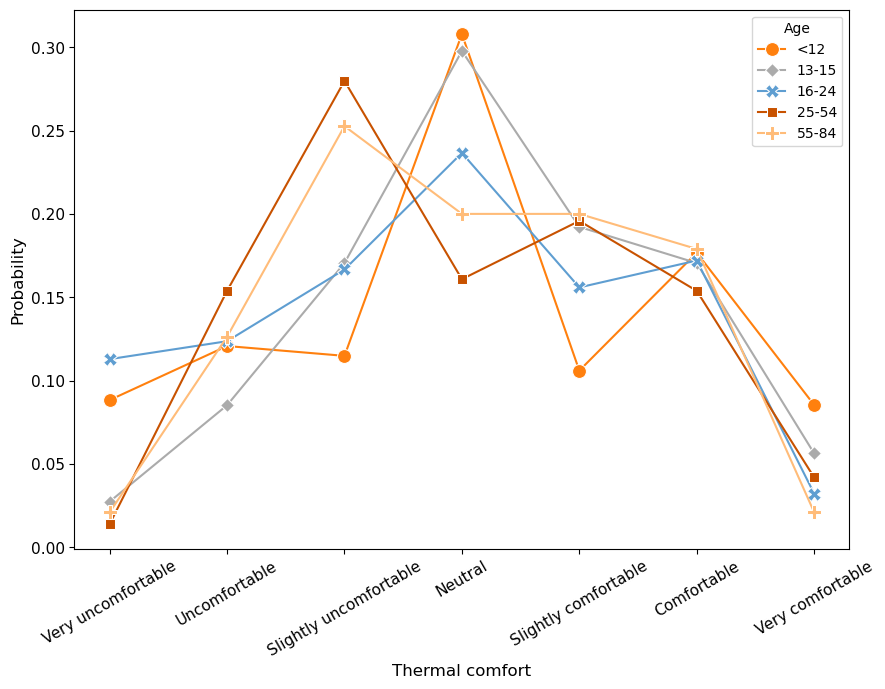

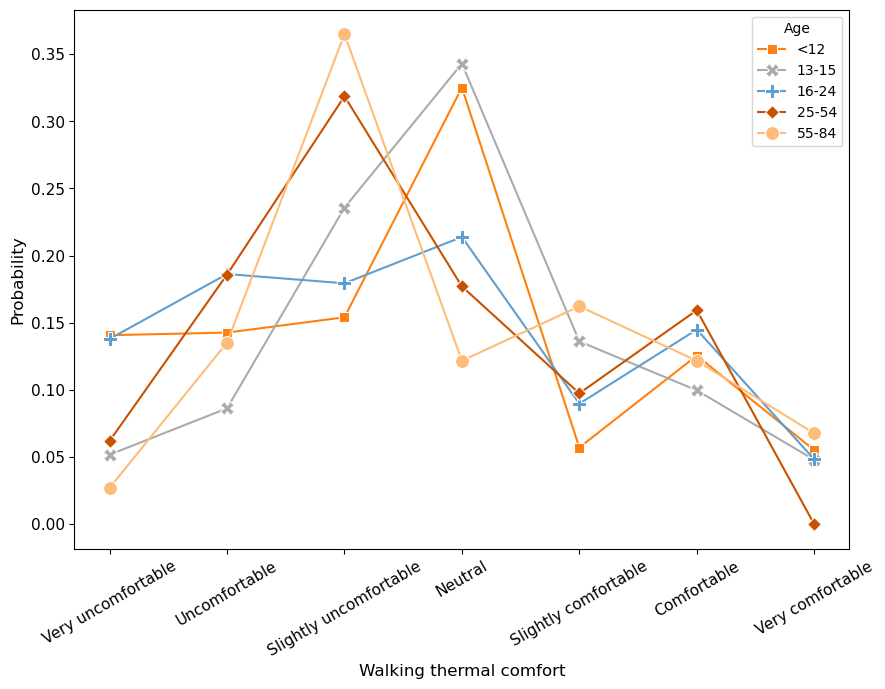

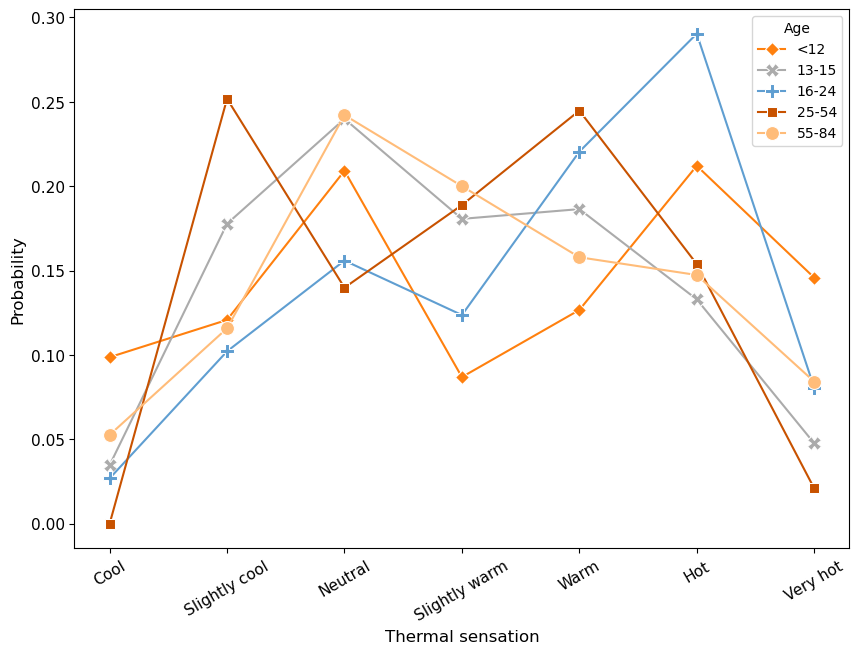

In [12]:
# Thermal comfort vs age (line-plot normalized by each age-range)

x,y = 'age2', 'thermal_confort'


vots_age_norm = all_vots_processed_gender.groupby(x)[y].value_counts(normalize=True).reset_index()
vots_age_norm.thermal_confort = pd.Categorical(values=vots_age_norm.thermal_confort, categories=['Molt incòmode', 'Incòmode', 'Lleugerament incòmode', 'Neutre','Lleugerament còmode','Còmode','Molt còmode']) ## Set the order for the column as you want
vots_age_norm.sort_values(['thermal_confort'], inplace=True) ## Sort the column


fig, ax = plt.subplots(figsize=(10, 7))

ax = sns.lineplot(data=vots_age_norm, x='thermal_confort', y='proportion', hue='age2',style="age2",palette=["#FF800E", "#ABABAB","#5F9ED1","#C85200","#FFBC79"],
            hue_order=['<12','13-15','16-24','25-54','55-84'], markers=True,markersize=10,dashes=False)

ax.set_xticks(range(7))
ax.set_xticklabels(['Very uncomfortable', 'Uncomfortable', 'Slightly uncomfortable', 'Neutral', 'Slightly comfortable', 
                   'Comfortable', 'Very comfortable'])


plt.xticks(rotation=30, fontsize=11)
plt.yticks(rotation=0, fontsize=11)
ax.set_xlabel('Thermal comfort',fontsize=12)
ax.set_ylabel('Probability',fontsize=12)

ax.get_legend().set_title("Age")

plt.show()
print('')
print('')



################################################################################
# Walking thermal comfort vs age (line-plot normalized by each age-range)


x,y = 'age2', 'thermal_confort_walking'


vots_age_norm = all_vots_processed_gender.groupby(x)[y].value_counts(normalize=True).reset_index()
vots_age_norm.thermal_confort_walking = pd.Categorical(values=vots_age_norm.thermal_confort_walking, categories=['Molt incòmode', 'Incòmode', 'Lleugerament incòmode', 'Neutre','Lleugerament còmode','Còmode','Molt còmode']) ## Set the order for the column as you want
vots_age_norm.sort_values(['thermal_confort_walking'], inplace=True) ## Sort the column


fig, ax = plt.subplots(figsize=(10, 7))

ax = sns.lineplot(data=vots_age_norm, x='thermal_confort_walking', y='proportion', hue='age2',style="age2",palette=["#FF800E", "#ABABAB","#5F9ED1","#C85200","#FFBC79"],
            hue_order=['<12','13-15','16-24','25-54','55-84'], markers=True,markersize=10,dashes=False)

ax.set_xticks(range(7))
ax.set_xticklabels(['Very uncomfortable', 'Uncomfortable', 'Slightly uncomfortable', 'Neutral', 'Slightly comfortable', 
                   'Comfortable', 'Very comfortable'])


plt.xticks(rotation=30, fontsize=11)
plt.yticks(rotation=0, fontsize=11)
ax.set_xlabel('Walking thermal comfort',fontsize=12)
ax.set_ylabel('Probability',fontsize=12)

ax.get_legend().set_title("Age")

plt.show()
print('')
print('')


################################################################################
# Thermal sensation vs age (line-plot normalized by each age-range)

x,y = 'age2', 'thermal_sensation'


vots_age_norm = all_vots_processed_gender.groupby(x)[y].value_counts(normalize=True).reset_index()
vots_age_norm.thermal_sensation = pd.Categorical(values=vots_age_norm.thermal_sensation, categories=['Fresc', 'Lleugerament fresc', 'Neutre', 'Lleugerament càlid','Càlid','Calorós','Molt calorós']) ## Set the order for the column as you want
vots_age_norm.sort_values(['thermal_sensation'], inplace=True) ## Sort the column


fig, ax = plt.subplots(figsize=(10, 7))

ax = sns.lineplot(data=vots_age_norm, x='thermal_sensation', y='proportion', hue='age2',style="age2",palette=["#FF800E", "#ABABAB","#5F9ED1","#C85200","#FFBC79"],
            hue_order=['<12','13-15','16-24','25-54','55-84'], markers=True,markersize=10,dashes=False)

ax.set_xticks(range(7))
ax.set_xticklabels(['Cool', 'Slightly cool', 'Neutral', 'Slightly warm', 'Warm', 'Hot', 'Very hot'])


plt.xticks(rotation=30, fontsize=11)
plt.yticks(rotation=0, fontsize=11)
ax.set_xlabel('Thermal sensation',fontsize=12)
ax.set_ylabel('Probability',fontsize=12)

ax.get_legend().set_title("Age")

plt.show()

**grouping all age-ranges from >16 years old**

In [13]:
edad=[]
for i in range(len(all_vots_processed_gender)):
    if all_vots_processed_gender['age2'][i] == '<12':
        edad.append('<12')
        
        
    elif all_vots_processed_gender['age2'][i] == '13-15':
        edad.append('13-15')
       
    else:
        edad.append('>16')
        #c=c+1

all_vots_processed_gender_copy = all_vots_processed_gender.copy()
all_vots_processed_gender_copy['age3'] = edad

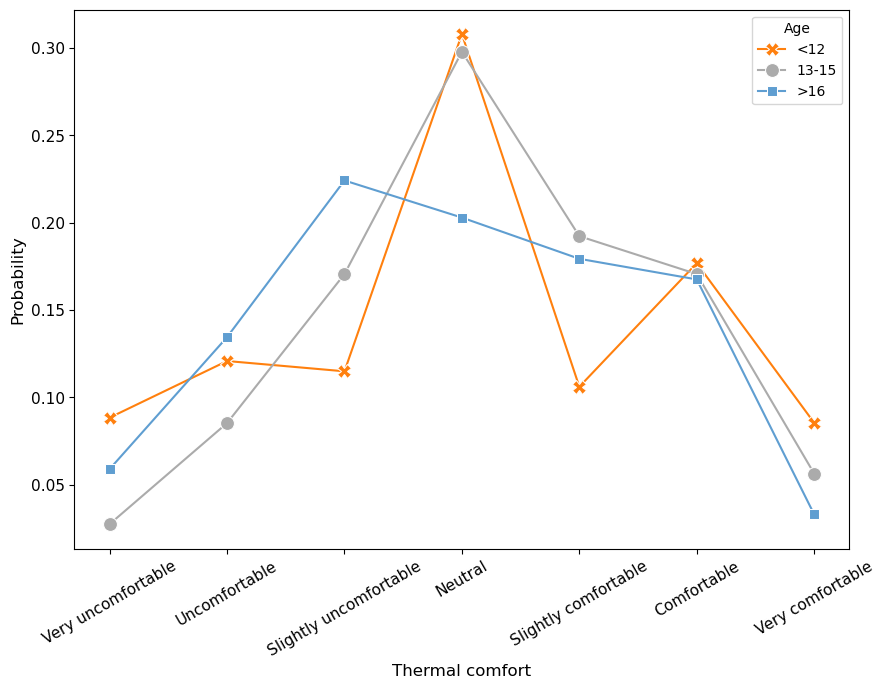

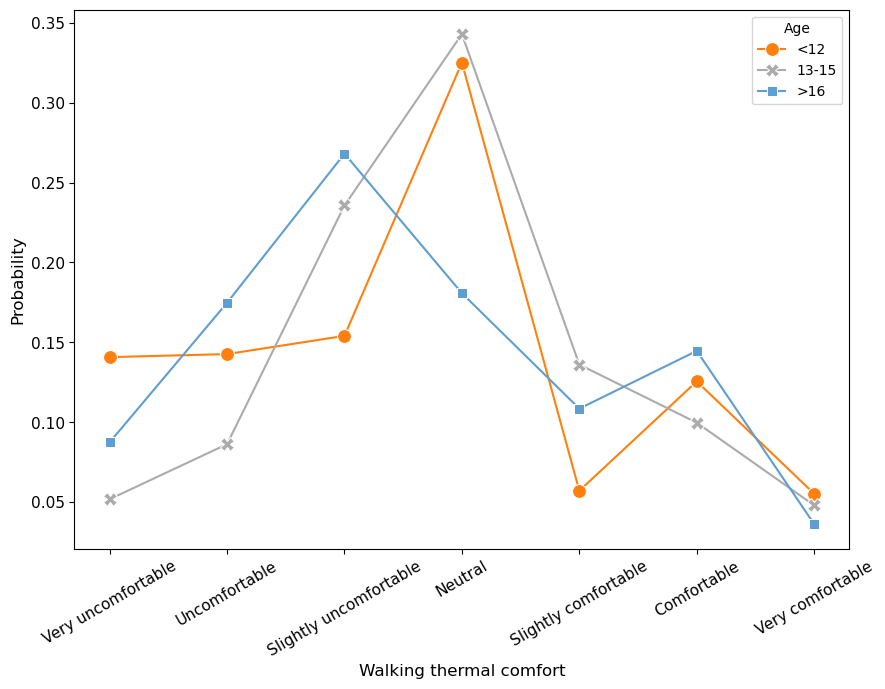

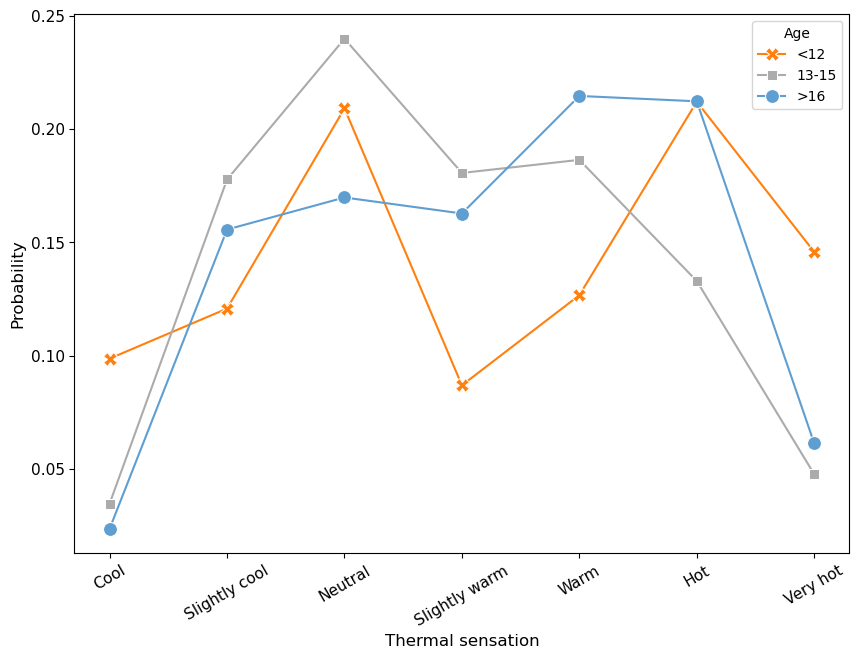

In [14]:
x,y = 'age3', 'thermal_confort'


vots_age_norm = all_vots_processed_gender_copy.groupby(x)[y].value_counts(normalize=True).reset_index()
vots_age_norm.thermal_confort = pd.Categorical(values=vots_age_norm.thermal_confort, categories=['Molt incòmode', 'Incòmode', 'Lleugerament incòmode', 'Neutre','Lleugerament còmode','Còmode','Molt còmode']) ## Set the order for the column as you want
vots_age_norm.sort_values(['thermal_confort'], inplace=True) ## Sort the column


fig, ax = plt.subplots(figsize=(10, 7))

ax = sns.lineplot(data=vots_age_norm, x='thermal_confort', y='proportion', hue='age3',style="age3",palette=["#FF800E", "#ABABAB","#5F9ED1"],
            hue_order=['<12','13-15','>16'], markers=True,markersize=10,dashes=False)

ax.set_xticks(range(7))
ax.set_xticklabels(['Very uncomfortable', 'Uncomfortable', 'Slightly uncomfortable', 'Neutral', 'Slightly comfortable', 
                   'Comfortable', 'Very comfortable'])


plt.xticks(rotation=30, fontsize=11)
plt.yticks(rotation=0, fontsize=11)
ax.set_xlabel('Thermal comfort',fontsize=12)
ax.set_ylabel('Probability',fontsize=12)

ax.get_legend().set_title("Age")

plt.show()



x,y = 'age3', 'thermal_confort_walking'


vots_age_norm = all_vots_processed_gender_copy.groupby(x)[y].value_counts(normalize=True).reset_index()
vots_age_norm.thermal_confort_walking = pd.Categorical(values=vots_age_norm.thermal_confort_walking, categories=['Molt incòmode', 'Incòmode', 'Lleugerament incòmode', 'Neutre','Lleugerament còmode','Còmode','Molt còmode']) ## Set the order for the column as you want
vots_age_norm.sort_values(['thermal_confort_walking'], inplace=True) ## Sort the column


fig, ax = plt.subplots(figsize=(10, 7))

ax = sns.lineplot(data=vots_age_norm, x='thermal_confort_walking', y='proportion', hue='age3',style="age3",palette=["#FF800E", "#ABABAB","#5F9ED1"],
            hue_order=['<12','13-15','>16'], markers=True,markersize=10,dashes=False)

ax.set_xticks(range(7))
ax.set_xticklabels(['Very uncomfortable', 'Uncomfortable', 'Slightly uncomfortable', 'Neutral', 'Slightly comfortable', 
                   'Comfortable', 'Very comfortable'])


plt.xticks(rotation=30, fontsize=11)
plt.yticks(rotation=0, fontsize=11)
ax.set_xlabel('Walking thermal comfort',fontsize=12)
ax.set_ylabel('Probability',fontsize=12)

ax.get_legend().set_title("Age")

plt.show()




x,y = 'age3', 'thermal_sensation'


vots_age_norm = all_vots_processed_gender_copy.groupby(x)[y].value_counts(normalize=True).reset_index()
vots_age_norm.thermal_sensation = pd.Categorical(values=vots_age_norm.thermal_sensation, categories=['Fresc', 'Lleugerament fresc', 'Neutre', 'Lleugerament càlid','Càlid','Calorós','Molt calorós']) ## Set the order for the column as you want
vots_age_norm.sort_values(['thermal_sensation'], inplace=True) ## Sort the column


fig, ax = plt.subplots(figsize=(10, 7))

ax = sns.lineplot(data=vots_age_norm, x='thermal_sensation', y='proportion', hue='age3',style="age3",palette=["#FF800E", "#ABABAB","#5F9ED1"],
            hue_order=['<12','13-15','>16'], markers=True,markersize=10,dashes=False)

ax.set_xticks(range(7))
ax.set_xticklabels(['Cool', 'Slightly cool', 'Neutral', 'Slightly warm', 'Warm', 'Hot', 'Very hot'])


plt.xticks(rotation=30, fontsize=11)
plt.yticks(rotation=0, fontsize=11)
ax.set_xlabel('Thermal sensation',fontsize=12)
ax.set_ylabel('Probability',fontsize=12)

ax.get_legend().set_title("Age")

plt.show()

#### 2.2.4. Horizontal bar-plots

**Thermal comfort**

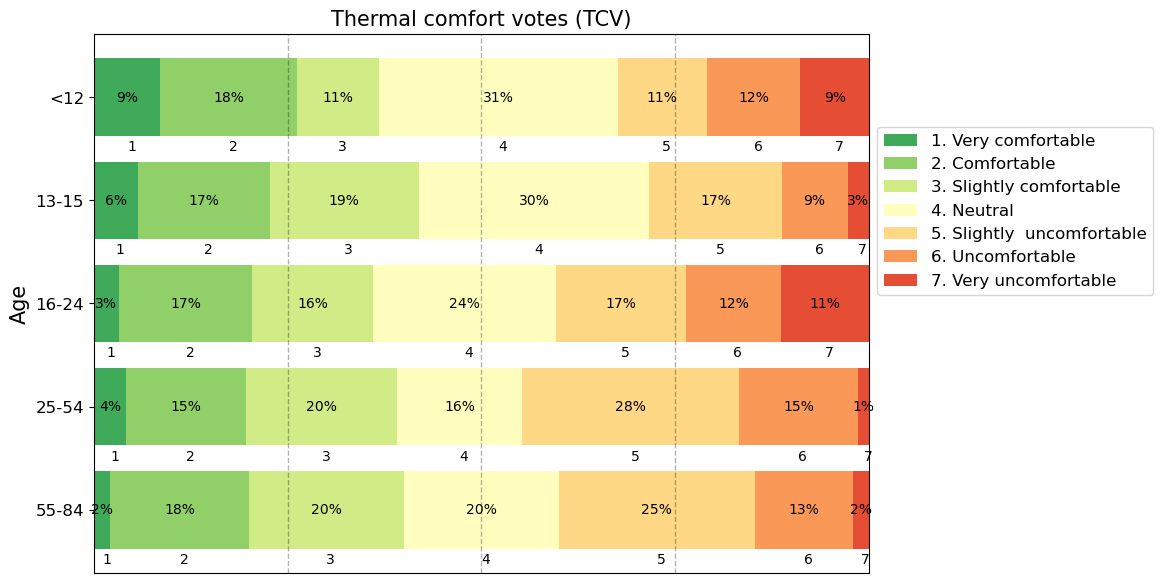

In [15]:
category_names = ['7. Very uncomfortable', '6. Uncomfortable', '5. Slightly  uncomfortable', '4. Neutral', 
                  '3. Slightly comfortable', '2. Comfortable', '1. Very comfortable']
category_names_r = list(reversed(category_names))

results = {
    '<12': [60, 82, 78, 209, 72, 120, 58],
    '13-15': [19, 59, 118, 206, 133, 118, 39],
    '16-24': [21, 23, 31, 44, 29, 32, 6],
    '25-54': [2, 22, 40, 23, 28, 22, 6],
    '55-84': [2, 12, 24, 19, 19, 17, 2],}

list_keys=[]
list_values_r=[]
for key in results:
    list_keys.append(key)
    list_values_r.append(list(reversed(results[key])))
    
results_r = dict(zip(list_keys, list_values_r))


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    
    total_votes_per_age = np.sum(data,axis=1)
    new_data = ((data.transpose()/total_votes_per_age)*100).transpose()
    #new_data = np.matrix.round(new_data, 2)
    
    data_cum = new_data.cumsum(axis=1)
    category_colors = plt.colormaps['RdYlGn_r'](np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(10, 7))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(new_data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        data_text = data[:, i]
        widths = new_data[:, i]
        starts = data_cum[:, i] - widths
        
        
        
        rects = ax.barh(labels, widths, left=starts, height=0.75,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'black' if r * g * b < 0.5 else 'black'
        ax.bar_label(rects, label_type='center', fmt = '%.0f%%', color=text_color)
        
        if i==0:
            plt.text(x = (data_cum[0][i])/2, y = 0.52, s=str(i+1))
            plt.text(x = (data_cum[1][i])/2, y = 1.52, s=str(i+1))
            plt.text(x = (data_cum[2][i])/2, y = 2.52, s=str(i+1))
            plt.text(x = (data_cum[3][i])/2, y = 3.52, s=str(i+1))
            plt.text(x = (data_cum[4][i])/2, y = 4.52, s=str(i+1))
        else:
            plt.text(x = data_cum[0][i-1]+((data_cum[0][i]-data_cum[0][i-1])/2), y = 0.52, s=str(i+1))
            plt.text(x = data_cum[1][i-1]+((data_cum[1][i]-data_cum[1][i-1])/2), y = 1.52, s=str(i+1))
            plt.text(x = data_cum[2][i-1]+((data_cum[2][i]-data_cum[2][i-1])/2), y = 2.52, s=str(i+1))
            plt.text(x = data_cum[3][i-1]+((data_cum[3][i]-data_cum[3][i-1])/2), y = 3.52, s=str(i+1))
            plt.text(x = data_cum[4][i-1]+((data_cum[4][i]-data_cum[4][i-1])/2), y = 4.52, s=str(i+1))


    # Plot quartile dotted lines
    ax.axvline(x=25, ymin=0, ymax=1, alpha = 0.3, ls = '--', lw=1, c='black')
    ax.axvline(x=50, ymin=0, ymax=1, alpha = 0.3, ls = '--', lw=1, c='black')
    ax.axvline(x=75, ymin=0, ymax=1, alpha = 0.3, ls = '--', lw=1, c='black')     
        
    ax.legend(ncols=1, bbox_to_anchor=(1, 0.5),
              loc='lower left', fontsize='large')
    
    ax.set_ylabel('Age',fontsize=15)
    ax.tick_params(labelsize=12)
    ax.set_title('Thermal comfort votes (TCV)',fontsize=15)
    
    return fig, ax


fig, ax = survey(results_r, category_names_r)
plt.show()


**Walking thermal comfort**

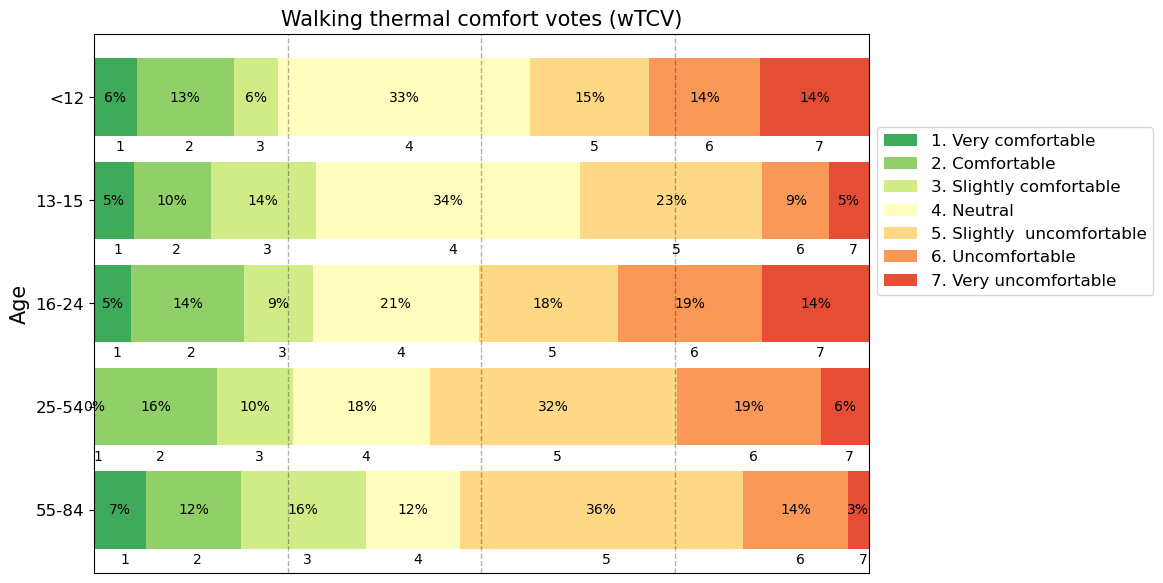

In [16]:
import matplotlib.pyplot as plt
import numpy as np

category_names = ['7. Very uncomfortable', '6. Uncomfortable', '5. Slightly  uncomfortable', '4. Neutral', 
                  '3. Slightly comfortable', '2. Comfortable', '1. Very comfortable']
category_names_r = list(reversed(category_names))

results = {
    '<12': [74, 75, 81, 171, 30, 66, 29],
    '13-15': [27, 45, 123, 179, 71, 52, 27],
    '16-24': [20, 27, 26, 31, 13, 21, 7],
    '25-54': [7, 21, 36, 20, 11, 18, 0],
    '55-84': [2, 10, 27, 9, 12, 9, 5],}

list_keys=[]
list_values_r=[]
for key in results:
    list_keys.append(key)
    list_values_r.append(list(reversed(results[key])))
    
results_r = dict(zip(list_keys, list_values_r))


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    
    total_votes_per_age = np.sum(data,axis=1)
    new_data = ((data.transpose()/total_votes_per_age)*100).transpose()
    #print(new_data)
    #new_data = np.matrix.round(new_data, 2)
    
    data_cum = new_data.cumsum(axis=1)
    category_colors = plt.colormaps['RdYlGn_r'](np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(10, 7))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(new_data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        data_text = data[:, i]
        widths = new_data[:, i]
        starts = data_cum[:, i] - widths
        
        
        
        rects = ax.barh(labels, widths, left=starts, height=0.75,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'black' if r * g * b < 0.5 else 'black'
        ax.bar_label(rects, label_type='center', fmt = '%.0f%%', color=text_color)
        
        if i==0:
            plt.text(x = (data_cum[0][i])/2, y = 0.52, s=str(i+1))
            plt.text(x = (data_cum[1][i])/2, y = 1.52, s=str(i+1))
            plt.text(x = (data_cum[2][i])/2, y = 2.52, s=str(i+1))
            plt.text(x = (data_cum[3][i])/2, y = 3.52, s=str(i+1))
            plt.text(x = (data_cum[4][i])/2, y = 4.52, s=str(i+1))
        else:
            plt.text(x = data_cum[0][i-1]+((data_cum[0][i]-data_cum[0][i-1])/2), y = 0.52, s=str(i+1))
            plt.text(x = data_cum[1][i-1]+((data_cum[1][i]-data_cum[1][i-1])/2), y = 1.52, s=str(i+1))
            plt.text(x = data_cum[2][i-1]+((data_cum[2][i]-data_cum[2][i-1])/2), y = 2.52, s=str(i+1))
            plt.text(x = data_cum[3][i-1]+((data_cum[3][i]-data_cum[3][i-1])/2), y = 3.52, s=str(i+1))
            plt.text(x = data_cum[4][i-1]+((data_cum[4][i]-data_cum[4][i-1])/2), y = 4.52, s=str(i+1))
 
            
            
    # Plot quartile dotted lines
    ax.axvline(x=25, ymin=0, ymax=1, alpha = 0.3, ls = '--', lw=1, c='black')
    ax.axvline(x=50, ymin=0, ymax=1, alpha = 0.3, ls = '--', lw=1, c='black')
    ax.axvline(x=75, ymin=0, ymax=1, alpha = 0.3, ls = '--', lw=1, c='black') 
    
        
    ax.legend(ncols=1, bbox_to_anchor=(1, 0.5),
              loc='lower left', fontsize='large')
    
    ax.set_ylabel('Age',fontsize=15)
    ax.tick_params(labelsize=12)
    ax.set_title('Walking thermal comfort votes (wTCV)',fontsize=15)
    
    return fig, ax


fig, ax = survey(results_r, category_names_r)
plt.show()


**Thermal sensation**

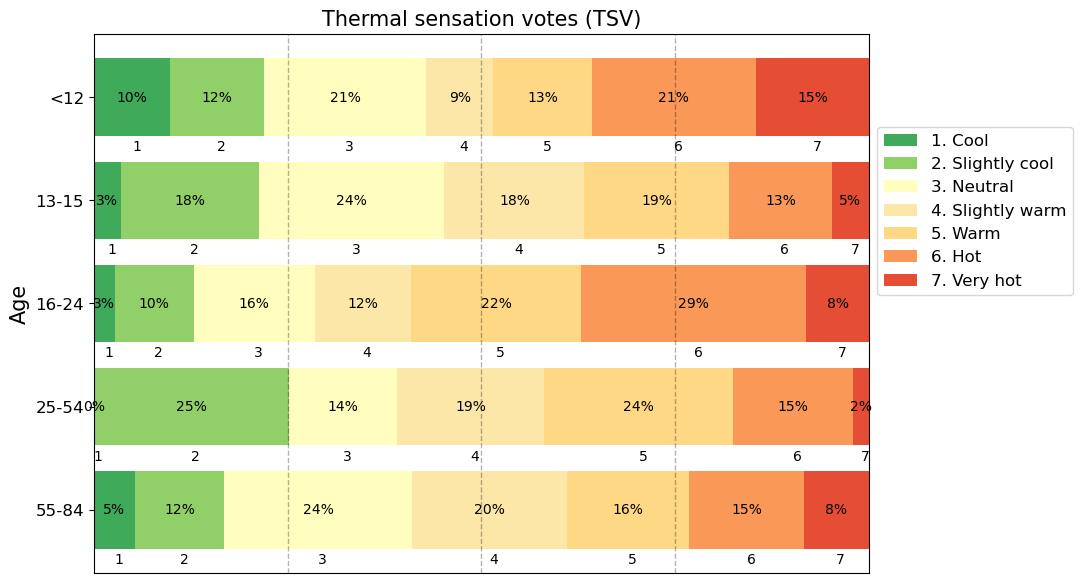

In [17]:
import matplotlib.pyplot as plt
import numpy as np

category_names = ['1. Cool', '2. Slightly cool', '3. Neutral', '4. Slightly warm', '5. Warm', '6. Hot', '7. Very hot']
category_names_r = list(reversed(category_names))


results = {
    '<12': [67, 82, 142, 59, 86, 144, 99],
    '13-15': [24, 123, 166, 125, 129, 92, 33],
    '16-24': [5, 19, 29, 23, 41, 54, 15],
    '25-54': [0, 36, 20, 27, 35, 22, 3],
    '55-84': [5, 11, 23, 19, 15, 14, 8],}

list_keys=[]
list_values_r=[]
for key in results:
    list_keys.append(key)
    list_values_r.append(list(reversed(results[key])))
    
results_r = dict(zip(list_keys, list_values_r))


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    
    total_votes_per_age = np.sum(data,axis=1)
    new_data = ((data.transpose()/total_votes_per_age)*100).transpose()
    #print(new_data)
    #new_data = np.matrix.round(new_data, 2)
    
    data_cum = new_data.cumsum(axis=1)
    category_colors = plt.colormaps['RdYlGn_r'](np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(10, 7))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(new_data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        
        if i==2:
            new_color = category_colors[3]
        elif i==3:
            new_color =  np.array([0.98746328, 0.9067397, 0.65926182, 1.])
        else:
            new_color=color
            
        data_text = data[:, i]
        widths = new_data[:, i]
        starts = data_cum[:, i] - widths
        
        
        
        rects = ax.barh(labels, widths, left=starts, height=0.75,
                        label=colname, color=new_color)

        r, g, b, _ = color
        text_color = 'black' if r * g * b < 0.5 else 'black'
        ax.bar_label(rects, label_type='center', fmt = '%.0f%%', color=text_color)

        
        if i==0:
            plt.text(x = (data_cum[0][i])/2, y = 0.52, s=str(i+1))
            plt.text(x = (data_cum[1][i])/2, y = 1.52, s=str(i+1))
            plt.text(x = (data_cum[2][i])/2, y = 2.52, s=str(i+1))
            plt.text(x = (data_cum[3][i])/2, y = 3.52, s=str(i+1))
            plt.text(x = (data_cum[4][i])/2, y = 4.52, s=str(i+1))
        else:
            plt.text(x = data_cum[0][i-1]+((data_cum[0][i]-data_cum[0][i-1])/2), y = 0.52, s=str(i+1))
            plt.text(x = data_cum[1][i-1]+((data_cum[1][i]-data_cum[1][i-1])/2), y = 1.52, s=str(i+1))
            plt.text(x = data_cum[2][i-1]+((data_cum[2][i]-data_cum[2][i-1])/2), y = 2.52, s=str(i+1))
            plt.text(x = data_cum[3][i-1]+((data_cum[3][i]-data_cum[3][i-1])/2), y = 3.52, s=str(i+1))
            plt.text(x = data_cum[4][i-1]+((data_cum[4][i]-data_cum[4][i-1])/2), y = 4.52, s=str(i+1))

            
    # Plot quartile dotted lines
    ax.axvline(x=25, ymin=0, ymax=1, alpha = 0.3, ls = '--', lw=1, c='black')
    ax.axvline(x=50, ymin=0, ymax=1, alpha = 0.3, ls = '--', lw=1, c='black')
    ax.axvline(x=75, ymin=0, ymax=1, alpha = 0.3, ls = '--', lw=1, c='black')  
        
    ax.legend(ncols=1, bbox_to_anchor=(1, 0.5),
              loc='lower left', fontsize='large')
    
    ax.set_ylabel('Age',fontsize=15)
    ax.tick_params(labelsize=12)
    ax.set_title('Thermal sensation votes (TSV)',fontsize=15)
    
    return fig, ax


fig, ax = survey(results, category_names)
plt.show()


### 2.3. Time spent in public space

#### 2.3.1. Statistics

In [18]:
columns = ['thermal_confort', 'thermal_confort_walking', 'thermal_sensation']

for column in columns:
    print('################')
    print(column)
    print('################')
    print('')
    for i,j in all_vots_processed_gender.groupby(['spent_time2']):

        print(i[0])
        print('-------')
        print(j[column].value_counts())
        #print(j[column].value_counts(normalize=True).mul(100).round(1))
        print('')
        
    print('')
    print('')
    

################
thermal_confort
################

1h - 2h
-------
thermal_confort
Neutre                   119
Còmode                   111
Lleugerament còmode       82
Lleugerament incòmode     74
Incòmode                  50
Molt còmode               21
Molt incòmode             13
Name: count, dtype: int64

2h - 4h
-------
thermal_confort
Neutre                   152
Lleugerament còmode       90
Lleugerament incòmode     83
Còmode                    75
Incòmode                  55
Molt còmode               30
Molt incòmode             15
Name: count, dtype: int64

<1h
-------
thermal_confort
Neutre                   102
Lleugerament incòmode     62
Còmode                    50
Lleugerament còmode       47
Incòmode                  45
Molt còmode               42
Molt incòmode             26
Name: count, dtype: int64

>4h
-------
thermal_confort
Neutre                   128
Còmode                    73
Lleugerament incòmode     72
Lleugerament còmode       62
Molt incòmode          

#### 2.3.2. Histograms

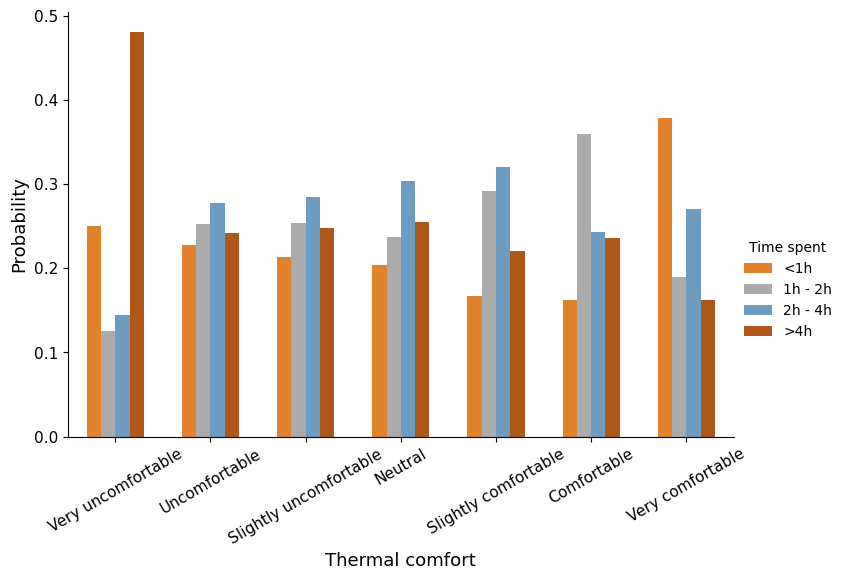

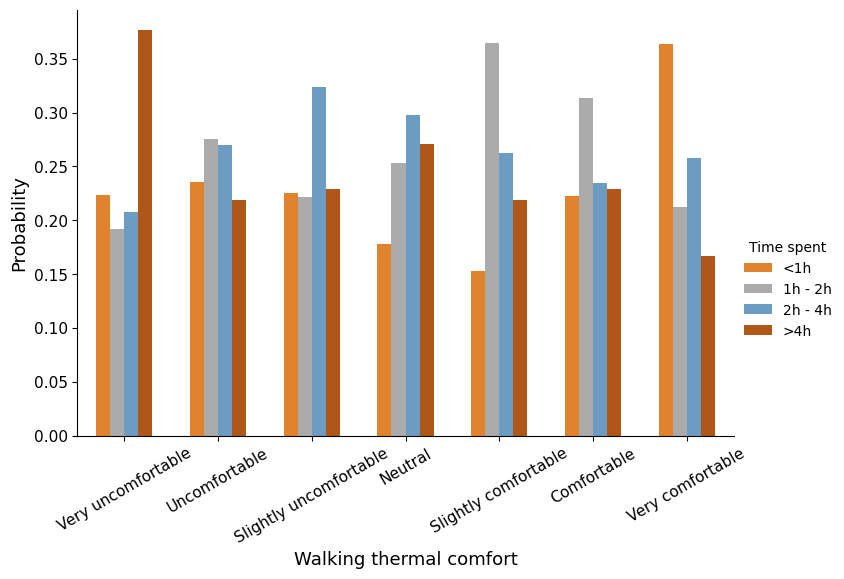

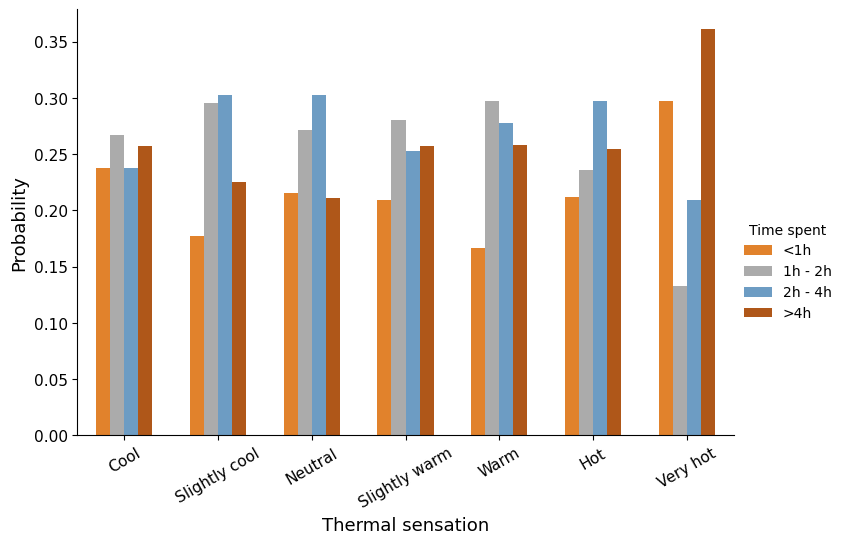

In [19]:
# Thermal confort vs spent time

x,y = 'thermal_confort', 'spent_time2'

vots_time_norm = all_vots_processed_gender.groupby(x)[y].value_counts(normalize=True).reset_index()


vots_time_norm.thermal_confort = pd.Categorical(values=vots_time_norm.thermal_confort, categories=['Molt incòmode', 'Incòmode', 'Lleugerament incòmode', 'Neutre','Lleugerament còmode','Còmode','Molt còmode']) ## Set the order for the column as you want
vots_time_norm.sort_values(['thermal_confort'], inplace=True) # Sort the column


g = sns.catplot(x=x,y='proportion',hue=y,kind='bar',data=vots_time_norm, palette=["#FF800E", "#ABABAB","#5F9ED1","#C85200"],
                alpha=1.,hue_order=['<1h','1h - 2h','2h - 4h','>4h'],width=0.6, height=5, aspect=1.5).set(xlabel='Thermal comfort', ylabel='Probability')  ## and plot

plt.xticks(rotation=30, fontsize=11)
plt.yticks(rotation=0, fontsize=11)

g.set_xticklabels(['Very uncomfortable', 'Uncomfortable', 'Slightly uncomfortable', 'Neutral', 'Slightly comfortable', 
                   'Comfortable', 'Very comfortable'])

# Now change the hue (legend) title
g._legend.set_title('Time spent')

# Size of the labels
g.set_axis_labels('Thermal comfort', 'Probability', fontsize=13)

plt.show()
print('')
print('')



############################################################################################3
# Walking thermal confort vs spent time

x,y = 'thermal_confort_walking', 'spent_time2'

vots_time_norm = all_vots_processed_gender.groupby(x)[y].value_counts(normalize=True).reset_index()

vots_time_norm.thermal_confort_walking = pd.Categorical(values=vots_time_norm.thermal_confort_walking, categories=['Molt incòmode', 'Incòmode', 'Lleugerament incòmode', 'Neutre','Lleugerament còmode','Còmode','Molt còmode']) ## Set the order for the column as you want
vots_time_norm.sort_values(['thermal_confort_walking'], inplace=True) # Sort the column


g = sns.catplot(x=x,y='proportion',hue=y,kind='bar',data=vots_time_norm,palette=["#FF800E", "#ABABAB","#5F9ED1","#C85200"],
                alpha=1.,hue_order=['<1h','1h - 2h','2h - 4h','>4h'],width=0.6, height=5, aspect=1.5).set(xlabel='Walking thermal comfort', ylabel='Probability')  ## and plot

plt.xticks(rotation=30, fontsize=11)
plt.yticks(rotation=0, fontsize=11)

g.set_xticklabels(['Very uncomfortable', 'Uncomfortable', 'Slightly uncomfortable', 'Neutral', 'Slightly comfortable', 
                   'Comfortable', 'Very comfortable'])

# Now change the hue (legend) title
g._legend.set_title('Time spent')

# Size of the labels
g.set_axis_labels('Walking thermal comfort', 'Probability', fontsize=13)
    
plt.show()
print('')
print('')



############################################################################################3
# Thermal sensation vs spent time


x,y = 'thermal_sensation', 'spent_time2'

vots_time_norm = all_vots_processed_gender.groupby(x)[y].value_counts(normalize=True).reset_index()


vots_time_norm.thermal_sensation = pd.Categorical(values=vots_time_norm.thermal_sensation, categories=['Fresc', 'Lleugerament fresc', 'Neutre', 'Lleugerament càlid','Càlid','Calorós','Molt calorós']) ## Set the order for the column as you want
vots_time_norm.sort_values(['thermal_sensation'], inplace=True) # Sort the column


g = sns.catplot(x=x,y='proportion',hue=y,kind='bar',data=vots_time_norm,palette=["#FF800E", "#ABABAB","#5F9ED1","#C85200"],
                alpha=1.,hue_order=['<1h','1h - 2h','2h - 4h','>4h'],width=0.6, height=5, aspect=1.5).set(xlabel='Thermal sensation', ylabel='Probability')  ## and plot

plt.xticks(rotation=30, fontsize=11)
plt.yticks(rotation=0, fontsize=11)

g.set_xticklabels(['Cool', 'Slightly cool', 'Neutral', 'Slightly warm', 'Warm', 'Hot', 'Very hot'])

# Now change the hue (legend) title
g._legend.set_title('Time spent')

# Size of the labels
g.set_axis_labels('Thermal sensation', 'Probability', fontsize=13)
    
plt.show()



#### 2.3.3. Horizontal bar-plots

**Thermal comfort**

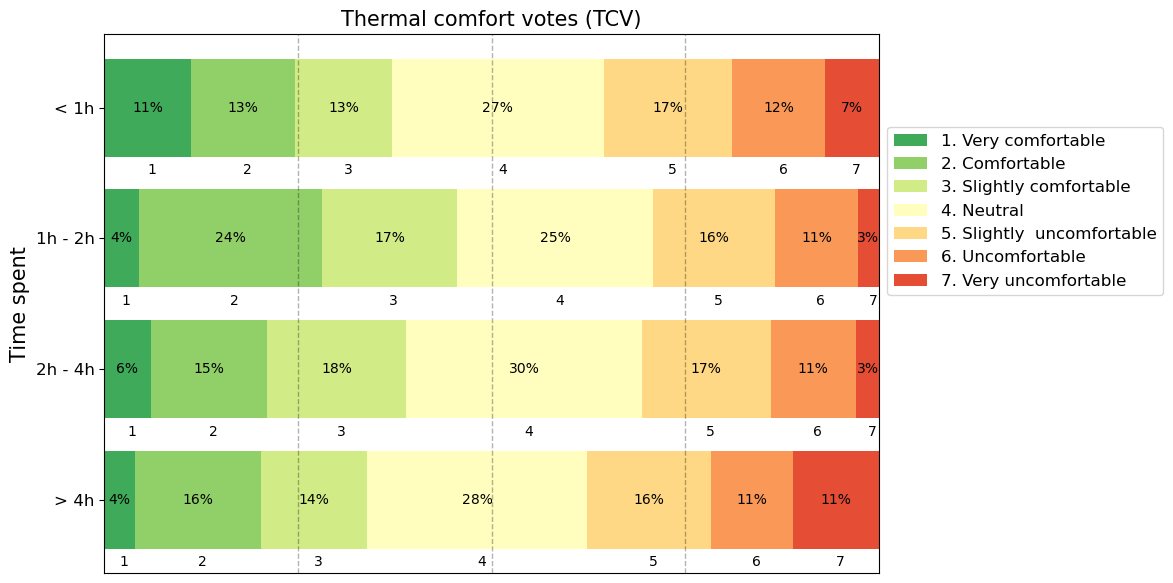

In [20]:
import matplotlib.pyplot as plt
import numpy as np

category_names = ['7. Very uncomfortable', '6. Uncomfortable', '5. Slightly  uncomfortable', '4. Neutral', 
                  '3. Slightly comfortable', '2. Comfortable', '1. Very comfortable']
category_names_r = list(reversed(category_names))

results = {
    '< 1h': [26, 45, 62, 102, 47, 50, 42],
    '1h - 2h': [13, 50, 74, 119, 82, 111, 21],
    '2h - 4h': [15, 55, 83, 152, 90, 75, 30],
    '> 4h': [50, 48, 72, 128, 62, 73, 18],}

list_keys=[]
list_values_r=[]
for key in results:
    list_keys.append(key)
    list_values_r.append(list(reversed(results[key])))
    
results_r = dict(zip(list_keys, list_values_r))


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    
    total_votes_per_age = np.sum(data,axis=1)
    new_data = ((data.transpose()/total_votes_per_age)*100).transpose()
    #print(new_data)
    #new_data = np.matrix.round(new_data, 2)
    
    data_cum = new_data.cumsum(axis=1)
    category_colors = plt.colormaps['RdYlGn_r'](np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(10, 7))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(new_data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        data_text = data[:, i]
        widths = new_data[:, i]
        starts = data_cum[:, i] - widths
        
        
        
        rects = ax.barh(labels, widths, left=starts, height=0.75,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'black' if r * g * b < 0.5 else 'black'
        ax.bar_label(rects, label_type='center', fmt = '%.0f%%', color=text_color)

        if i==0:
            plt.text(x = (data_cum[0][i])/2, y = 0.51, s=str(i+1))
            plt.text(x = (data_cum[1][i])/2, y = 1.51, s=str(i+1))
            plt.text(x = (data_cum[2][i])/2, y = 2.51, s=str(i+1))
            plt.text(x = (data_cum[3][i])/2, y = 3.51, s=str(i+1))

        else:
            plt.text(x = data_cum[0][i-1]+((data_cum[0][i]-data_cum[0][i-1])/2), y = 0.51, s=str(i+1))
            plt.text(x = data_cum[1][i-1]+((data_cum[1][i]-data_cum[1][i-1])/2), y = 1.51, s=str(i+1))
            plt.text(x = data_cum[2][i-1]+((data_cum[2][i]-data_cum[2][i-1])/2), y = 2.51, s=str(i+1))
            plt.text(x = data_cum[3][i-1]+((data_cum[3][i]-data_cum[3][i-1])/2), y = 3.51, s=str(i+1))


            
    # Plot quartile dotted lines
    ax.axvline(x=25, ymin=0, ymax=1, alpha = 0.3, ls = '--', lw=1, c='black')
    ax.axvline(x=50, ymin=0, ymax=1, alpha = 0.3, ls = '--', lw=1, c='black')
    ax.axvline(x=75, ymin=0, ymax=1, alpha = 0.3, ls = '--', lw=1, c='black')      
        
    ax.legend(ncols=1, bbox_to_anchor=(1, 0.5),
              loc='lower left', fontsize='large')
    
    ax.set_ylabel('Time spent',fontsize=15)
    ax.tick_params(labelsize=12)
    ax.set_title('Thermal comfort votes (TCV)',fontsize=15)
    
    return fig, ax


fig, ax = survey(results_r, category_names_r)
plt.show()


**Walking thermal comfort**

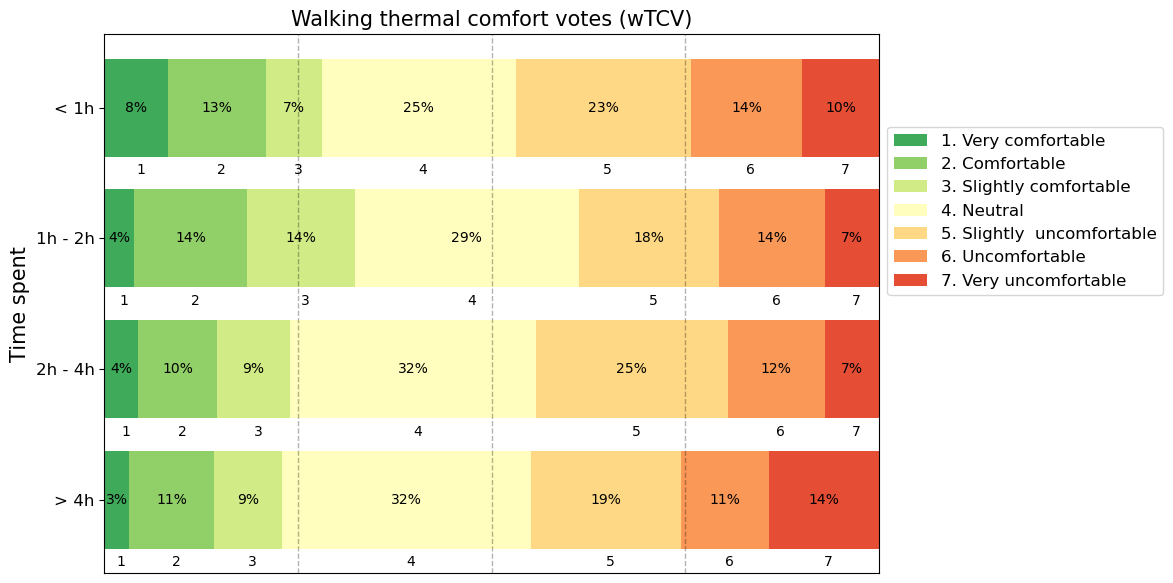

In [21]:
import matplotlib.pyplot as plt
import numpy as np

category_names = ['7. Very uncomfortable', '6. Uncomfortable', '5. Slightly  uncomfortable', '4. Neutral', 
                  '3. Slightly comfortable', '2. Comfortable', '1. Very comfortable']
category_names_r = list(reversed(category_names))

results = {
    '< 1h': [29, 42, 66, 73, 21, 37, 24],
    '1h - 2h': [25, 49, 65, 104, 50, 52, 14],
    '2h - 4h': [27, 48, 95, 122, 36, 39, 17],
    '> 4h': [49, 39, 67, 111, 30, 38, 11],}

list_keys=[]
list_values_r=[]
for key in results:
    list_keys.append(key)
    list_values_r.append(list(reversed(results[key])))
    
results_r = dict(zip(list_keys, list_values_r))


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    
    total_votes_per_age = np.sum(data,axis=1)
    new_data = ((data.transpose()/total_votes_per_age)*100).transpose()
    #print(new_data)
    #new_data = np.matrix.round(new_data, 2)
    
    data_cum = new_data.cumsum(axis=1)
    category_colors = plt.colormaps['RdYlGn_r'](np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(10, 7))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(new_data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        data_text = data[:, i]
        widths = new_data[:, i]
        starts = data_cum[:, i] - widths
        
        
        
        rects = ax.barh(labels, widths, left=starts, height=0.75,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'black' if r * g * b < 0.5 else 'black'
        ax.bar_label(rects, label_type='center', fmt = '%.0f%%', color=text_color)
        
        if i==0:
            plt.text(x = (data_cum[0][i])/2, y = 0.51, s=str(i+1))
            plt.text(x = (data_cum[1][i])/2, y = 1.51, s=str(i+1))
            plt.text(x = (data_cum[2][i])/2, y = 2.51, s=str(i+1))
            plt.text(x = (data_cum[3][i])/2, y = 3.51, s=str(i+1))

        else:
            plt.text(x = data_cum[0][i-1]+((data_cum[0][i]-data_cum[0][i-1])/2), y = 0.51, s=str(i+1))
            plt.text(x = data_cum[1][i-1]+((data_cum[1][i]-data_cum[1][i-1])/2), y = 1.51, s=str(i+1))
            plt.text(x = data_cum[2][i-1]+((data_cum[2][i]-data_cum[2][i-1])/2), y = 2.51, s=str(i+1))
            plt.text(x = data_cum[3][i-1]+((data_cum[3][i]-data_cum[3][i-1])/2), y = 3.51, s=str(i+1))
            
            
    # Plot quartile dotted lines
    ax.axvline(x=25, ymin=0, ymax=1, alpha = 0.3, ls = '--', lw=1, c='black')
    ax.axvline(x=50, ymin=0, ymax=1, alpha = 0.3, ls = '--', lw=1, c='black')
    ax.axvline(x=75, ymin=0, ymax=1, alpha = 0.3, ls = '--', lw=1, c='black')       
        
    ax.legend(ncols=1, bbox_to_anchor=(1, 0.5),
              loc='lower left', fontsize='large')
    
    ax.set_ylabel('Time spent',fontsize=15)
    ax.tick_params(labelsize=12)
    ax.set_title('Walking thermal comfort votes (wTCV)',fontsize=15)
    
    return fig, ax


fig, ax = survey(results_r, category_names_r)
plt.show()


**Thermal sensation**

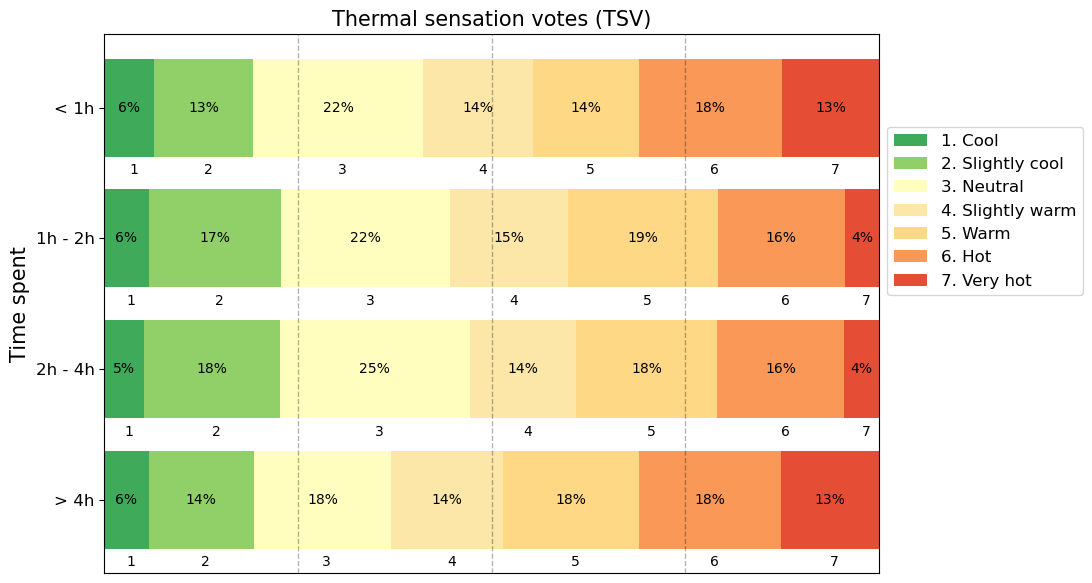

In [22]:
import matplotlib.pyplot as plt
import numpy as np

category_names = ['1. Cool', '2. Slightly cool', '3. Neutral', '4. Slightly warm', '5. Warm', '6. Hot', '7. Very hot']
category_names_r = list(reversed(category_names))

results = {
    '< 1h': [24, 48, 82, 53, 51, 69, 47],
    '1h - 2h': [27, 80, 103, 71, 91, 77, 21],
    '2h - 4h': [24, 82, 115, 64, 85, 77, 21],
    '> 4h': [26, 61, 80, 65, 79, 83, 57],}

list_keys=[]
list_values_r=[]
for key in results:
    list_keys.append(key)
    list_values_r.append(list(reversed(results[key])))
    
results_r = dict(zip(list_keys, list_values_r))


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    
    total_votes_per_age = np.sum(data,axis=1)
    new_data = ((data.transpose()/total_votes_per_age)*100).transpose()
    #print(new_data)
    #new_data = np.matrix.round(new_data, 2)
    
    data_cum = new_data.cumsum(axis=1)
    category_colors = plt.colormaps['RdYlGn_r'](np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(10, 7))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(new_data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        
        if i==2:
            new_color = category_colors[3]
        elif i==3:
            new_color =  np.array([0.98746328, 0.9067397, 0.65926182, 1.])
        else:
            new_color=color
            
        data_text = data[:, i]
        widths = new_data[:, i]
        starts = data_cum[:, i] - widths
        
        
        
        rects = ax.barh(labels, widths, left=starts, height=0.75,
                        label=colname, color=new_color)

        r, g, b, _ = color
        text_color = 'black' if r * g * b < 0.5 else 'black'
        ax.bar_label(rects, label_type='center', fmt = '%.0f%%', color=text_color)
        
        if i==0:
            plt.text(x = (data_cum[0][i])/2, y = 0.51, s=str(i+1))
            plt.text(x = (data_cum[1][i])/2, y = 1.51, s=str(i+1))
            plt.text(x = (data_cum[2][i])/2, y = 2.51, s=str(i+1))
            plt.text(x = (data_cum[3][i])/2, y = 3.51, s=str(i+1))

        else:
            plt.text(x = data_cum[0][i-1]+((data_cum[0][i]-data_cum[0][i-1])/2), y = 0.51, s=str(i+1))
            plt.text(x = data_cum[1][i-1]+((data_cum[1][i]-data_cum[1][i-1])/2), y = 1.51, s=str(i+1))
            plt.text(x = data_cum[2][i-1]+((data_cum[2][i]-data_cum[2][i-1])/2), y = 2.51, s=str(i+1))
            plt.text(x = data_cum[3][i-1]+((data_cum[3][i]-data_cum[3][i-1])/2), y = 3.51, s=str(i+1))
            
            
    # Plot quartile dotted lines
    ax.axvline(x=25, ymin=0, ymax=1, alpha = 0.3, ls = '--', lw=1, c='black')
    ax.axvline(x=50, ymin=0, ymax=1, alpha = 0.3, ls = '--', lw=1, c='black')
    ax.axvline(x=75, ymin=0, ymax=1, alpha = 0.3, ls = '--', lw=1, c='black')  
    
    ax.legend(ncols=1, bbox_to_anchor=(1, 0.5),
              loc='lower left', fontsize='large')
    
    ax.set_ylabel('Time spent',fontsize=15)
    ax.tick_params(labelsize=12)
    ax.set_title('Thermal sensation votes (TSV)',fontsize=15)
    
    return fig, ax


fig, ax = survey(results, category_names)
plt.show()


### 2.4. Neighborhood knowledge

#### 2.4.1. Statistics

In [23]:
columns = ['thermal_confort', 'thermal_confort_walking', 'thermal_sensation']

for column in columns:
    print('################')
    print(column)
    print('################')
    print('')
    for i,j in all_vots_processed_gender.groupby(['neighbourhood_knowledge2']):

        print(i[0])
        print('-------')
        print(j[column].value_counts())
        #print(j[column].value_counts(normalize=True).mul(100).round(1))
        print('')
        
    print('')
    print('')
    

################
thermal_confort
################

Bo
-------
thermal_confort
Neutre                   140
Lleugerament incòmode    103
Lleugerament còmode       88
Còmode                    79
Incòmode                  59
Molt còmode               23
Molt incòmode             21
Name: count, dtype: int64

Mitjà
-------
thermal_confort
Neutre                   104
Còmode                    71
Lleugerament còmode       62
Lleugerament incòmode     57
Incòmode                  45
Molt incòmode             24
Molt còmode               18
Name: count, dtype: int64

Molt bo
-------
thermal_confort
Neutre                   163
Còmode                   112
Lleugerament còmode       93
Lleugerament incòmode     72
Incòmode                  55
Molt còmode               52
Molt incòmode             40
Name: count, dtype: int64

No/Parcial
-------
thermal_confort
Neutre                   94
Lleugerament incòmode    59
Còmode                   47
Incòmode                 39
Lleugerament còmode    

#### 2.4.2. Histograms

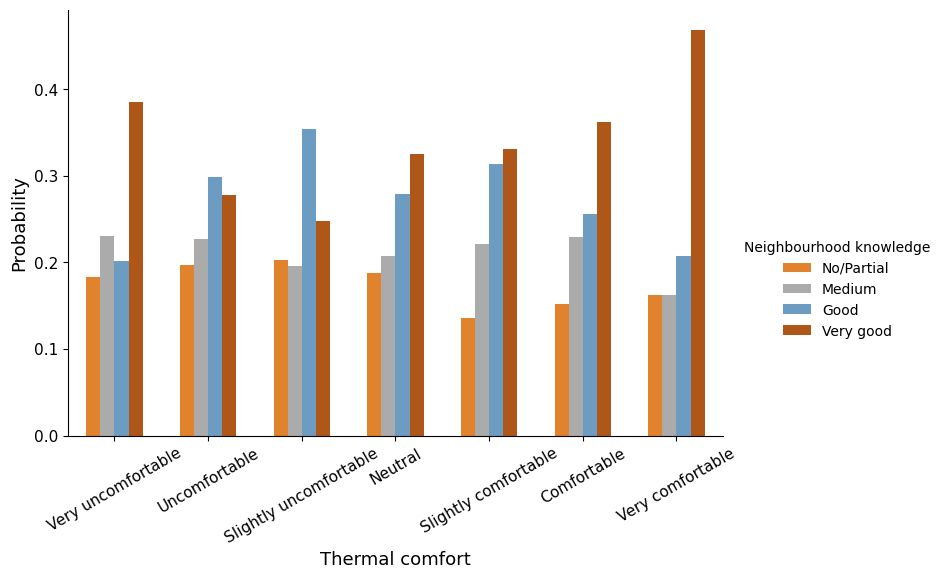

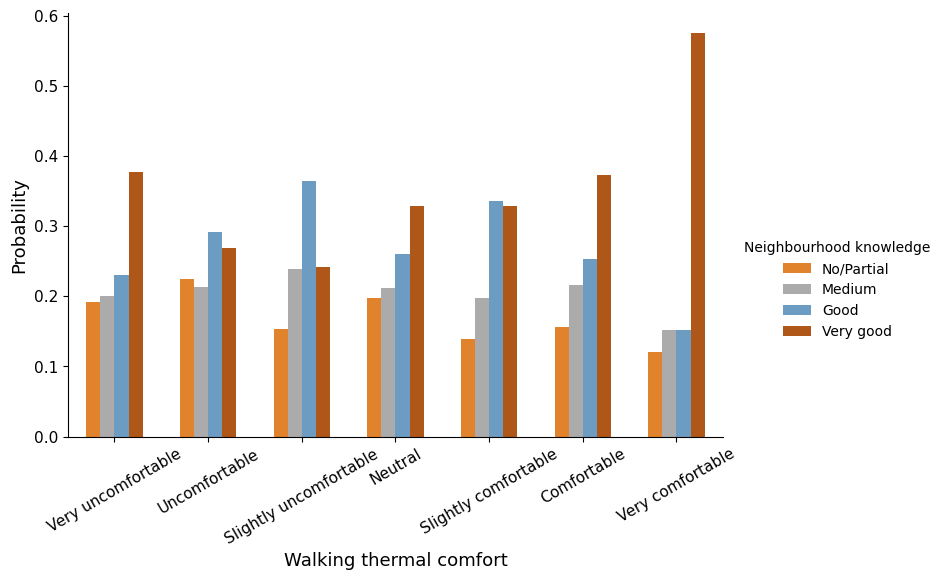

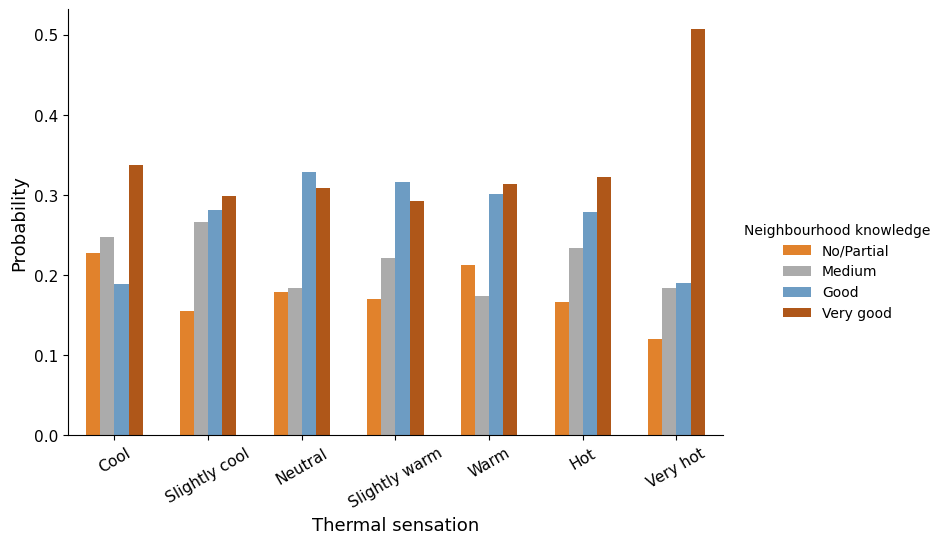

In [24]:
# Thermal confort vs neighbourhood knowledge

x,y = 'thermal_confort', 'neighbourhood_knowledge2'

vots_neigh_norm = all_vots_processed_gender.groupby(x)[y].value_counts(normalize=True).reset_index()


vots_neigh_norm.thermal_confort = pd.Categorical(values=vots_neigh_norm.thermal_confort, categories=['Molt incòmode', 'Incòmode', 'Lleugerament incòmode', 'Neutre','Lleugerament còmode','Còmode','Molt còmode']) ## Set the order for the column as you want
vots_neigh_norm.sort_values(['thermal_confort'], inplace=True) # Sort the column


g = sns.catplot(x=x,y='proportion',hue=y,kind='bar',data=vots_neigh_norm, palette=["#FF800E", "#ABABAB","#5F9ED1","#C85200"],
                alpha=1.,hue_order=['No/Parcial','Mitjà','Bo','Molt bo'],width=0.6, height=5, aspect=1.5).set(xlabel='Thermal comfort', ylabel='Probability')  ## and plot

plt.xticks(rotation=30, fontsize=11)
plt.yticks(rotation=0, fontsize=11)

g.set_xticklabels(['Very uncomfortable', 'Uncomfortable', 'Slightly uncomfortable', 'Neutral', 'Slightly comfortable', 
                   'Comfortable', 'Very comfortable'])

# Now change the hue (legend) title
g._legend.set_title('Neighbourhood knowledge')

# replace labels
new_labels = ['No/Partial', 'Medium', 'Good', 'Very good']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)
    
# Size of the labels
g.set_axis_labels('Thermal comfort', 'Probability', fontsize=13)
    
plt.show()




############################################################################################3
# Walking thermal confort vs neighbourhood knowledge


x,y = 'thermal_confort_walking', 'neighbourhood_knowledge2'

vots_neigh_norm = all_vots_processed_gender.groupby(x)[y].value_counts(normalize=True).reset_index()


vots_neigh_norm.thermal_confort_walking = pd.Categorical(values=vots_neigh_norm.thermal_confort_walking, categories=['Molt incòmode', 'Incòmode', 'Lleugerament incòmode', 'Neutre','Lleugerament còmode','Còmode','Molt còmode']) ## Set the order for the column as you want
vots_neigh_norm.sort_values(['thermal_confort_walking'], inplace=True) # Sort the column


g = sns.catplot(x=x,y='proportion',hue=y,kind='bar',data=vots_neigh_norm, palette=["#FF800E", "#ABABAB","#5F9ED1","#C85200"],
                alpha=1.,hue_order=['No/Parcial','Mitjà','Bo','Molt bo'],width=0.6, height=5, aspect=1.5).set(xlabel='Walking thermal comfort', ylabel='Probability')  ## and plot

plt.xticks(rotation=30, fontsize=11)
plt.yticks(rotation=0, fontsize=11)

g.set_xticklabels(['Very uncomfortable', 'Uncomfortable', 'Slightly uncomfortable', 'Neutral', 'Slightly comfortable', 
                   'Comfortable', 'Very comfortable'])

# Now change the hue (legend) title
g._legend.set_title('Neighbourhood knowledge')

# replace labels
new_labels = ['No/Partial', 'Medium', 'Good', 'Very good']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)
    
# Size of the labels
g.set_axis_labels('Walking thermal comfort', 'Probability', fontsize=13)

plt.show()






############################################################################################3
# Thermal sensation vs neighbourhood knowledge

x,y = 'thermal_sensation', 'neighbourhood_knowledge2'

vots_neigh_norm = all_vots_processed_gender.groupby(x)[y].value_counts(normalize=True).reset_index()


vots_neigh_norm.thermal_sensation = pd.Categorical(values=vots_neigh_norm.thermal_sensation, categories=['Fresc', 'Lleugerament fresc', 'Neutre', 'Lleugerament càlid','Càlid','Calorós','Molt calorós']) ## Set the order for the column as you want
vots_neigh_norm.sort_values(['thermal_sensation'], inplace=True) # Sort the column


g = sns.catplot(x=x,y='proportion',hue=y,kind='bar',data=vots_neigh_norm, palette=["#FF800E", "#ABABAB","#5F9ED1","#C85200"],
                alpha=1.,hue_order=['No/Parcial','Mitjà','Bo','Molt bo'],width=0.6, height=5, aspect=1.5).set(xlabel='Thermal sensation', ylabel='Probability')  ## and plot

plt.xticks(rotation=30, fontsize=11)
plt.yticks(rotation=0, fontsize=11)

g.set_xticklabels(['Cool', 'Slightly cool', 'Neutral', 'Slightly warm', 'Warm', 'Hot', 'Very hot'])

# Now change the hue (legend) title
g._legend.set_title('Neighbourhood knowledge')

# replace labels
new_labels = ['No/Partial', 'Medium', 'Good', 'Very good']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)
    
# Size of the labels
g.set_axis_labels('Thermal sensation', 'Probability', fontsize=13)
    
plt.show()



#### 2.4.3. Horizontal bar-plots
**Thermal comfort**

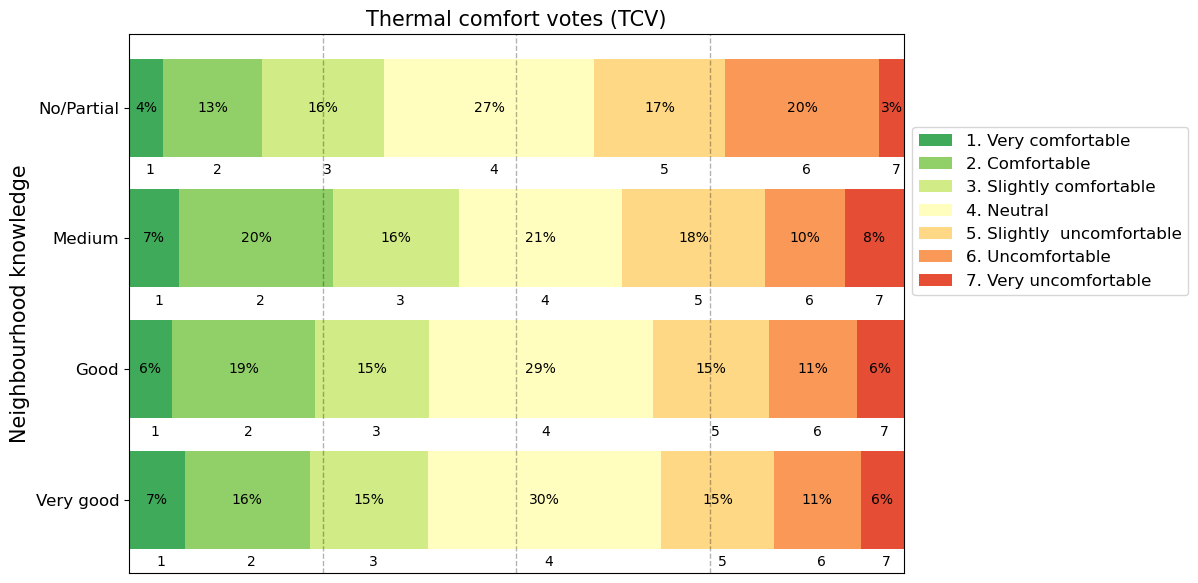

In [25]:
import matplotlib.pyplot as plt
import numpy as np

category_names = ['7. Very uncomfortable', '6. Uncomfortable', '5. Slightly  uncomfortable', '4. Neutral', 
                  '3. Slightly comfortable', '2. Comfortable', '1. Very comfortable']
category_names_r = list(reversed(category_names))

results = {
    'No/Partial': [11, 68, 58, 93, 54, 44, 15],
    'Medium': [28, 38, 68, 78, 60, 73, 24 ],
    'Good': [31, 57, 76, 147, 74, 94, 28],
    'Very good': [34, 68, 89, 183, 93, 98, 44],}

list_keys=[]
list_values_r=[]
for key in results:
    list_keys.append(key)
    list_values_r.append(list(reversed(results[key])))
    
results_r = dict(zip(list_keys, list_values_r))


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    
    total_votes_per_age = np.sum(data,axis=1)
    new_data = ((data.transpose()/total_votes_per_age)*100).transpose()
    #print(new_data)
    #new_data = np.matrix.round(new_data, 2)
    
    data_cum = new_data.cumsum(axis=1)
    category_colors = plt.colormaps['RdYlGn_r'](np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(10, 7))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(new_data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        data_text = data[:, i]
        widths = new_data[:, i]
        starts = data_cum[:, i] - widths
        
        
        
        rects = ax.barh(labels, widths, left=starts, height=0.75,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'black' if r * g * b < 0.5 else 'black'
        ax.bar_label(rects, label_type='center', fmt = '%.0f%%', color=text_color)
        
        if i==0:
            plt.text(x = (data_cum[0][i])/2, y = 0.51, s=str(i+1))
            plt.text(x = (data_cum[1][i])/2, y = 1.51, s=str(i+1))
            plt.text(x = (data_cum[2][i])/2, y = 2.51, s=str(i+1))
            plt.text(x = (data_cum[3][i])/2, y = 3.51, s=str(i+1))

        else:
            plt.text(x = data_cum[0][i-1]+((data_cum[0][i]-data_cum[0][i-1])/2), y = 0.51, s=str(i+1))
            plt.text(x = data_cum[1][i-1]+((data_cum[1][i]-data_cum[1][i-1])/2), y = 1.51, s=str(i+1))
            plt.text(x = data_cum[2][i-1]+((data_cum[2][i]-data_cum[2][i-1])/2), y = 2.51, s=str(i+1))
            plt.text(x = data_cum[3][i-1]+((data_cum[3][i]-data_cum[3][i-1])/2), y = 3.51, s=str(i+1))
            
            
    # Plot quartile dotted lines
    ax.axvline(x=25, ymin=0, ymax=1, alpha = 0.3, ls = '--', lw=1, c='black')
    ax.axvline(x=50, ymin=0, ymax=1, alpha = 0.3, ls = '--', lw=1, c='black')
    ax.axvline(x=75, ymin=0, ymax=1, alpha = 0.3, ls = '--', lw=1, c='black') 
    
    ax.legend(ncols=1, bbox_to_anchor=(1, 0.5),
              loc='lower left', fontsize='large')
    
    ax.set_ylabel('Neighbourhood knowledge',fontsize=15)
    ax.tick_params(labelsize=12)
    ax.set_title('Thermal comfort votes (TCV)',fontsize=15)
    
    return fig, ax


fig, ax = survey(results_r, category_names_r)
plt.show()


**Walking thermal comfort**

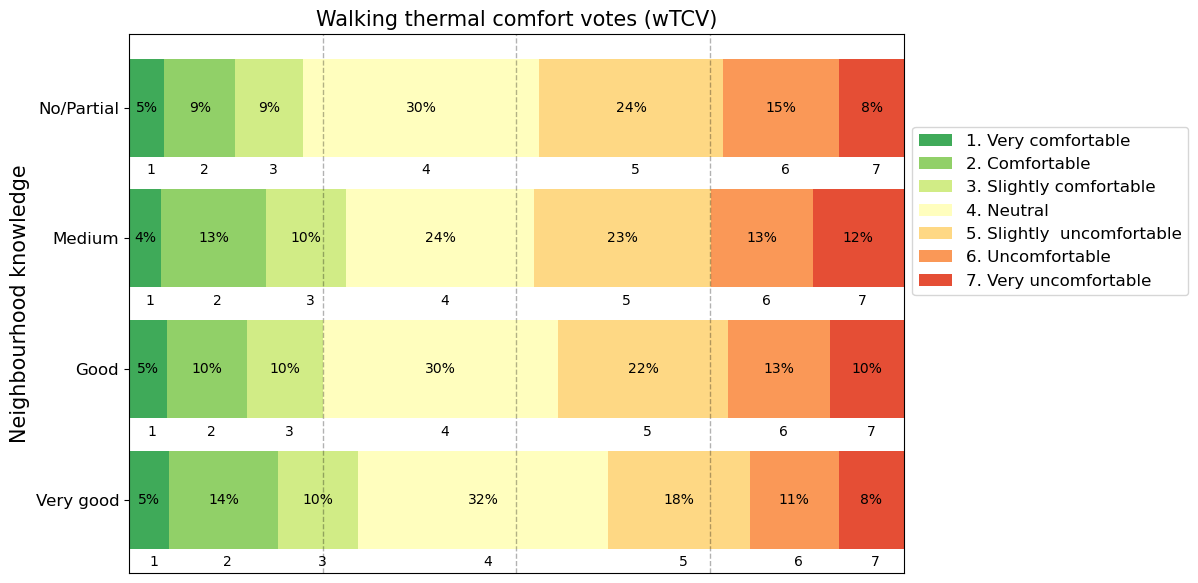

In [26]:
import matplotlib.pyplot as plt
import numpy as np

category_names = ['7. Very uncomfortable', '6. Uncomfortable', '5. Slightly  uncomfortable', '4. Neutral', 
                  '3. Slightly comfortable', '2. Comfortable', '1. Very comfortable']
category_names_r = list(reversed(category_names))

results = {
    'No/Partial': [20, 36, 57, 73, 21, 22, 11],
    'Medium': [34, 38, 66, 70, 30, 39, 12],
    'Good': [37, 51, 85, 118, 38, 40, 19],
    'Very good': [39, 53, 85, 149, 48, 65, 24],}

list_keys=[]
list_values_r=[]
for key in results:
    list_keys.append(key)
    list_values_r.append(list(reversed(results[key])))
    
results_r = dict(zip(list_keys, list_values_r))


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    
    total_votes_per_age = np.sum(data,axis=1)
    new_data = ((data.transpose()/total_votes_per_age)*100).transpose()
    #print(new_data)
    #new_data = np.matrix.round(new_data, 2)
    
    data_cum = new_data.cumsum(axis=1)
    category_colors = plt.colormaps['RdYlGn_r'](np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(10, 7))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(new_data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        data_text = data[:, i]
        widths = new_data[:, i]
        starts = data_cum[:, i] - widths
        
        
        
        rects = ax.barh(labels, widths, left=starts, height=0.75,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'black' if r * g * b < 0.5 else 'black'
        ax.bar_label(rects, label_type='center', fmt = '%.0f%%', color=text_color)

        if i==0:
            plt.text(x = (data_cum[0][i])/2, y = 0.51, s=str(i+1))
            plt.text(x = (data_cum[1][i])/2, y = 1.51, s=str(i+1))
            plt.text(x = (data_cum[2][i])/2, y = 2.51, s=str(i+1))
            plt.text(x = (data_cum[3][i])/2, y = 3.51, s=str(i+1))

        else:
            plt.text(x = data_cum[0][i-1]+((data_cum[0][i]-data_cum[0][i-1])/2), y = 0.51, s=str(i+1))
            plt.text(x = data_cum[1][i-1]+((data_cum[1][i]-data_cum[1][i-1])/2), y = 1.51, s=str(i+1))
            plt.text(x = data_cum[2][i-1]+((data_cum[2][i]-data_cum[2][i-1])/2), y = 2.51, s=str(i+1))
            plt.text(x = data_cum[3][i-1]+((data_cum[3][i]-data_cum[3][i-1])/2), y = 3.51, s=str(i+1))
            
            
    # Plot quartile dotted lines
    ax.axvline(x=25, ymin=0, ymax=1, alpha = 0.3, ls = '--', lw=1, c='black')
    ax.axvline(x=50, ymin=0, ymax=1, alpha = 0.3, ls = '--', lw=1, c='black')
    ax.axvline(x=75, ymin=0, ymax=1, alpha = 0.3, ls = '--', lw=1, c='black')      
        
    ax.legend(ncols=1, bbox_to_anchor=(1, 0.5),
              loc='lower left', fontsize='large')
    
    ax.set_ylabel('Neighbourhood knowledge',fontsize=15)
    ax.tick_params(labelsize=12)
    ax.set_title('Walking thermal comfort votes (wTCV)',fontsize=15)
    
    return fig, ax


fig, ax = survey(results_r, category_names_r)
plt.show()


**Thermal sensation**

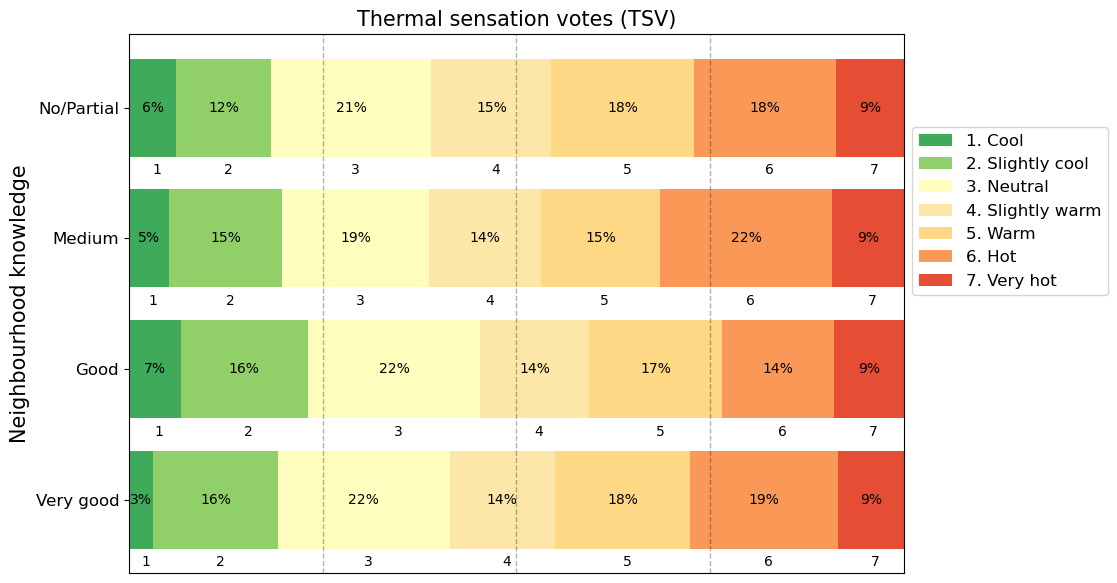

In [27]:
import matplotlib.pyplot as plt
import numpy as np

category_names = ['1. Cool', '2. Slightly cool', '3. Neutral', '4. Slightly warm', '5. Warm', '6. Hot', '7. Very hot']
category_names_r = list(reversed(category_names))

results = {
    'No/Partial': [19, 38, 64, 48, 57, 57, 27],
    'Medium': [19, 54, 70, 53, 57, 82, 34],
    'Good': [34, 83, 113, 71, 87, 73, 46],
    'Very good': [19, 96, 133, 81, 105, 114, 51],}

list_keys=[]
list_values_r=[]
for key in results:
    list_keys.append(key)
    list_values_r.append(list(reversed(results[key])))
    
results_r = dict(zip(list_keys, list_values_r))


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    
    total_votes_per_age = np.sum(data,axis=1)
    new_data = ((data.transpose()/total_votes_per_age)*100).transpose()
    #print(new_data)
    #new_data = np.matrix.round(new_data, 2)
    
    data_cum = new_data.cumsum(axis=1)
    category_colors = plt.colormaps['RdYlGn_r'](np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(10, 7))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(new_data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        
        if i==2:
            new_color = category_colors[3]
        elif i==3:
            new_color =  np.array([0.98746328, 0.9067397, 0.65926182, 1.])
        else:
            new_color=color
            
        data_text = data[:, i]
        widths = new_data[:, i]
        starts = data_cum[:, i] - widths
        
        
        
        rects = ax.barh(labels, widths, left=starts, height=0.75,
                        label=colname, color=new_color)

        r, g, b, _ = color
        text_color = 'black' if r * g * b < 0.5 else 'black'
        ax.bar_label(rects, label_type='center', fmt = '%.0f%%', color=text_color)
        
        if i==0:
            plt.text(x = (data_cum[0][i])/2, y = 0.51, s=str(i+1))
            plt.text(x = (data_cum[1][i])/2, y = 1.51, s=str(i+1))
            plt.text(x = (data_cum[2][i])/2, y = 2.51, s=str(i+1))
            plt.text(x = (data_cum[3][i])/2, y = 3.51, s=str(i+1))

        else:
            plt.text(x = data_cum[0][i-1]+((data_cum[0][i]-data_cum[0][i-1])/2), y = 0.51, s=str(i+1))
            plt.text(x = data_cum[1][i-1]+((data_cum[1][i]-data_cum[1][i-1])/2), y = 1.51, s=str(i+1))
            plt.text(x = data_cum[2][i-1]+((data_cum[2][i]-data_cum[2][i-1])/2), y = 2.51, s=str(i+1))
            plt.text(x = data_cum[3][i-1]+((data_cum[3][i]-data_cum[3][i-1])/2), y = 3.51, s=str(i+1))
            
            
    # Plot quartile dotted lines
    ax.axvline(x=25, ymin=0, ymax=1, alpha = 0.3, ls = '--', lw=1, c='black')
    ax.axvline(x=50, ymin=0, ymax=1, alpha = 0.3, ls = '--', lw=1, c='black')
    ax.axvline(x=75, ymin=0, ymax=1, alpha = 0.3, ls = '--', lw=1, c='black')      
        
    ax.legend(ncols=1, bbox_to_anchor=(1, 0.5),
              loc='lower left', fontsize='large')
    
    ax.set_ylabel('Neighbourhood knowledge',fontsize=15)
    ax.tick_params(labelsize=12)
    ax.set_title('Thermal sensation votes (TSV)',fontsize=15)
    
    return fig, ax


fig, ax = survey(results, category_names)
plt.show()


<br>

## 3. TCV/TSV and wTCV for different space categories

In order to study how the votes are distributed across the different space categories, we need to merge both data sets (stops and votes). We use the "space_code" to merge, which is common in both data-sets. The new data-set contains all the ~2000 votes but with a new column called "space_category", which indicates de category of each stop. 

Note that the data-set "votes" contains all the votes. Therefore, a given place (stop) and therefore its category, can be repeated many times.

In [28]:
all_votes_processed_merged = pd.merge(all_votes_processed,stops[['space_code','space_category']],on='space_code')
#all_votes_processed_merged

### 3.1. Statistics 

Using the dataset stops (in order to know how many stops correspond to each category, understanding the stop as an individual place). 

In [29]:
print('Using the 210 stops, this is the distribution of space category:')

print(stops['space_category'].value_counts())
print('')
print('--------------------------------------')
print('')
print(stops['space_category'].value_counts(normalize=True).mul(100).round(1))

Using the 210 stops, this is the distribution of space category:
space_category
LLT    57
E      43
C      31
D      30
ET     21
T       9
EE      8
S       6
M       5
Name: count, dtype: int64

--------------------------------------

space_category
LLT    27.1
E      20.5
C      14.8
D      14.3
ET     10.0
T       4.3
EE      3.8
S       2.9
M       2.4
Name: proportion, dtype: float64


Using the votes, so a single stop/place is repetead many times

In [30]:
print('Using the 1867 votes, this is the distribution of space category:')

print(all_votes_processed_merged['space_category'].value_counts())
print('')
print('--------------------------------------')
print('')
print(all_votes_processed_merged['space_category'].value_counts(normalize=True).mul(100).round(1))

Using the 1867 votes, this is the distribution of space category:
space_category
LLT    481
E      401
D      264
C      258
ET     190
EE      81
T       76
S       62
M       54
Name: count, dtype: int64

--------------------------------------

space_category
LLT    25.8
E      21.5
D      14.1
C      13.8
ET     10.2
EE      4.3
T       4.1
S       3.3
M       2.9
Name: proportion, dtype: float64


### 3.2. Histograms

Using the votes and using the stops

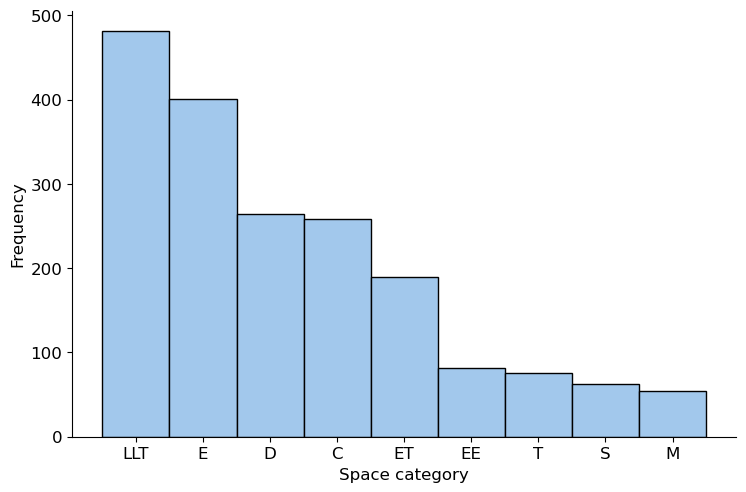

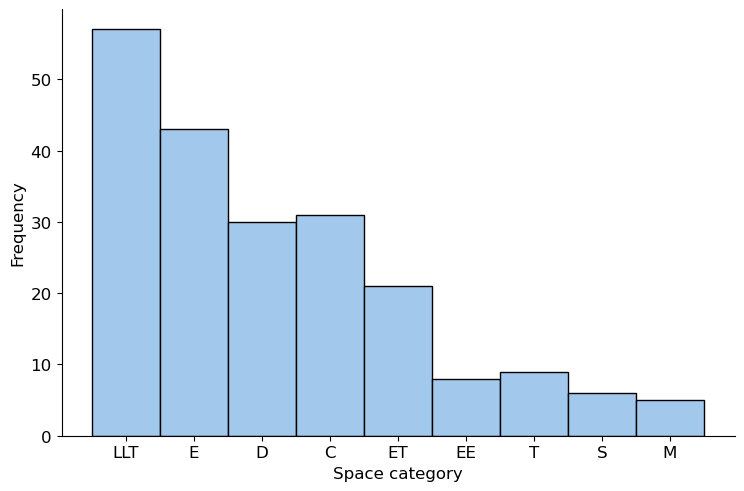

In [31]:
# USING THE VOTES

all_votes_processed_merged2 = all_votes_processed_merged.copy()

all_votes_processed_merged2.space_category = pd.Categorical(values=all_votes_processed_merged2.space_category, categories=['LLT', 'E', 'D', 'C','ET','EE','T','S','M']) ## Set the order for the column as you want
all_votes_processed_merged2.sort_values(['space_category'], inplace=True) ## Sort the column
ax = sns.displot(data = all_votes_processed_merged2, x = 'space_category', facecolor='#A2C8EC', edgecolor='black',
            height=5, aspect=1.5).set(xlabel='Space category', ylabel='Frequency')  ## and plot

plt.xticks(rotation=0, fontsize=12)
plt.yticks(rotation=0, fontsize=12)

ax.set_xticklabels(['LLT', 'E', 'D', 'C','ET','EE','T','S','M'])

# Size of the labels
ax.set_axis_labels('Space category', 'Frequency', fontsize=12)

plt.show()
print('')
print('')



#######################################################
# USING THE STOPS

stops2 = stops.copy()

stops2.space_category = pd.Categorical(values=stops2.space_category, categories=['LLT', 'E', 'D', 'C','ET','EE','T','S','M']) ## Set the order for the column as you want
stops2.sort_values(['space_category'], inplace=True) ## Sort the column
ax = sns.displot(data = stops2, x = 'space_category', facecolor='#A2C8EC', edgecolor='black',
            height=5, aspect=1.5).set(xlabel='Space category', ylabel='Frequency')  ## and plot

plt.xticks(rotation=0, fontsize=12)
plt.yticks(rotation=0, fontsize=12)

ax.set_xticklabels(['LLT', 'E', 'D', 'C','ET','EE','T','S','M'])

# Size of the labels
ax.set_axis_labels('Space category', 'Frequency', fontsize=12)

plt.show()





###  3.3. Taking into account the space category 2

Some of the places were also labelled with a "secondary" category. Mainly, these are parks and squares which can be either "rest" or "meeting" places. We also study the distribution of the votes through all the categories taking into account the secondary category.

To do that, we merge both columns "space_category" and "space_category2", and then we melt both columns into new rows. That is, if a "vote" has two categories, then we create a repeated vote with the other category. Therefore the number of votes is increased x2 (3734 now)


In [32]:
print(stops['space_category2'].value_counts())

space_category2
D      75
LLT    39
ET      1
Name: count, dtype: int64


In [33]:
# Merge stops and votes (with category and category2 of the place)
all_votes_processed_merged_category2 = pd.merge(all_votes_processed,stops[['space_code','space_category','space_category2']],on='space_code')

# List of columns (extracting the category of the place)
lista = list(all_votes_processed_merged_category2.columns)
lista_new = lista[:-2]
lista_new

# Melt the two columns (space category and space category2, into new rows)
all_votes_processed_merged_category2 = all_votes_processed_merged_category2.melt(id_vars=lista_new, 
                                                                                 value_vars= ['space_category', 'space_category2'])
# Drop "variable" column 
del all_votes_processed_merged_category2['variable']

# Change "value" name
all_votes_processed_merged_category2['space_category'] = all_votes_processed_merged_category2['value']
del all_votes_processed_merged_category2['value']

#all_votes_processed_merged_category2

#### 3.3.1. Statistics

In [34]:
print('Using the 3734 votes, this is the distribution of space category:')

print(all_votes_processed_merged_category2['space_category'].value_counts())
print('')
print('--------------------------------------')
print('')
print(all_votes_processed_merged_category2['space_category'].value_counts(normalize=True).mul(100).round(1))

Using the 3734 votes, this is the distribution of space category:
space_category
D      942
LLT    836
E      401
C      258
ET     196
EE      81
T       76
S       62
M       54
Name: count, dtype: int64

--------------------------------------

space_category
D      32.4
LLT    28.8
E      13.8
C       8.9
ET      6.7
EE      2.8
T       2.6
S       2.1
M       1.9
Name: proportion, dtype: float64


#### 3.3.2. Histogram

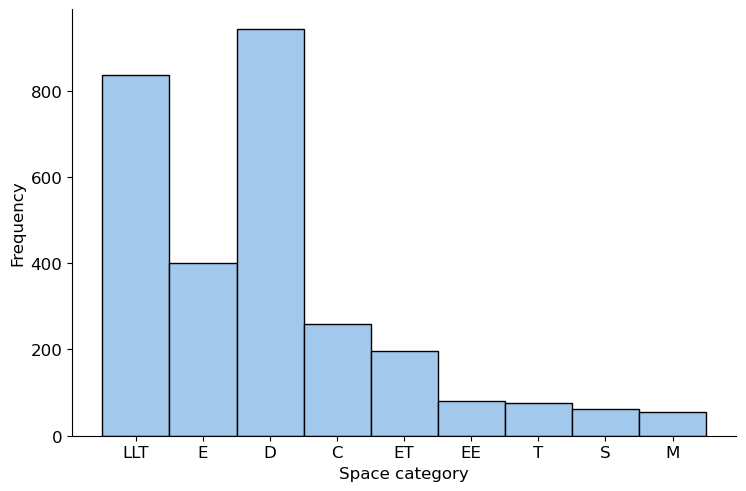

In [35]:
all_votes_processed_merged_category2_copy = all_votes_processed_merged_category2.copy()


all_votes_processed_merged_category2_copy.space_category = pd.Categorical(values=all_votes_processed_merged_category2_copy.space_category, categories=['LLT', 'E', 'D', 'C','ET','EE','T','S','M']) ## Set the order for the column as you want
all_votes_processed_merged_category2_copy.sort_values(['space_category'], inplace=True) ## Sort the column
ax = sns.displot(data = all_votes_processed_merged_category2_copy, x = 'space_category', facecolor='#A2C8EC', edgecolor='black',
            height=5, aspect=1.5).set(xlabel='Space category', ylabel='Frequency')  ## and plot

plt.xticks(rotation=0, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
ax.set_xticklabels(['LLT', 'E', 'D', 'C','ET','EE','T','S','M'])

# Size of the labels
ax.set_axis_labels('Space category', 'Frequency', fontsize=12)


plt.show()







### 3.4. Votes for each space category

Using the data-set with just the first category (so 1847 votes)
    
#### 3.4.1. Statistics

In [36]:
columns = ['thermal_confort','thermal_confort_walking','thermal_sensation']

for column in columns:
    print('-------')
    print(column)
    print('-------')
    print('')
    for i,j in all_votes_processed_merged2.groupby(['space_category']):
        print(i[0])
        print('--------')
        print(j[column].value_counts())
        print('')
        print('')
    
    print('#################################################################')
    print('#################################################################')

-------
thermal_confort
-------

LLT
--------
thermal_confort
Neutre                   142
Còmode                    75
Incòmode                  71
Lleugerament còmode       69
Lleugerament incòmode     65
Molt incòmode             36
Molt còmode               23
Name: count, dtype: int64


E
--------
thermal_confort
Neutre                   104
Lleugerament còmode       80
Còmode                    70
Lleugerament incòmode     60
Incòmode                  38
Molt còmode               27
Molt incòmode             22
Name: count, dtype: int64


D
--------
thermal_confort
Neutre                   84
Còmode                   52
Lleugerament incòmode    45
Lleugerament còmode      42
Incòmode                 17
Molt còmode              16
Molt incòmode             8
Name: count, dtype: int64


C
--------
thermal_confort
Neutre                   78
Còmode                   49
Lleugerament còmode      38
Lleugerament incòmode    36
Incòmode                 22
Molt còmode              21
Mol

#### 3.4.2. Horizontal bar-plots

**Thermal comfort**

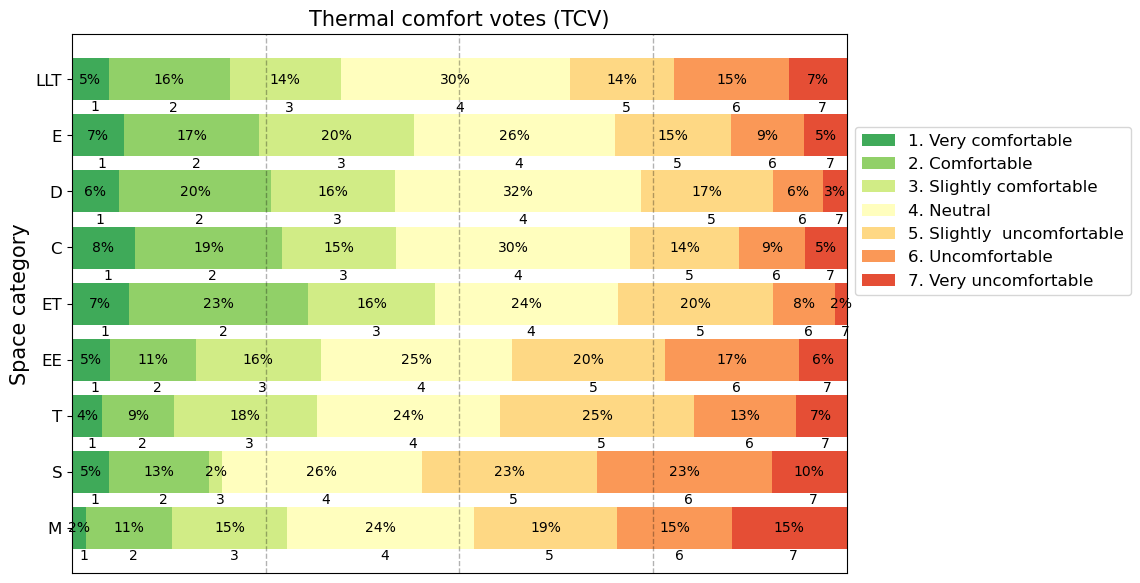

In [37]:
import matplotlib.pyplot as plt
import numpy as np

category_names = ['7. Very uncomfortable', '6. Uncomfortable', '5. Slightly  uncomfortable', '4. Neutral', 
                  '3. Slightly comfortable', '2. Comfortable', '1. Very comfortable']
category_names_r = list(reversed(category_names))

results = {
    'LLT': [36,71,65,142,69,75,23],
    'E': [22,38,60,104,80,70,27],
    'D': [8,17,45,84,42,52,16],
    'C': [14,22,36,78,38,49,21],
    'ET': [3,15,38,45,31,44,14],
    'EE': [5,14,16,20,13,9,4],
    'T': [5,10,19,18,14,7,3],
    'S': [6,14,14,16,1,8,3],
    'M': [8,8,10,13,8,6,1]}

list_keys=[]
list_values_r=[]
for key in results:
    list_keys.append(key)
    list_values_r.append(list(reversed(results[key])))
    
results_r = dict(zip(list_keys, list_values_r))


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    
    total_votes_per_age = np.sum(data,axis=1)
    new_data = ((data.transpose()/total_votes_per_age)*100).transpose()
    #print(new_data)
    #new_data = np.matrix.round(new_data, 2)
    
    data_cum = new_data.cumsum(axis=1)
    category_colors = plt.colormaps['RdYlGn_r'](np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(10, 7))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(new_data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        data_text = data[:, i]
        widths = new_data[:, i]
        starts = data_cum[:, i] - widths
        
        
        
        rects = ax.barh(labels, widths, left=starts, height=0.75,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'black' if r * g * b < 0.5 else 'black'
        ax.bar_label(rects, label_type='center', fmt = '%.0f%%', color=text_color)
        
        if i==0:
            plt.text(x = (data_cum[0][i])/2, y = 0.56, s=str(i+1))
            plt.text(x = (data_cum[1][i])/2, y = 1.57, s=str(i+1))
            plt.text(x = (data_cum[2][i])/2, y = 2.57, s=str(i+1))
            plt.text(x = (data_cum[3][i])/2, y = 3.57, s=str(i+1))
            plt.text(x = (data_cum[4][i])/2, y = 4.57, s=str(i+1))
            plt.text(x = (data_cum[5][i])/2, y = 5.57, s=str(i+1))
            plt.text(x = (data_cum[6][i])/2, y = 6.57, s=str(i+1))
            plt.text(x = (data_cum[7][i])/2, y = 7.57, s=str(i+1))
            plt.text(x = (data_cum[8][i])/2, y = 8.57, s=str(i+1))
            
        else:
            plt.text(x = data_cum[0][i-1]+((data_cum[0][i]-data_cum[0][i-1])/2), y = 0.57, s=str(i+1))
            plt.text(x = data_cum[1][i-1]+((data_cum[1][i]-data_cum[1][i-1])/2), y = 1.57, s=str(i+1))
            plt.text(x = data_cum[2][i-1]+((data_cum[2][i]-data_cum[2][i-1])/2), y = 2.57, s=str(i+1))
            plt.text(x = data_cum[3][i-1]+((data_cum[3][i]-data_cum[3][i-1])/2), y = 3.57, s=str(i+1))
            plt.text(x = data_cum[4][i-1]+((data_cum[4][i]-data_cum[4][i-1])/2), y = 4.57, s=str(i+1))
            plt.text(x = data_cum[5][i-1]+((data_cum[5][i]-data_cum[5][i-1])/2), y = 5.57, s=str(i+1))
            plt.text(x = data_cum[6][i-1]+((data_cum[6][i]-data_cum[6][i-1])/2), y = 6.57, s=str(i+1))
            plt.text(x = data_cum[7][i-1]+((data_cum[7][i]-data_cum[7][i-1])/2), y = 7.57, s=str(i+1))
            plt.text(x = data_cum[8][i-1]+((data_cum[8][i]-data_cum[8][i-1])/2), y = 8.57, s=str(i+1))

    # Plot quartile dotted lines
    ax.axvline(x=25, ymin=0, ymax=1, alpha = 0.3, ls = '--', lw=1, c='black')
    ax.axvline(x=50, ymin=0, ymax=1, alpha = 0.3, ls = '--', lw=1, c='black')
    ax.axvline(x=75, ymin=0, ymax=1, alpha = 0.3, ls = '--', lw=1, c='black')    
        
    ax.legend(ncols=1, bbox_to_anchor=(1, 0.5),
              loc='lower left', fontsize='large')
    
    ax.set_ylabel('Space category',fontsize=15)
    ax.tick_params(labelsize=12)
    ax.set_title('Thermal comfort votes (TCV)',fontsize=15)
    
    return fig, ax


fig, ax = survey(results_r, category_names_r)
plt.show()


**Walking thermal comfort**

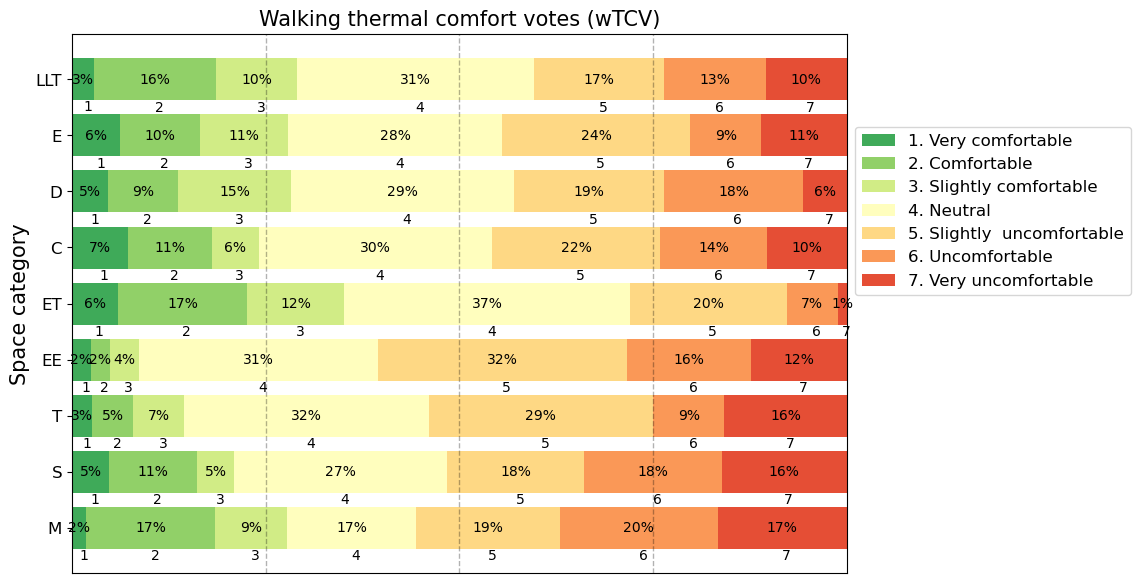

In [38]:
import matplotlib.pyplot as plt
import numpy as np

category_names = ['7. Very uncomfortable', '6. Uncomfortable', '5. Slightly  uncomfortable', '4. Neutral', 
                  '3. Slightly comfortable', '2. Comfortable', '1. Very comfortable']
category_names_r = list(reversed(category_names))

results = {
    'LLT': [36,45,58,105,36,54,10],
    'E': [30,25,66,75,31,28,17],
    'D': [12,38,41,61,31,19,10],
    'C': [17,23,36,50,10,18,12],
    'ET': [2,11,34,62,21,28,10],
    'EE': [10,13,26,25,3,2,2],
    'T': [12,7,22,24,5,4,2],
    'S': [10,11,11,17,3,7,3],
    'M': [9,11,10,9,5,9,1]}

list_keys=[]
list_values_r=[]
for key in results:
    list_keys.append(key)
    list_values_r.append(list(reversed(results[key])))
    
results_r = dict(zip(list_keys, list_values_r))


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    
    total_votes_per_age = np.sum(data,axis=1)
    new_data = ((data.transpose()/total_votes_per_age)*100).transpose()
    #print(new_data)
    #new_data = np.matrix.round(new_data, 2)
    
    data_cum = new_data.cumsum(axis=1)
    category_colors = plt.colormaps['RdYlGn_r'](np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(10, 7))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(new_data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        data_text = data[:, i]
        widths = new_data[:, i]
        starts = data_cum[:, i] - widths
        
        
        
        rects = ax.barh(labels, widths, left=starts, height=0.75,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'black' if r * g * b < 0.5 else 'black'
        ax.bar_label(rects, label_type='center', fmt = '%.0f%%', color=text_color)
        
        
        if i==0:
            plt.text(x = (data_cum[0][i])/2, y = 0.56, s=str(i+1))
            plt.text(x = (data_cum[1][i])/2, y = 1.57, s=str(i+1))
            plt.text(x = (data_cum[2][i])/2, y = 2.57, s=str(i+1))
            plt.text(x = (data_cum[3][i])/2, y = 3.57, s=str(i+1))
            plt.text(x = (data_cum[4][i])/2, y = 4.57, s=str(i+1))
            plt.text(x = (data_cum[5][i])/2, y = 5.57, s=str(i+1))
            plt.text(x = (data_cum[6][i])/2, y = 6.57, s=str(i+1))
            plt.text(x = (data_cum[7][i])/2, y = 7.57, s=str(i+1))
            plt.text(x = (data_cum[8][i])/2, y = 8.57, s=str(i+1))
            
        else:
            plt.text(x = data_cum[0][i-1]+((data_cum[0][i]-data_cum[0][i-1])/2), y = 0.57, s=str(i+1))
            plt.text(x = data_cum[1][i-1]+((data_cum[1][i]-data_cum[1][i-1])/2), y = 1.57, s=str(i+1))
            plt.text(x = data_cum[2][i-1]+((data_cum[2][i]-data_cum[2][i-1])/2), y = 2.57, s=str(i+1))
            plt.text(x = data_cum[3][i-1]+((data_cum[3][i]-data_cum[3][i-1])/2), y = 3.57, s=str(i+1))
            plt.text(x = data_cum[4][i-1]+((data_cum[4][i]-data_cum[4][i-1])/2), y = 4.57, s=str(i+1))
            plt.text(x = data_cum[5][i-1]+((data_cum[5][i]-data_cum[5][i-1])/2), y = 5.57, s=str(i+1))
            plt.text(x = data_cum[6][i-1]+((data_cum[6][i]-data_cum[6][i-1])/2), y = 6.57, s=str(i+1))
            plt.text(x = data_cum[7][i-1]+((data_cum[7][i]-data_cum[7][i-1])/2), y = 7.57, s=str(i+1))
            plt.text(x = data_cum[8][i-1]+((data_cum[8][i]-data_cum[8][i-1])/2), y = 8.57, s=str(i+1))

    # Plot quartile dotted lines
    ax.axvline(x=25, ymin=0, ymax=1, alpha = 0.3, ls = '--', lw=1, c='black')
    ax.axvline(x=50, ymin=0, ymax=1, alpha = 0.3, ls = '--', lw=1, c='black')
    ax.axvline(x=75, ymin=0, ymax=1, alpha = 0.3, ls = '--', lw=1, c='black')  
    
    ax.legend(ncols=1, bbox_to_anchor=(1, 0.5),
              loc='lower left', fontsize='large')
    
    ax.set_ylabel('Space category',fontsize=15)
    ax.tick_params(labelsize=12)
    ax.set_title('Walking thermal comfort votes (wTCV)',fontsize=15)
    
    return fig, ax


fig, ax = survey(results_r, category_names_r)
plt.show()


**Thermal sensation**

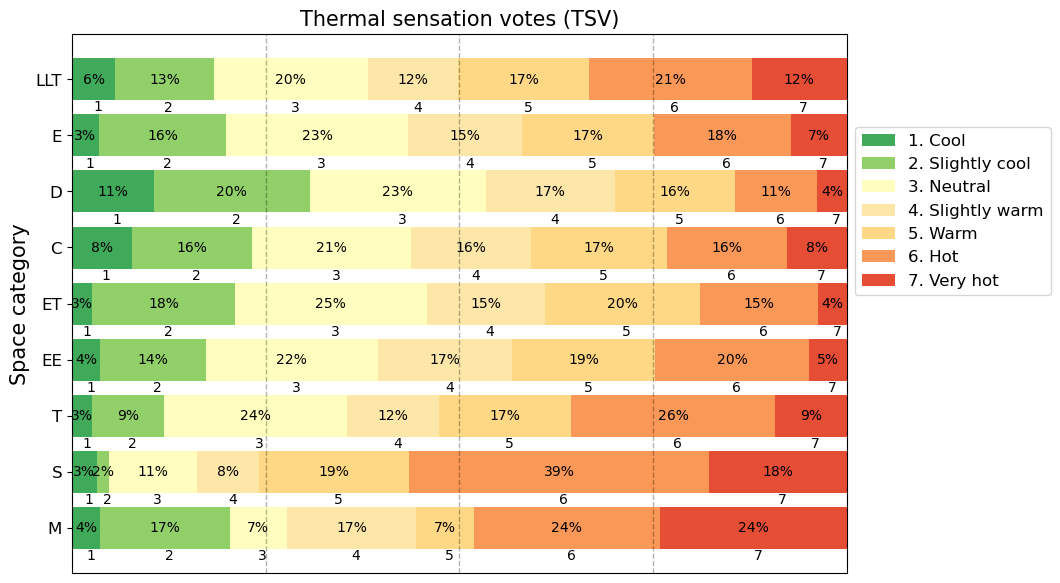

In [39]:
import matplotlib.pyplot as plt
import numpy as np

category_names = ['1. Cool', '2. Slightly cool', '3. Neutral', '4. Slightly warm', '5. Warm', '6. Hot', '7. Very hot']
category_names_r = list(reversed(category_names))

results = {
    'LLT': [27,61,96,56,81,101,59],
    'E': [14,66,94,59,68,71,29],
    'D': [28,53,60,44,41,28,10],
    'C': [20,40,53,40,45,40,20],
    'ET': [5,35,47,29,38,29,7],
    'EE': [3,11,18,14,15,16,4],
    'T': [2,7,18,9,13,20,7],
    'S': [2,1,7,5,12,24,11],
    'M': [2,9,4,9,4,13,13]}

list_keys=[]
list_values_r=[]
for key in results:
    list_keys.append(key)
    list_values_r.append(list(reversed(results[key])))
    
results_r = dict(zip(list_keys, list_values_r))


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    
    total_votes_per_age = np.sum(data,axis=1)
    new_data = ((data.transpose()/total_votes_per_age)*100).transpose()
    #print(new_data)
    #new_data = np.matrix.round(new_data, 2)
    
    data_cum = new_data.cumsum(axis=1)
    category_colors = plt.colormaps['RdYlGn_r'](np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(10, 7))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(new_data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        
        if i==2:
            new_color = category_colors[3]
        elif i==3:
            new_color =  np.array([0.98746328, 0.9067397, 0.65926182, 1.])
        else:
            new_color=color
            
        data_text = data[:, i]
        widths = new_data[:, i]
        starts = data_cum[:, i] - widths
        
        
        
        rects = ax.barh(labels, widths, left=starts, height=0.75,
                        label=colname, color=new_color)

        r, g, b, _ = color
        text_color = 'black' if r * g * b < 0.5 else 'black'
        ax.bar_label(rects, label_type='center', fmt = '%.0f%%', color=text_color)
        
        
        if i==0:
            plt.text(x = (data_cum[0][i])/2, y = 0.56, s=str(i+1))
            plt.text(x = (data_cum[1][i])/2, y = 1.57, s=str(i+1))
            plt.text(x = (data_cum[2][i])/2, y = 2.57, s=str(i+1))
            plt.text(x = (data_cum[3][i])/2, y = 3.57, s=str(i+1))
            plt.text(x = (data_cum[4][i])/2, y = 4.57, s=str(i+1))
            plt.text(x = (data_cum[5][i])/2, y = 5.57, s=str(i+1))
            plt.text(x = (data_cum[6][i])/2, y = 6.57, s=str(i+1))
            plt.text(x = (data_cum[7][i])/2, y = 7.57, s=str(i+1))
            plt.text(x = (data_cum[8][i])/2, y = 8.57, s=str(i+1))
            
        else:
            plt.text(x = data_cum[0][i-1]+((data_cum[0][i]-data_cum[0][i-1])/2), y = 0.57, s=str(i+1))
            plt.text(x = data_cum[1][i-1]+((data_cum[1][i]-data_cum[1][i-1])/2), y = 1.57, s=str(i+1))
            plt.text(x = data_cum[2][i-1]+((data_cum[2][i]-data_cum[2][i-1])/2), y = 2.57, s=str(i+1))
            plt.text(x = data_cum[3][i-1]+((data_cum[3][i]-data_cum[3][i-1])/2), y = 3.57, s=str(i+1))
            plt.text(x = data_cum[4][i-1]+((data_cum[4][i]-data_cum[4][i-1])/2), y = 4.57, s=str(i+1))
            plt.text(x = data_cum[5][i-1]+((data_cum[5][i]-data_cum[5][i-1])/2), y = 5.57, s=str(i+1))
            plt.text(x = data_cum[6][i-1]+((data_cum[6][i]-data_cum[6][i-1])/2), y = 6.57, s=str(i+1))
            plt.text(x = data_cum[7][i-1]+((data_cum[7][i]-data_cum[7][i-1])/2), y = 7.57, s=str(i+1))
            plt.text(x = data_cum[8][i-1]+((data_cum[8][i]-data_cum[8][i-1])/2), y = 8.57, s=str(i+1))

    # Plot quartile dotted lines
    ax.axvline(x=25, ymin=0, ymax=1, alpha = 0.3, ls = '--', lw=1, c='black')
    ax.axvline(x=50, ymin=0, ymax=1, alpha = 0.3, ls = '--', lw=1, c='black')
    ax.axvline(x=75, ymin=0, ymax=1, alpha = 0.3, ls = '--', lw=1, c='black') 
    ax.legend(ncols=1, bbox_to_anchor=(1, 0.5),
              loc='lower left', fontsize='large')
    
    ax.set_ylabel('Space category',fontsize=15)
    ax.tick_params(labelsize=12)
    ax.set_title('Thermal sensation votes (TSV)',fontsize=15)
    
    return fig, ax


fig, ax = survey(results, category_names)
plt.show()


### 3.5. Merging into two large groups

We merge the categories into two "large" groups. One corresponding to Basic Needs (health, education, transport, markets) together with transit places and the other one corresponding to wellness and free time (rest places, meeting places, sports equipment and cultural equipment).



In [40]:
all_votes_processed_merged2 = all_votes_processed_merged2.reset_index(drop=True)

merged_categories = []

for i in range(len(all_votes_processed_merged2)):
    
    if all_votes_processed_merged2['space_category'][i] == 'LLT':
        merged_categories.append('W')
        
    elif all_votes_processed_merged2['space_category'][i] == 'D':
        merged_categories.append('W')
        
    elif all_votes_processed_merged2['space_category'][i] == 'EE':
        merged_categories.append('W')
        
    elif all_votes_processed_merged2['space_category'][i] == 'C':
        merged_categories.append('W')
        
    elif all_votes_processed_merged2['space_category'][i] == 'ET':
        merged_categories.append('W')
        
    else:
        merged_categories.append('BN')
        
        
all_votes_processed_merged2['merged_space_category'] = merged_categories


In [41]:
print(all_votes_processed_merged2['merged_space_category'].value_counts())
print('-------------------')
print('')
print(all_votes_processed_merged2['merged_space_category'].value_counts(normalize=True).mul(100).round(1))

merged_space_category
W     1274
BN     593
Name: count, dtype: int64
-------------------

merged_space_category
W     68.2
BN    31.8
Name: proportion, dtype: float64


####          3.5.1. Statistics votes for each big group

         

In [42]:
columns = ['thermal_confort','thermal_confort_walking','thermal_sensation']

for column in columns:
    print('-------')
    print(column)
    print('-------')
    print('')
    for i,j in all_votes_processed_merged2.groupby(['merged_space_category']):
        print(i[0])
        print('--------')
        print(j[column].value_counts())
        #print(j[column].value_counts(normalize=True).mul(100).round(1))
        print('')
        print('')
    
    print('#################################################################')
    print('#################################################################')

-------
thermal_confort
-------

BN
--------
thermal_confort
Neutre                   151
Lleugerament còmode      103
Lleugerament incòmode    103
Còmode                    91
Incòmode                  70
Molt incòmode             41
Molt còmode               34
Name: count, dtype: int64


W
--------
thermal_confort
Neutre                   369
Còmode                   229
Lleugerament incòmode    200
Lleugerament còmode      193
Incòmode                 139
Molt còmode               78
Molt incòmode             66
Name: count, dtype: int64


#################################################################
#################################################################
-------
thermal_confort_walking
-------

BN
--------
thermal_confort_walking
Neutre                   125
Lleugerament incòmode    109
Molt incòmode             61
Incòmode                  54
Còmode                    48
Lleugerament còmode       44
Molt còmode               23
Name: count, dtype: int64


W
--------

####             3.5.2. Histograms for each big group

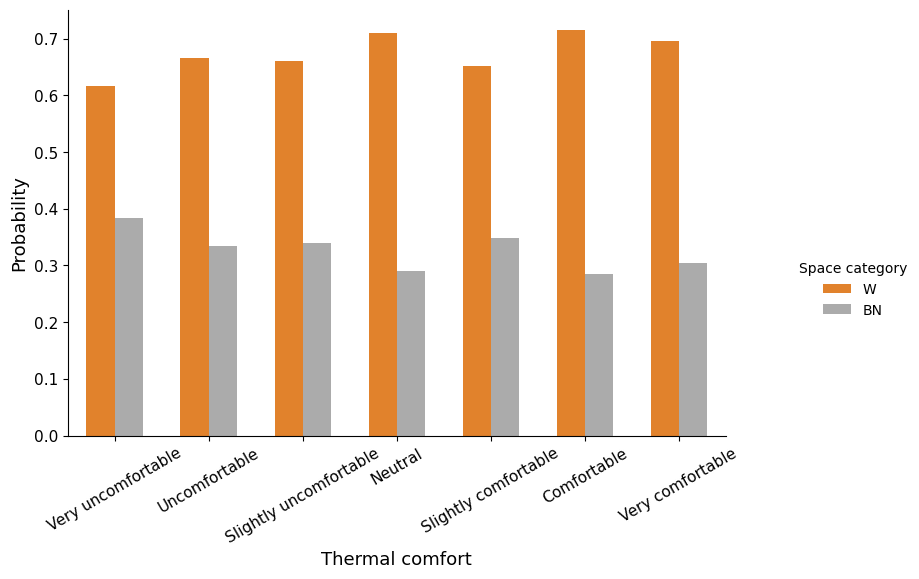

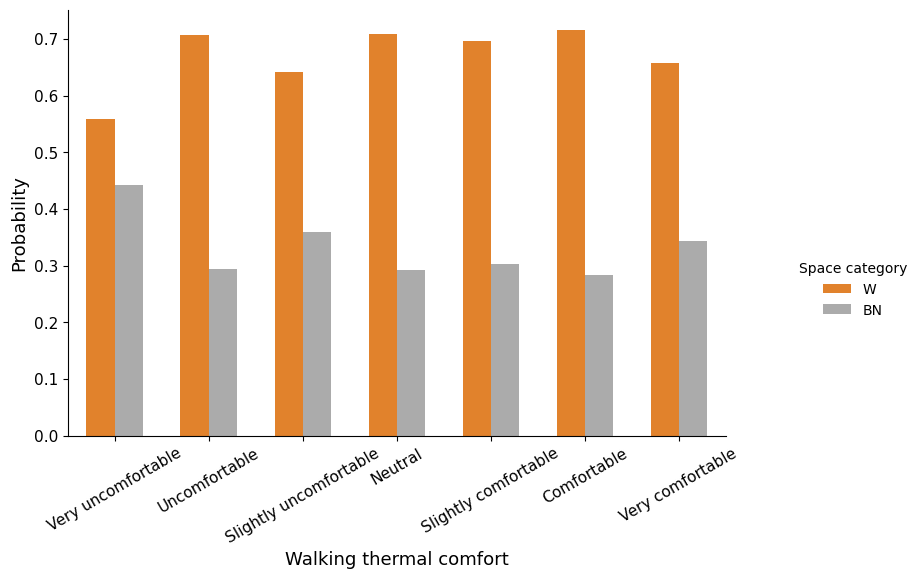

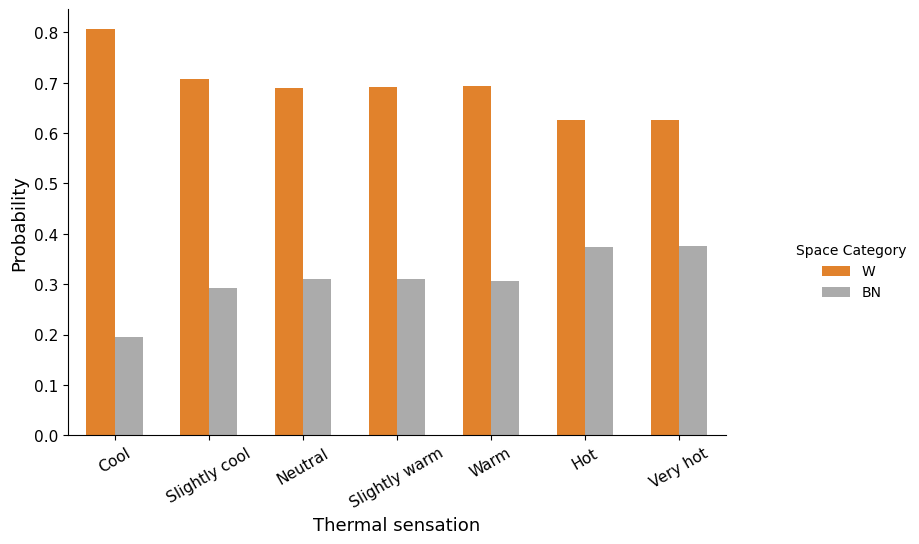

In [43]:
all_votes_processed_merged2_copy = all_votes_processed_merged2.copy()

################################################
#     THERMAL COMFORT VS SPACE CATEGORY 
################################################


x,y = 'thermal_confort', 'merged_space_category'

# Normalization (each answer = 1)
vots_gender_norm = all_votes_processed_merged2_copy.groupby(x)[y].value_counts(normalize=True).reset_index() 

vots_gender_norm.thermal_confort = pd.Categorical(values=vots_gender_norm.thermal_confort, categories=['Molt incòmode', 'Incòmode', 'Lleugerament incòmode', 'Neutre','Lleugerament còmode','Còmode','Molt còmode']) # Set the order for the column as you want
vots_gender_norm.sort_values(['thermal_confort'], inplace=True) # Sort the column

# Plot the histogram. Probability of each answer
g = sns.catplot(x=x,y='proportion',hue=y,kind='bar',data=vots_gender_norm, palette=["#FF800E", "#ABABAB"],alpha=1.,
                hue_order=['W','BN'],width=0.6, height=5, aspect=1.5).set(xlabel='Thermal comfort', ylabel='Probability')  ## and plot

# Size and rotation of x-y ticks
plt.xticks(rotation=30, fontsize=11)
plt.yticks(rotation=0, fontsize=11)

# Change xtick-labels in Enligsh
g.set_xticklabels(['Very uncomfortable', 'Uncomfortable', 'Slightly uncomfortable', 'Neutral', 'Slightly comfortable', 
                   'Comfortable', 'Very comfortable'])

# Now change the hue (legend) title
g._legend.set_title('Space category')

# Size of the labels
g.set_axis_labels('Thermal comfort', 'Probability', fontsize=13)

# Replace labels
#new_labels = ['Men', 'Women']
#for t, l in zip(g._legend.texts, new_labels):
    #t.set_text(l)
    
plt.show()
print('')
print('')




################################################
#     WALKING THERMAL COMFORT VS SPACE CATEGORY 
################################################

x,y = 'thermal_confort_walking', 'merged_space_category'

vots_gender_norm = all_votes_processed_merged2_copy.groupby(x)[y].value_counts(normalize=True).reset_index()


vots_gender_norm.thermal_confort_walking = pd.Categorical(values=vots_gender_norm.thermal_confort_walking, categories=['Molt incòmode', 'Incòmode', 'Lleugerament incòmode', 'Neutre','Lleugerament còmode','Còmode','Molt còmode']) ## Set the order for the column as you want
vots_gender_norm.sort_values(['thermal_confort_walking'], inplace=True) # Sort the column

g = sns.catplot(x=x,y='proportion',hue=y,kind='bar',data=vots_gender_norm, palette=["#FF800E", "#ABABAB"],alpha=1.,
                hue_order=['W','BN'],width=0.6, height=5, aspect=1.5).set(xlabel='Walking thermal comfort', ylabel='Probability')  ## and plot

# Size and rotation of x-y ticks
plt.xticks(rotation=30, fontsize=11)
plt.yticks(rotation=0, fontsize=11)

g.set_xticklabels(['Very uncomfortable', 'Uncomfortable', 'Slightly uncomfortable', 'Neutral', 'Slightly comfortable', 
                   'Comfortable', 'Very comfortable'])

# Now change the hue (legend) title
g._legend.set_title('Space category')

# Size of the labels
g.set_axis_labels('Walking thermal comfort', 'Probability', fontsize=13)


# replace labels
#new_labels = ['Men', 'Women']
#for t, l in zip(g._legend.texts, new_labels):
    #t.set_text(l)
    
plt.show()
print('')
print('')




################################################
#     THERMAL SENSATION VS SPACE CATEGORY 
################################################

x,y = 'thermal_sensation', 'merged_space_category'

vots_gender_norm = all_votes_processed_merged2_copy.groupby(x)[y].value_counts(normalize=True).reset_index()

vots_gender_norm.thermal_sensation = pd.Categorical(values=vots_gender_norm.thermal_sensation, categories=['Fresc', 'Lleugerament fresc', 'Neutre', 'Lleugerament càlid','Càlid','Calorós','Molt calorós']) ## Set the order for the column as you want
vots_gender_norm.sort_values(['thermal_sensation'], inplace=True) # Sort the column


g = sns.catplot(x=x,y='proportion',hue=y,kind='bar',data=vots_gender_norm, palette=["#FF800E", "#ABABAB"],alpha=1.,
                hue_order=['W','BN'],width=0.6, height=5, aspect=1.5).set(xlabel='Thermal sensation', ylabel='Probability')  ## and plot

# Size and rotation of x-y ticks
plt.xticks(rotation=30, fontsize=11)
plt.yticks(rotation=0, fontsize=11)

g.set_xticklabels(['Cool', 'Slightly cool', 'Neutral', 'Slightly warm', 'Warm', 'Hot', 'Very hot'])

# Now change the hue (legend) title
g._legend.set_title('Space Category')

# Size of the labels
g.set_axis_labels('Thermal sensation', 'Probability', fontsize=13)


# replace labels
#new_labels = ['Men', 'Women']
#for t, l in zip(g._legend.texts, new_labels):
    #t.set_text(l)
    
plt.show()



####  3.5.3. Horizontal bar-plots votes for each big group

**Thermal comfort**

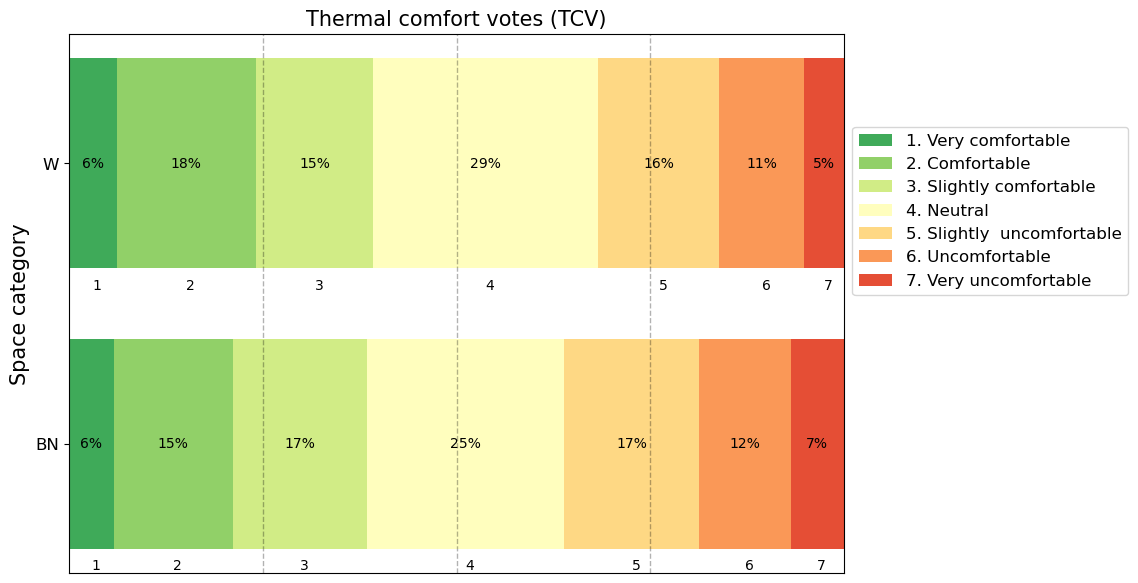

In [44]:
import matplotlib.pyplot as plt
import numpy as np


category_names = ['7. Very uncomfortable', '6. Uncomfortable', '5. Slightly  uncomfortable', '4. Neutral', 
                  '3. Slightly comfortable', '2. Comfortable', '1. Very comfortable']
category_names_r = list(reversed(category_names))

results = {
    'W': [66, 139, 200, 369, 193, 229, 78],
    'BN': [41, 70, 103, 151, 103, 91, 34],}

list_keys=[]
list_values_r=[]
for key in results:
    list_keys.append(key)
    list_values_r.append(list(reversed(results[key])))
    
results_r = dict(zip(list_keys, list_values_r))


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    
    total_votes_per_age = np.sum(data,axis=1)
    new_data = ((data.transpose()/total_votes_per_age)*100).transpose()   # To plot with % from 0 to 100
    #new_data = np.matrix.round(new_data, 2)    # To plot just the num of votes
    
    data_cum = new_data.cumsum(axis=1)  # Cumulative
    category_colors = plt.colormaps['RdYlGn_r'](np.linspace(0.15, 0.85, data.shape[1]))  # Palette of colors

    
    # Figure
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(new_data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        data_text = data[:, i]
        widths = new_data[:, i]
        starts = data_cum[:, i] - widths

        rects = ax.barh(labels, widths, left=starts, height=0.75,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'black' if r * g * b < 0.5 else 'black'
        ax.bar_label(rects, label_type='center', fmt = '%.0f%%', color=text_color)
        
        
        # Plot the numbers (as strings) for the legend (1, 2, 3,...7) below each answer (in the middle)
        if i==0:
            plt.text(x = (data_cum[0][i])/2, y = 0.45, s=str(i+1))
            plt.text(x = (data_cum[1][i])/2, y = 1.45, s=str(i+1))
        else:
            plt.text(x = data_cum[0][i-1]+((data_cum[0][i]-data_cum[0][i-1])/2), y = 0.45, s=str(i+1))
            plt.text(x = data_cum[1][i-1]+((data_cum[1][i]-data_cum[1][i-1])/2), y = 1.45, s=str(i+1))
        

    # Plot quartile dotted lines
    ax.axvline(x=25, ymin=0, ymax=1, alpha = 0.3, ls = '--', lw=1, c='black')
    ax.axvline(x=50, ymin=0, ymax=1, alpha = 0.3, ls = '--', lw=1, c='black')
    ax.axvline(x=75, ymin=0, ymax=1, alpha = 0.3, ls = '--', lw=1, c='black')
    

    ax.legend(ncols=1, bbox_to_anchor=(1, 0.5),
              loc='lower left', fontsize='large')
    
    ax.set_ylabel('Space category',fontsize=15)
    ax.tick_params(labelsize=12)
    ax.set_title('Thermal comfort votes (TCV)',fontsize=15)
    
    return fig, ax


fig, ax = survey(results_r, category_names_r)


plt.show()


**Walking thermal comfort**

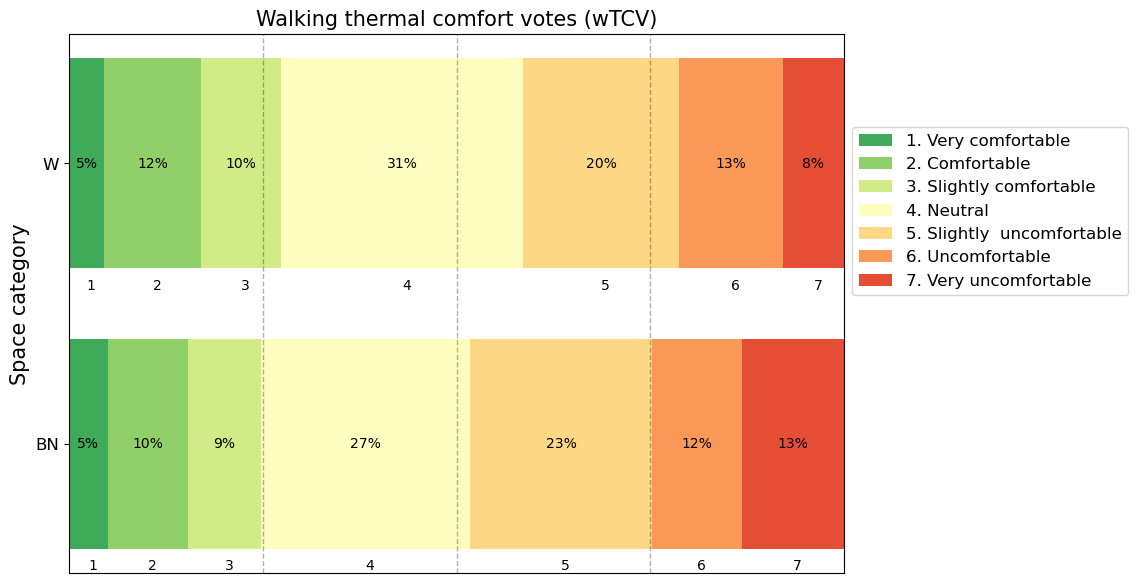

In [45]:
import matplotlib.pyplot as plt
import numpy as np

category_names = ['7. Very uncomfortable', '6. Uncomfortable', '5. Slightly  uncomfortable', '4. Neutral', 
                  '3. Slightly comfortable', '2. Comfortable', '1. Very comfortable']
category_names_r = list(reversed(category_names))


        
results = {
    'W': [77, 130, 195, 303, 101, 121, 44],
    'BN': [61, 54, 109, 125, 44, 48, 23],}

list_keys=[]
list_values_r=[]
for key in results:
    list_keys.append(key)
    list_values_r.append(list(reversed(results[key])))
    
results_r = dict(zip(list_keys, list_values_r))


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    
    total_votes_per_age = np.sum(data,axis=1)
    new_data = ((data.transpose()/total_votes_per_age)*100).transpose()   # To plot with % from 0 to 100
    #new_data = np.matrix.round(new_data, 2)    # To plot just the num of votes
    
    data_cum = new_data.cumsum(axis=1)  # Cumulative
    category_colors = plt.colormaps['RdYlGn_r'](np.linspace(0.15, 0.85, data.shape[1]))  # Palette of colors

    
    # Figure
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(new_data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        data_text = data[:, i]
        widths = new_data[:, i]
        starts = data_cum[:, i] - widths

        rects = ax.barh(labels, widths, left=starts, height=0.75,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'black' if r * g * b < 0.5 else 'black'
        ax.bar_label(rects, label_type='center', fmt = '%.0f%%', color=text_color)
        
        
        # Plot the numbers (as strings) for the legend (1, 2, 3,...7) below each answer (in the middle)
        if i==0:
            plt.text(x = (data_cum[0][i])/2, y = 0.45, s=str(i+1))
            plt.text(x = (data_cum[1][i])/2, y = 1.45, s=str(i+1))
        else:
            plt.text(x = data_cum[0][i-1]+((data_cum[0][i]-data_cum[0][i-1])/2), y = 0.45, s=str(i+1))
            plt.text(x = data_cum[1][i-1]+((data_cum[1][i]-data_cum[1][i-1])/2), y = 1.45, s=str(i+1))
        

    # Plot quartile dotted lines
    ax.axvline(x=25, ymin=0, ymax=1, alpha = 0.3, ls = '--', lw=1, c='black')
    ax.axvline(x=50, ymin=0, ymax=1, alpha = 0.3, ls = '--', lw=1, c='black')
    ax.axvline(x=75, ymin=0, ymax=1, alpha = 0.3, ls = '--', lw=1, c='black')
    

    ax.legend(ncols=1, bbox_to_anchor=(1, 0.5),
              loc='lower left', fontsize='large')
    
    ax.set_ylabel('Space category',fontsize=15)
    ax.tick_params(labelsize=12)
    ax.set_title('Walking thermal comfort votes (wTCV)',fontsize=15)
    
    return fig, ax


fig, ax = survey(results_r, category_names_r)


plt.show()


**Thermal sensation**

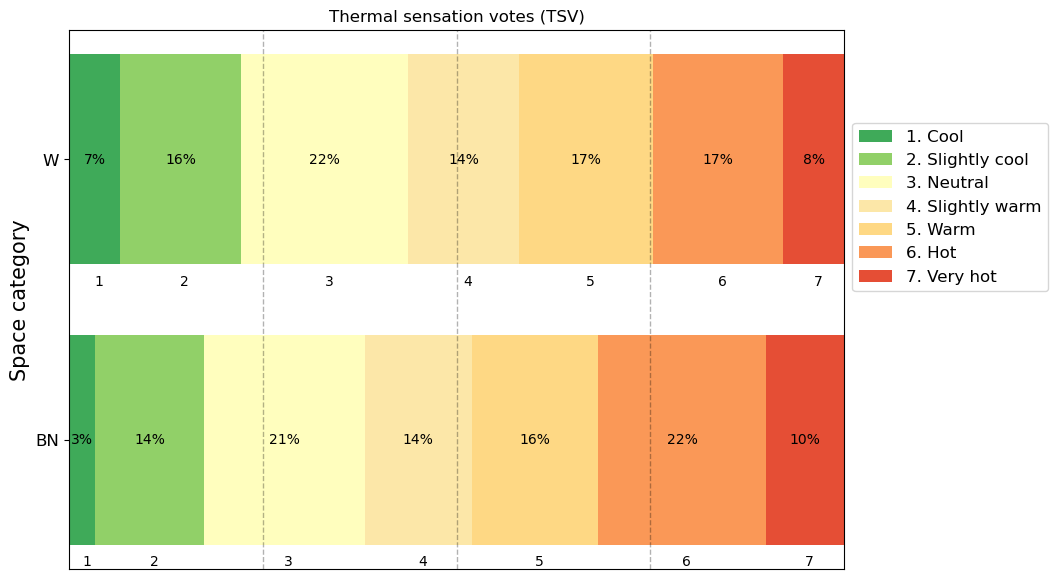

In [46]:
import matplotlib.pyplot as plt
import numpy as np

category_names = ['1. Cool', '2. Slightly cool', '3. Neutral', '4. Slightly warm', '5. Warm', '6. Hot', '7. Very hot']


results = {
    'W': [83, 200, 274, 183, 220, 214, 100],
    'BN': [20, 83, 123, 82, 97, 128, 60],}


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    
    total_votes_per_age = np.sum(data,axis=1)
    new_data = ((data.transpose()/total_votes_per_age)*100).transpose()
    #new_data = np.matrix.round(new_data, 2)
    
    data_cum = new_data.cumsum(axis=1)
    category_colors = plt.colormaps['RdYlGn_r'](np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(10, 7))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(new_data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        if i==2:
            new_color = category_colors[3]
        elif i==3:
            new_color =  np.array([0.98746328, 0.9067397, 0.65926182, 1.])
        else:
            new_color=color
        
        data_text = data[:, i]
        widths = new_data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.75,
                        label=colname, color=new_color)

        r, g, b, _ = color
        text_color = 'black' if r * g * b < 0.5 else 'black'
        ax.bar_label(rects, label_type='center', fmt = '%.0f%%', color=text_color)

        if i==0:
            plt.text(x = (data_cum[0][i])/2, y = 0.45, s=str(i+1))
            plt.text(x = (data_cum[1][i])/2, y = 1.45, s=str(i+1))
        else:
            plt.text(x = data_cum[0][i-1]+((data_cum[0][i]-data_cum[0][i-1])/2), y = 0.45, s=str(i+1))
            plt.text(x = data_cum[1][i-1]+((data_cum[1][i]-data_cum[1][i-1])/2), y = 1.45, s=str(i+1))
            
    # Plot quartile dotted lines
    ax.axvline(x=25, ymin=0, ymax=1, alpha = 0.3, ls = '--', lw=1, c='black')
    ax.axvline(x=50, ymin=0, ymax=1, alpha = 0.3, ls = '--', lw=1, c='black')
    ax.axvline(x=75, ymin=0, ymax=1, alpha = 0.3, ls = '--', lw=1, c='black')
    
    ax.legend(ncols=1, bbox_to_anchor=(1, 0.5),
              loc='lower left', fontsize='large')
    
    ax.set_ylabel('Space category',fontsize=15)
    ax.tick_params(labelsize=12)
    ax.set_title('Thermal sensation votes (TSV)')
    
    return fig, ax


survey(results, category_names)
plt.show()


<br>

## 4. TCV/TSV and wTCV for ages of <12 and 13-15

### 4.1. Statistics


687 votes <12  and 736 votes 13-15

In [47]:
all_votes_processed_age_12 = all_votes_processed[all_votes_processed['age2']== '<12'].reset_index(drop=True)
votes_ID_age_12 = votes_ID[votes_ID['age2']== '<12'].reset_index(drop=True)

In [48]:
all_votes_processed_age_13_15 = all_votes_processed[all_votes_processed['age2']== '13-15'].reset_index(drop=True)
votes_ID_age_13_15 = votes_ID[votes_ID['age2']== '13-15'].reset_index(drop=True)

###  Age <12

**Socio-dem statistics for <12 group. Using votes**

In [49]:
print(all_votes_processed_age_12['gender'].value_counts())
print('---------------------------------')
print(all_votes_processed_age_12['gender'].value_counts(normalize=True).mul(100).round(1))

gender
Home                    342
Dona                    337
Prefereixo no dir-la      8
Name: count, dtype: int64
---------------------------------
gender
Home                    49.8
Dona                    49.1
Prefereixo no dir-la     1.2
Name: proportion, dtype: float64


In [50]:
print(all_votes_processed_age_12['spent_time2'].value_counts())
print('---------------------------------')
print(all_votes_processed_age_12['spent_time2'].value_counts(normalize=True).mul(100).round(1))

spent_time2
<1h        195
2h - 4h    183
1h - 2h    164
>4h        145
Name: count, dtype: int64
---------------------------------
spent_time2
<1h        28.4
2h - 4h    26.6
1h - 2h    23.9
>4h        21.1
Name: proportion, dtype: float64


In [51]:
print(all_votes_processed_age_12['neighbourhood_knowledge2'].value_counts())
print('---------------------------------')
print(all_votes_processed_age_12['neighbourhood_knowledge2'].value_counts(normalize=True).mul(100).round(1))

neighbourhood_knowledge2
Bo            215
Molt bo       196
Mitjà         173
No/Parcial    103
Name: count, dtype: int64
---------------------------------
neighbourhood_knowledge2
Bo            31.3
Molt bo       28.5
Mitjà         25.2
No/Parcial    15.0
Name: proportion, dtype: float64


**Socio-dem statistics for <12 group. Using participants**

In [52]:
print(votes_ID_age_12['gender'].value_counts())
print('---------------------------------')
print(votes_ID_age_12['gender'].value_counts(normalize=True).mul(100).round(1))

gender
Home                    80
Dona                    76
Prefereixo no dir-la     2
Name: count, dtype: int64
---------------------------------
gender
Home                    50.6
Dona                    48.1
Prefereixo no dir-la     1.3
Name: proportion, dtype: float64


In [53]:
print(votes_ID_age_12['spent_time_public_space2'].value_counts())
print('---------------------------------')
print(votes_ID_age_12['spent_time_public_space2'].value_counts(normalize=True).mul(100).round(1))

spent_time_public_space2
2h - 4h    45
<1h        41
1h - 2h    39
>4h        33
Name: count, dtype: int64
---------------------------------
spent_time_public_space2
2h - 4h    28.5
<1h        25.9
1h - 2h    24.7
>4h        20.9
Name: proportion, dtype: float64


In [54]:
print(votes_ID_age_12['neighbourhood_knowledge2'].value_counts())
print('---------------------------------')
print(votes_ID_age_12['neighbourhood_knowledge2'].value_counts(normalize=True).mul(100).round(1))

neighbourhood_knowledge2
Bo            52
Molt bo       43
Mitjà         39
No/parcial    24
Name: count, dtype: int64
---------------------------------
neighbourhood_knowledge2
Bo            32.9
Molt bo       27.2
Mitjà         24.7
No/parcial    15.2
Name: proportion, dtype: float64


###  Age 13-15

**Socio-dem statistics for 13-15 group. Using votes**

In [55]:
print(all_votes_processed_age_13_15['gender'].value_counts())
print('---------------------------------')
print(all_votes_processed_age_13_15['gender'].value_counts(normalize=True).mul(100).round(1))

gender
Home                    360
Dona                    332
Prefereixo no dir-la     28
No-binària               16
Name: count, dtype: int64
---------------------------------
gender
Home                    48.9
Dona                    45.1
Prefereixo no dir-la     3.8
No-binària               2.2
Name: proportion, dtype: float64


In [56]:
print(all_votes_processed_age_13_15['spent_time2'].value_counts())
print('---------------------------------')
print(all_votes_processed_age_13_15['spent_time2'].value_counts(normalize=True).mul(100).round(1))

spent_time2
2h - 4h    239
>4h        227
1h - 2h    174
<1h         96
Name: count, dtype: int64
---------------------------------
spent_time2
2h - 4h    32.5
>4h        30.8
1h - 2h    23.6
<1h        13.0
Name: proportion, dtype: float64


In [57]:
print(all_votes_processed_age_13_15['neighbourhood_knowledge2'].value_counts())
print('---------------------------------')
print(all_votes_processed_age_13_15['neighbourhood_knowledge2'].value_counts(normalize=True).mul(100).round(1))

neighbourhood_knowledge2
Molt bo       357
Bo            205
Mitjà          97
No/Parcial     77
Name: count, dtype: int64
---------------------------------
neighbourhood_knowledge2
Molt bo       48.5
Bo            27.9
Mitjà         13.2
No/Parcial    10.5
Name: proportion, dtype: float64


**Socio-dem statistics for 13-15 group. Using participants**

In [58]:
print(votes_ID_age_13_15['gender'].value_counts())
print('---------------------------------')
print(votes_ID_age_13_15['gender'].value_counts(normalize=True).mul(100).round(1))

gender
Home                    87
Dona                    83
Prefereixo no dir-la     7
No-binària               4
Name: count, dtype: int64
---------------------------------
gender
Home                    48.1
Dona                    45.9
Prefereixo no dir-la     3.9
No-binària               2.2
Name: proportion, dtype: float64


In [59]:
print(votes_ID_age_13_15['spent_time_public_space2'].value_counts())
print('---------------------------------')
print(votes_ID_age_13_15['spent_time_public_space2'].value_counts(normalize=True).mul(100).round(1))

spent_time_public_space2
2h - 4h    58
>4h        57
1h - 2h    42
<1h        24
Name: count, dtype: int64
---------------------------------
spent_time_public_space2
2h - 4h    32.0
>4h        31.5
1h - 2h    23.2
<1h        13.3
Name: proportion, dtype: float64


In [60]:
print(votes_ID_age_13_15['neighbourhood_knowledge2'].value_counts())
print('---------------------------------')
print(votes_ID_age_13_15['neighbourhood_knowledge2'].value_counts(normalize=True).mul(100).round(1))

neighbourhood_knowledge2
Molt bo       91
Bo            50
Mitjà         24
No/parcial    16
Name: count, dtype: int64
---------------------------------
neighbourhood_knowledge2
Molt bo       50.3
Bo            27.6
Mitjà         13.3
No/parcial     8.8
Name: proportion, dtype: float64


### 4.2. Histograms

#### 4.2.1. Separated

**Group <12**

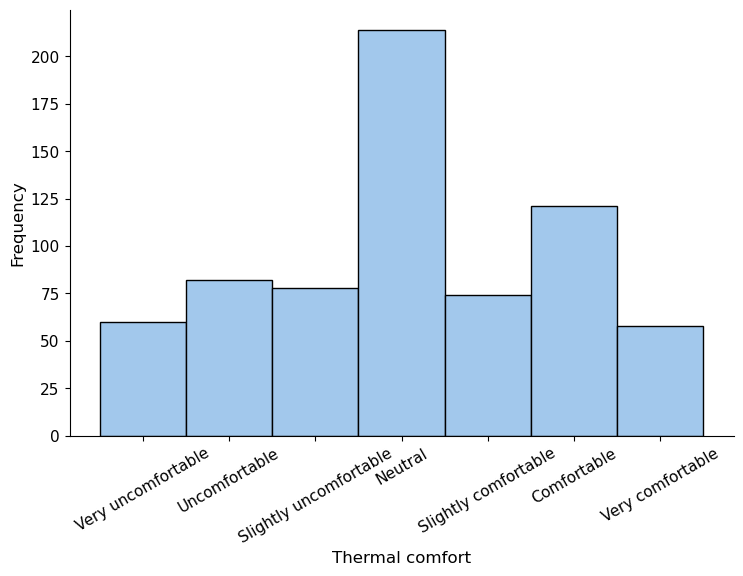

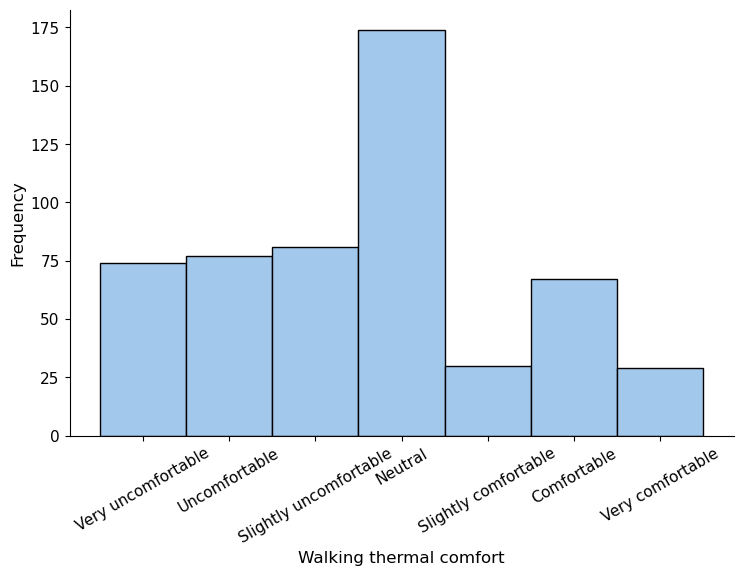

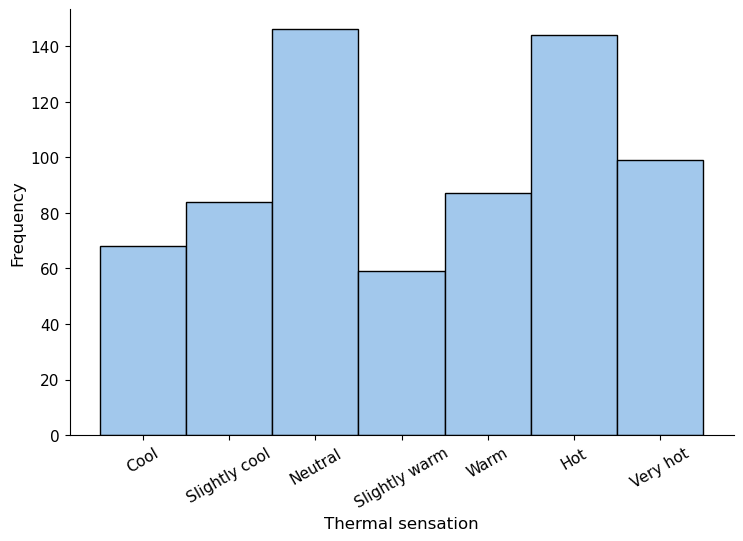

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt


all_votes_processed_age_12_copy = all_votes_processed_age_12.copy()


##############################
# THERMAL COMFORT <12
###############################

all_votes_processed_age_12_copy.thermal_confort = pd.Categorical(values=all_votes_processed_age_12_copy.thermal_confort, categories=['Molt incòmode', 'Incòmode', 'Lleugerament incòmode', 'Neutre','Lleugerament còmode','Còmode','Molt còmode']) ## Set the order for the column as you want
all_votes_processed_age_12_copy.sort_values(['thermal_confort'], inplace=True) ## Sort the column
ax = sns.displot(data = all_votes_processed_age_12_copy, x = 'thermal_confort', facecolor='#A2C8EC', edgecolor='black',
            height=5, aspect=1.5).set(xlabel='Thermal comfort', ylabel='Frequency')  ## and plot

plt.xticks(rotation=30, fontsize=11)
plt.yticks(rotation=0, fontsize=11)

ax.set_xticklabels(['Very uncomfortable', 'Uncomfortable', 'Slightly uncomfortable', 'Neutral', 'Slightly comfortable', 
                   'Comfortable', 'Very comfortable'])

# Size of the labels
ax.set_axis_labels('Thermal comfort', 'Frequency', fontsize=12)

plt.show()
print('')
print('')


##############################
# WALKING THERMAL COMFORT <12
###############################


all_votes_processed_age_12_copy.thermal_confort_walking = pd.Categorical(values=all_votes_processed_age_12_copy.thermal_confort_walking, categories=['Molt incòmode', 'Incòmode', 'Lleugerament incòmode', 'Neutre','Lleugerament còmode','Còmode','Molt còmode']) ## Set the order for the column as you want
all_votes_processed_age_12_copy.sort_values(['thermal_confort_walking'], inplace=True) ## Sort the column
ax = sns.displot(data = all_votes_processed_age_12_copy, x = 'thermal_confort_walking', facecolor='#A2C8EC', edgecolor='black',
            height=5, aspect=1.5).set(xlabel='Walking thermal comfort', ylabel='Frequency')  ## and plot

plt.xticks(rotation=30, fontsize=11)
plt.yticks(rotation=0, fontsize=11)

ax.set_xticklabels(['Very uncomfortable', 'Uncomfortable', 'Slightly uncomfortable', 'Neutral', 'Slightly comfortable', 
                   'Comfortable', 'Very comfortable'])
# Size of the labels
ax.set_axis_labels('Walking thermal comfort', 'Frequency', fontsize=12)

plt.show()

print('')
print('')



##############################
# THERMAL SENSATION <12
###############################

all_votes_processed_age_12_copy.thermal_sensation = pd.Categorical(values=all_votes_processed_age_12_copy.thermal_sensation, categories=['Fresc', 'Lleugerament fresc', 'Neutre', 'Lleugerament càlid','Càlid','Calorós','Molt calorós']) ## Set the order for the column as you want
all_votes_processed_age_12_copy.sort_values(['thermal_sensation'], inplace=True) ## Sort the column
ax = sns.displot(data = all_votes_processed_age_12_copy, x = 'thermal_sensation', facecolor='#A2C8EC', edgecolor='black',
            height=5, aspect=1.5).set(xlabel='Thermal sensation', ylabel='Frequency')  ## and plot

plt.xticks(rotation=30, fontsize=11)
plt.yticks(rotation=0, fontsize=11)

ax.set_xticklabels(['Cool', 'Slightly cool', 'Neutral', 'Slightly warm', 'Warm', 'Hot', 'Very hot'])

# Size of the labels
ax.set_axis_labels('Thermal sensation', 'Frequency', fontsize=12)

plt.show()

**Group 13-15**

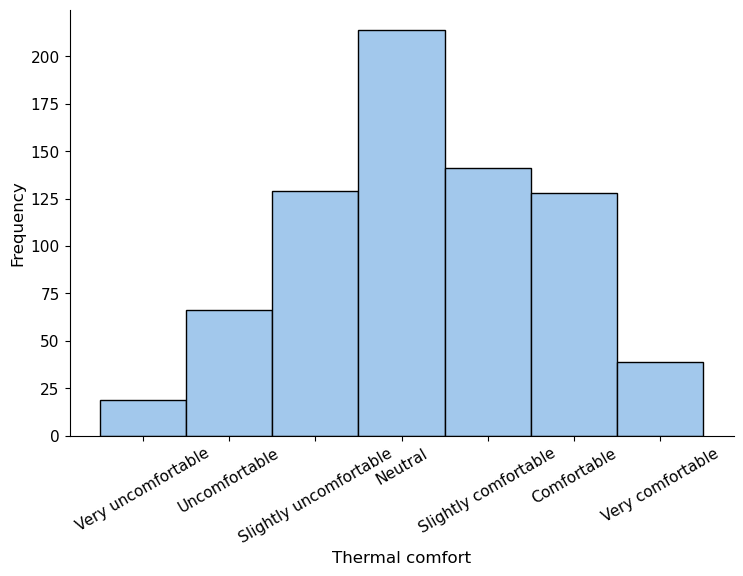

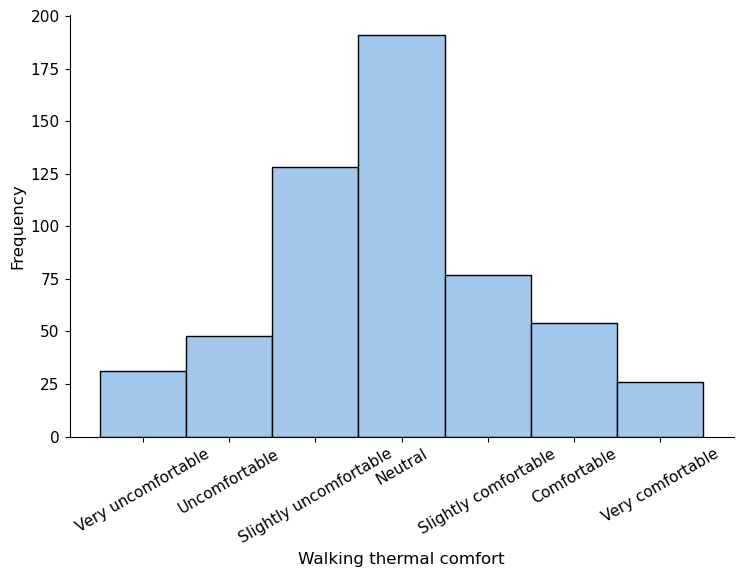

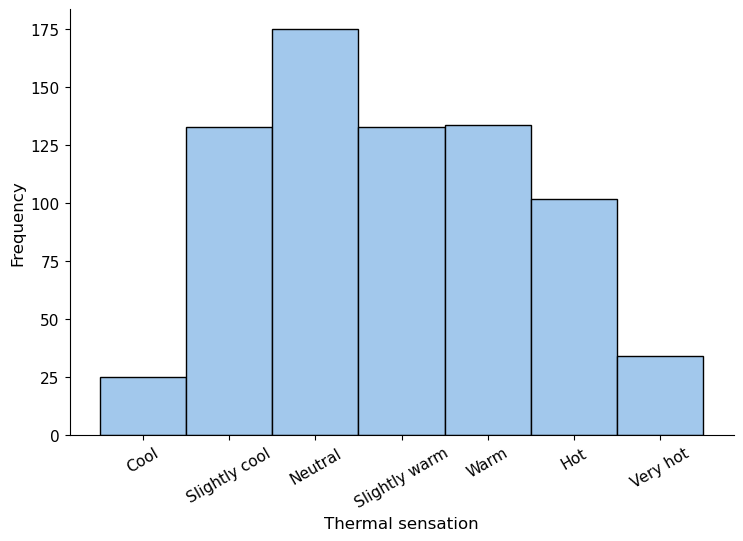

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt


all_votes_processed_age_13_15_copy = all_votes_processed_age_13_15.copy()



##############################
# THERMAL COMFORT 13-15
###############################

all_votes_processed_age_13_15_copy.thermal_confort = pd.Categorical(values=all_votes_processed_age_13_15_copy.thermal_confort, categories=['Molt incòmode', 'Incòmode', 'Lleugerament incòmode', 'Neutre','Lleugerament còmode','Còmode','Molt còmode']) ## Set the order for the column as you want
all_votes_processed_age_13_15_copy.sort_values(['thermal_confort'], inplace=True) ## Sort the column
ax = sns.displot(data = all_votes_processed_age_13_15_copy, x = 'thermal_confort', facecolor='#A2C8EC', edgecolor='black',
            height=5, aspect=1.5).set(xlabel='Thermal comfort', ylabel='Frequency')  ## and plot

plt.xticks(rotation=30, fontsize=11)
plt.yticks(rotation=0, fontsize=11)

ax.set_xticklabels(['Very uncomfortable', 'Uncomfortable', 'Slightly uncomfortable', 'Neutral', 'Slightly comfortable', 
                   'Comfortable', 'Very comfortable'])

# Size of the labels
ax.set_axis_labels('Thermal comfort', 'Frequency', fontsize=12)

plt.show()
print('')
print('')


##############################
# WALKING THERMAL COMFORT 13-15
###############################


all_votes_processed_age_13_15_copy.thermal_confort_walking = pd.Categorical(values=all_votes_processed_age_13_15_copy.thermal_confort_walking, categories=['Molt incòmode', 'Incòmode', 'Lleugerament incòmode', 'Neutre','Lleugerament còmode','Còmode','Molt còmode']) ## Set the order for the column as you want
all_votes_processed_age_13_15_copy.sort_values(['thermal_confort_walking'], inplace=True) ## Sort the column
ax = sns.displot(data = all_votes_processed_age_13_15_copy, x = 'thermal_confort_walking', facecolor='#A2C8EC', edgecolor='black',
            height=5, aspect=1.5).set(xlabel='Walking thermal comfort', ylabel='Frequency')  ## and plot

plt.xticks(rotation=30, fontsize=11)
plt.yticks(rotation=0, fontsize=11)

ax.set_xticklabels(['Very uncomfortable', 'Uncomfortable', 'Slightly uncomfortable', 'Neutral', 'Slightly comfortable', 
                   'Comfortable', 'Very comfortable'])
# Size of the labels
ax.set_axis_labels('Walking thermal comfort', 'Frequency', fontsize=12)

plt.show()

print('')
print('')



##############################
# THERMAL SENSATION 13-15
###############################

all_votes_processed_age_13_15_copy.thermal_sensation = pd.Categorical(values=all_votes_processed_age_13_15_copy.thermal_sensation, categories=['Fresc', 'Lleugerament fresc', 'Neutre', 'Lleugerament càlid','Càlid','Calorós','Molt calorós']) ## Set the order for the column as you want
all_votes_processed_age_13_15_copy.sort_values(['thermal_sensation'], inplace=True) ## Sort the column
ax = sns.displot(data = all_votes_processed_age_13_15_copy, x = 'thermal_sensation', facecolor='#A2C8EC', edgecolor='black',
            height=5, aspect=1.5).set(xlabel='Thermal sensation', ylabel='Frequency')  ## and plot

plt.xticks(rotation=30, fontsize=11)
plt.yticks(rotation=0, fontsize=11)

ax.set_xticklabels(['Cool', 'Slightly cool', 'Neutral', 'Slightly warm', 'Warm', 'Hot', 'Very hot'])

# Size of the labels
ax.set_axis_labels('Thermal sensation', 'Frequency', fontsize=12)

plt.show()

#### 4.2.2. Together

In [63]:
all_votes_processed_age_12_13_15 = pd.concat([all_votes_processed_age_12, all_votes_processed_age_13_15]).reset_index(drop=True)

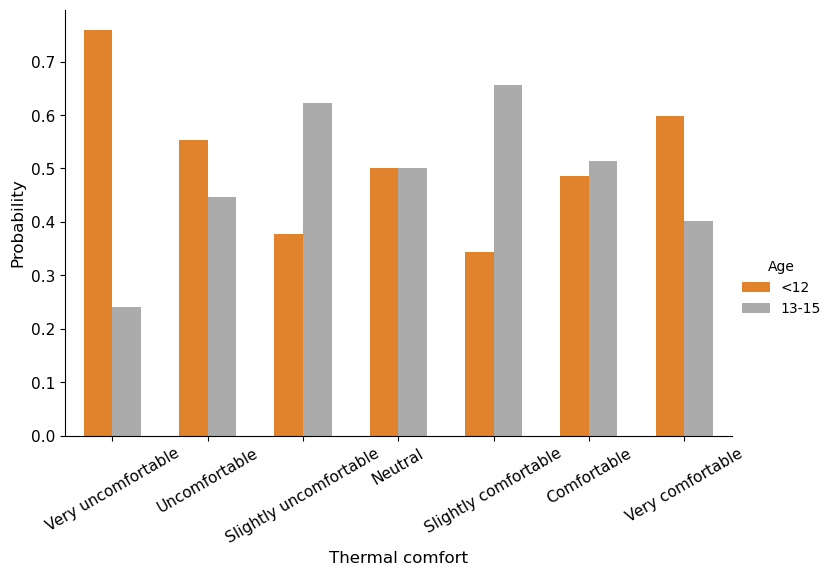

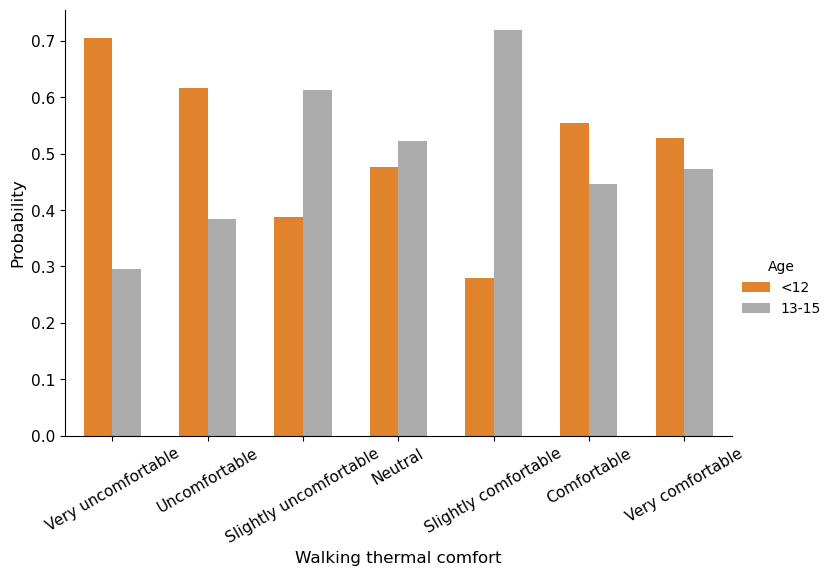

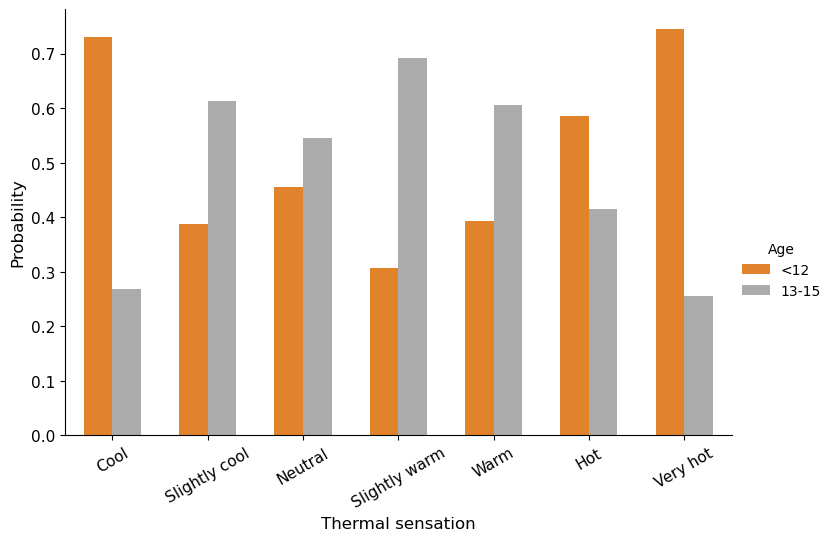

In [64]:
##############################
# THERMAL COMFORT 
###############################

x,y = 'thermal_confort', 'age2'

vots_age_12_13_15_norm = all_votes_processed_age_12_13_15.groupby(x)[y].value_counts(normalize=True).reset_index()


vots_age_12_13_15_norm.thermal_confort = pd.Categorical(values=vots_age_12_13_15_norm.thermal_confort, categories=['Molt incòmode', 'Incòmode', 'Lleugerament incòmode', 'Neutre','Lleugerament còmode','Còmode','Molt còmode']) ## Set the order for the column as you want
vots_age_12_13_15_norm.sort_values(['thermal_confort'], inplace=True) # Sort the column

g = sns.catplot(x=x,y='proportion',hue=y,kind='bar',data=vots_age_12_13_15_norm, palette=["#FF800E", "#ABABAB"],alpha=1.,
                hue_order=['<12','13-15'],width=0.6, height=5, aspect=1.5).set(xlabel='Thermal comfort', ylabel='Probability')  ## and plot

plt.xticks(rotation=30, fontsize=11)
plt.yticks(rotation=0, fontsize=11)

g.set_xticklabels(['Very uncomfortable', 'Uncomfortable', 'Slightly uncomfortable', 'Neutral', 'Slightly comfortable', 
                   'Comfortable', 'Very comfortable'])

# Now change the hue (legend) title
g._legend.set_title('Age')

# replace labels
new_labels = ['<12', '13-15']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)
    
# Size of the labels
g.set_axis_labels('Thermal comfort', 'Probability', fontsize=12)

plt.show()
print('')
print('')



##############################
# WALKING THERMAL COMFORT 
###############################

x,y = 'thermal_confort_walking', 'age2'

vots_age_12_13_15_norm = all_votes_processed_age_12_13_15.groupby(x)[y].value_counts(normalize=True).reset_index()


vots_age_12_13_15_norm.thermal_confort_walking = pd.Categorical(values=vots_age_12_13_15_norm.thermal_confort_walking, categories=['Molt incòmode', 'Incòmode', 'Lleugerament incòmode', 'Neutre','Lleugerament còmode','Còmode','Molt còmode']) ## Set the order for the column as you want
vots_age_12_13_15_norm.sort_values(['thermal_confort_walking'], inplace=True) # Sort the column

g = sns.catplot(x=x,y='proportion',hue=y,kind='bar',data=vots_age_12_13_15_norm, palette=["#FF800E", "#ABABAB"],alpha=1.,
                hue_order=['<12','13-15'],width=0.6, height=5, aspect=1.5).set(xlabel='Walking thermal comfort', ylabel='Probability')  ## and plot

plt.xticks(rotation=30, fontsize=11)
plt.yticks(rotation=0, fontsize=11)

g.set_xticklabels(['Very uncomfortable', 'Uncomfortable', 'Slightly uncomfortable', 'Neutral', 'Slightly comfortable', 
                   'Comfortable', 'Very comfortable'])

# Now change the hue (legend) title
g._legend.set_title('Age')

# replace labels
new_labels = ['<12', '13-15']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)
 
# Size of the labels
g.set_axis_labels('Walking thermal comfort', 'Probability', fontsize=12)

plt.show()
print('')
print('')


##############################
# THERMAL SENSATION 
###############################

x,y = 'thermal_sensation', 'age2'

vots_age_12_13_15_norm = all_votes_processed_age_12_13_15.groupby(x)[y].value_counts(normalize=True).reset_index()


vots_age_12_13_15_norm.thermal_sensation = pd.Categorical(values=vots_age_12_13_15_norm.thermal_sensation, categories=['Fresc', 'Lleugerament fresc', 'Neutre', 'Lleugerament càlid','Càlid','Calorós','Molt calorós']) ## Set the order for the column as you want
vots_age_12_13_15_norm.sort_values(['thermal_sensation'], inplace=True) # Sort the column


g = sns.catplot(x=x,y='proportion',hue=y,kind='bar',data=vots_age_12_13_15_norm, palette=["#FF800E", "#ABABAB"],alpha=1.,
                hue_order=['<12','13-15'],width=0.6, height=5, aspect=1.5).set(xlabel='Thermal sensation', ylabel='Probability')  ## and plot

plt.xticks(rotation=30, fontsize=11)
plt.yticks(rotation=0, fontsize=11)

g.set_xticklabels(['Cool', 'Slightly cool', 'Neutral', 'Slightly warm', 'Warm', 'Hot', 'Very hot'])

# Now change the hue (legend) title
g._legend.set_title('Age')

# replace labels
new_labels = ['<12', '13-15']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)
    
# Size of the labels
g.set_axis_labels('Thermal sensation', 'Probability', fontsize=12)

plt.show()



## 5. Correlation Heat-Maps votes.

### 5.1. TCV vs wTCV
        

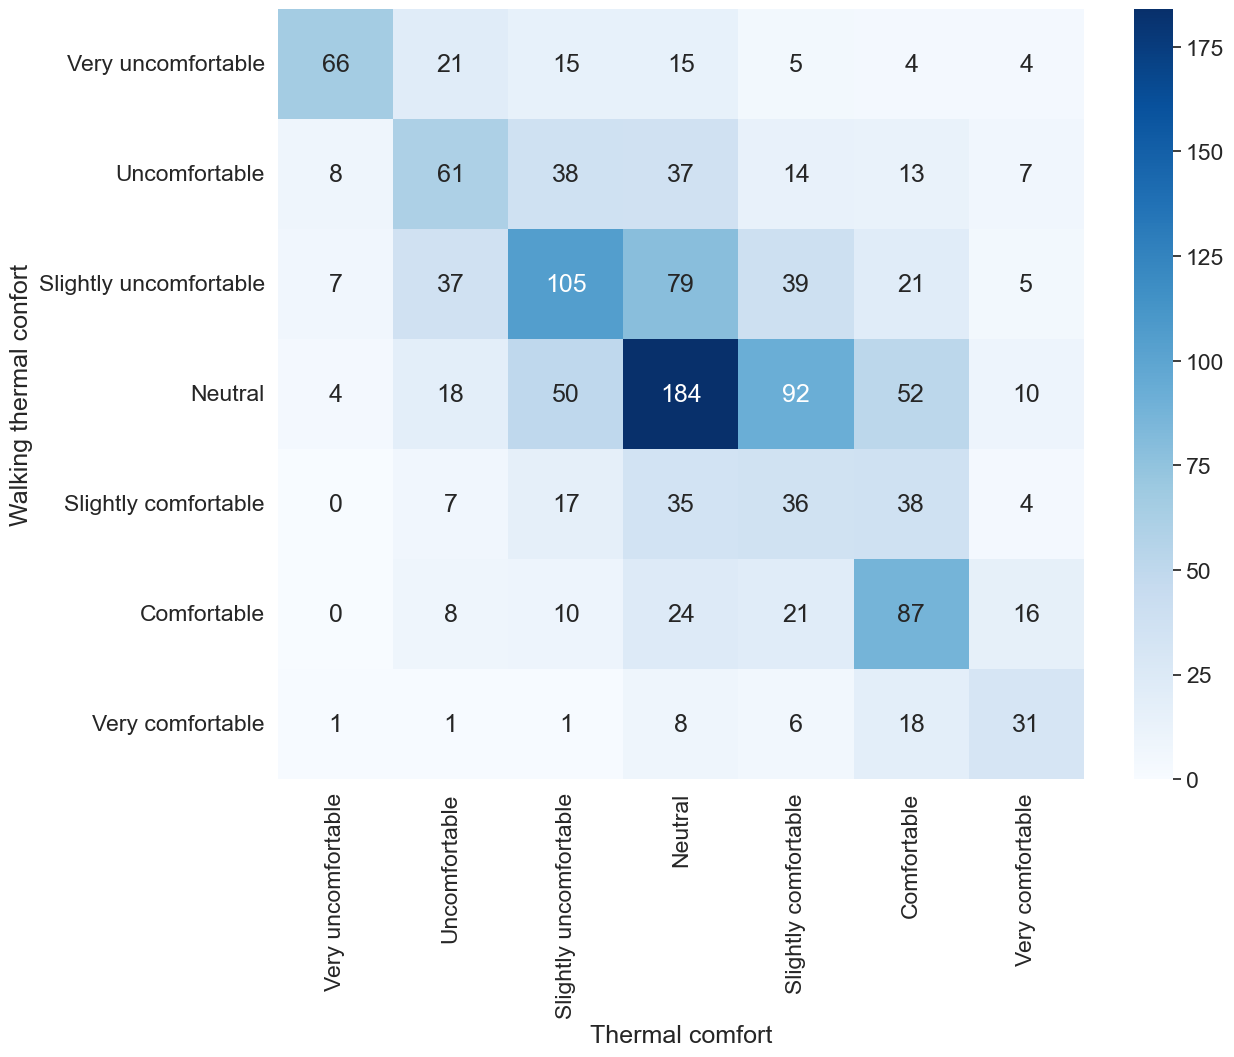

In [65]:
all_vots_processed_gender_heatmap = all_vots_processed_gender.copy()

order_confort = ['Molt incòmode', 'Incòmode', 'Lleugerament incòmode', 'Neutre', 'Lleugerament còmode', 'Còmode', 'Molt còmode']
#order_sensation = ['Fresc', 'Lleugerament fresc', 'Neutre', 'Lleugerament càlid','Càlid','Calorós','Molt calorós']

table = pd.pivot_table(all_vots_processed_gender_heatmap, index=['thermal_confort_walking'],
                       columns=['thermal_confort'], aggfunc="size",fill_value=0)

table = table.reindex(index=order_confort, columns=order_confort)

sns.set(rc={'figure.figsize':(13,10)}, font_scale=1.5, style='white')


tc_w = ['Very uncomfortable', 'Uncomfortable', 'Slightly uncomfortable', 'Neutral','Slightly comfortable','Comfortable','Very comfortable']
#ts = ['Cool', 'Slightly cool', 'Neutral', 'Slightly warm','Warm','Hot','Very hot']

sns.heatmap(table, yticklabels=tc_w, xticklabels=tc_w, annot=True, fmt='g', cmap='Blues').set(xlabel='Thermal comfort', ylabel='Walking thermal confort')  ## and plot


plt.show()











### 5.2. TCV vs TSV
        

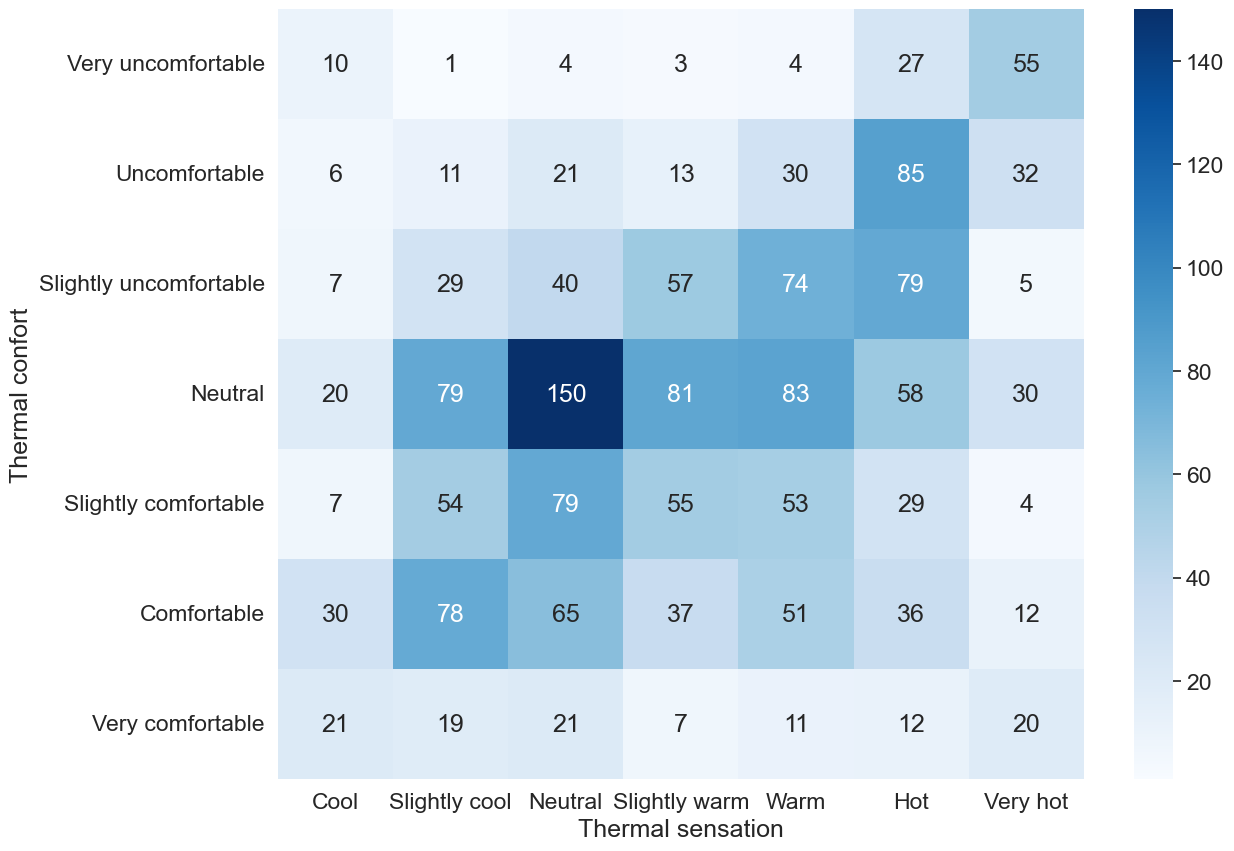

In [66]:
all_vots_processed_gender_heatmap = all_vots_processed_gender.copy()

order_confort = ['Molt incòmode', 'Incòmode', 'Lleugerament incòmode', 'Neutre', 'Lleugerament còmode', 'Còmode', 'Molt còmode']
order_sensation = ['Fresc', 'Lleugerament fresc', 'Neutre', 'Lleugerament càlid','Càlid','Calorós','Molt calorós']

table = pd.pivot_table(all_vots_processed_gender_heatmap, index=['thermal_confort'],
                       columns=['thermal_sensation'], aggfunc="size",fill_value=0)

table = table.reindex(index=order_confort, columns=order_sensation)

sns.set(rc={'figure.figsize':(13,10)}, font_scale=1.5, style='white')


tc_w = ['Very uncomfortable', 'Uncomfortable', 'Slightly uncomfortable', 'Neutral','Slightly comfortable','Comfortable','Very comfortable']
ts = ['Cool', 'Slightly cool', 'Neutral', 'Slightly warm','Warm','Hot','Very hot']

sns.heatmap(table, yticklabels=tc_w, xticklabels=ts, annot=True, fmt='g', cmap='Blues').set(xlabel='Thermal sensation', ylabel='Thermal confort')  ## and plot


plt.show()






### 5.3. TSV vs wTCV

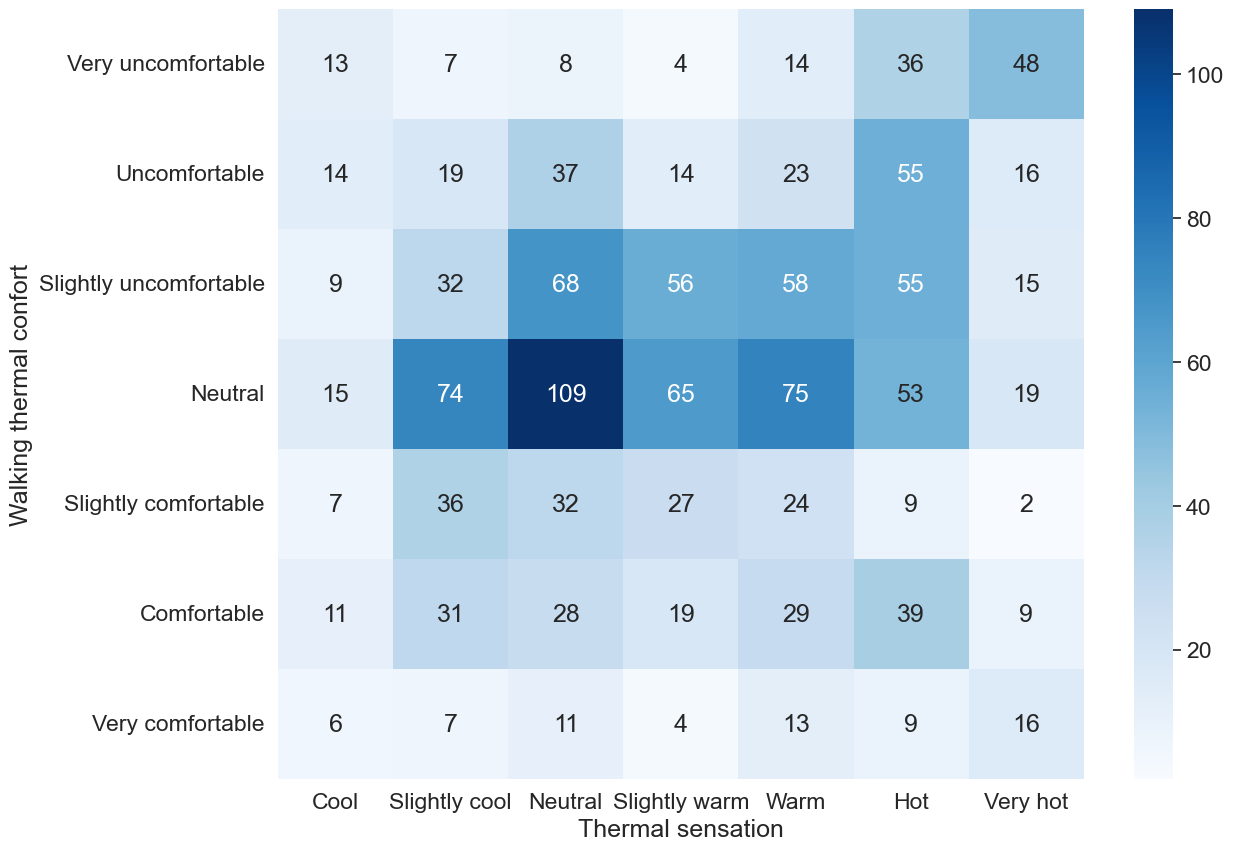

In [67]:
all_vots_processed_gender_heatmap = all_vots_processed_gender.copy()

order_confort = ['Molt incòmode', 'Incòmode', 'Lleugerament incòmode', 'Neutre', 'Lleugerament còmode', 'Còmode', 'Molt còmode']
order_sensation = ['Fresc', 'Lleugerament fresc', 'Neutre', 'Lleugerament càlid','Càlid','Calorós','Molt calorós']

table = pd.pivot_table(all_vots_processed_gender_heatmap, index=['thermal_confort_walking'],
                       columns=['thermal_sensation'], aggfunc="size",fill_value=0)

table = table.reindex(index=order_confort, columns=order_sensation)

sns.set(rc={'figure.figsize':(13,10)}, font_scale=1.5, style='white')


tc_w = ['Very uncomfortable', 'Uncomfortable', 'Slightly uncomfortable', 'Neutral','Slightly comfortable','Comfortable','Very comfortable']
ts = ['Cool', 'Slightly cool', 'Neutral', 'Slightly warm','Warm','Hot','Very hot']

sns.heatmap(table, yticklabels=tc_w, xticklabels=ts, annot=True, fmt='g', cmap='Blues').set(xlabel='Thermal sensation', ylabel='Walking thermal confort')  ## and plot


plt.show()
